In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the digital dataset
digital_dataset = pd.read_csv('digital_final_27th_Oct.csv')

# Load the ICD dataset
icd_dataset = pd.read_csv('icd_final_27th_Oct.csv')\

digital_dataset['mortality_label'] = digital_dataset['deathtime'].isnull().astype(int)
digital_dataset['Prothrombin_time'].fillna(digital_dataset['Prothrombin_time'].median(), inplace=True)
digital_dataset = pd.get_dummies(digital_dataset, columns=['gender'], drop_first=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['anchor_age', 'hematocrit_serum', 'blood_urea_nitrogen', 'serum_creatinine',
                     'Non_Invasive_Blood_Pressure_systolic', 'Non_Invasive_Blood_Pressure_diastolic',
                     'white_bloodcells', 'Glucose_serum', 'platelet_PLT', 'Prothrombin_time',
                     'aminotransferase_ALT', 'Total_Bilirubin', 'Anion_gap', 'Heart_rate_Alarm_High',
                     'Heart_rate_Alarm_low', 'earliest_weight_kg']

digital_dataset[numerical_columns] = scaler.fit_transform(digital_dataset[numerical_columns])

# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'hadm_id', 'deathtime']

# Drop the specified columns
digital_dataset.drop(columns=columns_to_drop, inplace=True)

from sklearn.model_selection import train_test_split

# Define features (X) and the target variable (y)
X = digital_dataset.drop(columns=['mortality_label'])
y = digital_dataset['mortality_label']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
digital_dataset

,alcoholism,anchor_age,hematocrit_serum,blood_urea_nitrogen,serum_creatinine,Non_Invasive_Blood_Pressure_systolic,Non_Invasive_Blood_Pressure_diastolic,white_bloodcells,Glucose_serum,platelet_PLT,Prothrombin_time,aminotransferase_ALT,Total_Bilirubin,Anion_gap,Heart_rate_Alarm_High,Heart_rate_Alarm_low,earliest_weight_kg,mortality_label,gender_M
0,0,1.647694,-1.685946,0.294264,-0.431296,-0.591214,-0.836675,2.199333,0.954602,-0.267638,-0.128248,-0.261104,-0.424745,1.314706,0.460201,-2.136496,-1.083537,0,0
1,0,1.363829,-1.336770,-0.210752,-0.590347,-0.186543,1.289521,-0.570728,-0.393129,-0.428879,-0.032554,-0.262665,0.007293,-0.361769,-0.533706,-0.460707,-0.102447,1,0
2,0,-1.304501,-0.396678,-0.030389,0.098874,-1.731648,-1.140417,0.406441,-0.501817,0.124949,-0.185665,-0.042560,-0.298734,-0.548044,2.448015,-2.136496,-1.252232,1,0
3,0,-0.736771,-0.342959,2.350397,2.643693,0.512432,0.732660,-0.349803,-0.458342,-0.590120,-0.482316,0.433556,-0.424745,1.500981,0.460201,-0.460707,1.020702,1,1
4,0,-2.156095,1.416356,-0.751839,-0.484313,0.917103,0.479542,0.363955,-0.382260,0.195054,-0.434469,-0.267348,-0.424745,-0.920594,1.454108,-2.136496,0.914158,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,-1.531592,0.771721,0.005683,-0.113194,0.328491,0.732660,-0.426277,-0.088803,-0.604141,-0.453607,-0.229884,0.007293,0.383331,-0.533706,1.215082,0.115080,1,1
307,0,0.228370,-0.181800,1.628947,2.378608,0.806738,0.530165,1.366615,-0.186622,-0.695278,-0.338775,-0.278276,-0.442747,0.383331,-0.533706,1.215082,0.430272,1,1
308,0,0.058051,0.006218,0.113901,-0.113194,0.144550,0.378294,-0.706681,-0.458342,-1.010750,0.532040,1.601209,7.171934,0.197056,0.460201,-0.460707,-0.093568,0,1
309,0,1.307056,-0.034071,-0.679694,-0.590347,-0.149755,-0.887299,1.069216,-0.251835,0.356295,-0.109109,-0.272031,-0.370741,-0.548044,-0.533706,-0.460707,-1.172324,1,0


In [4]:
icd_dataset

,Unnamed: 0,hadm_id,alcoholism,gender,anchor_age,deathtime,hematocrit_serum,blood_urea_nitrogen,serum_creatinine,Non_Invasive_Blood_Pressure_systolic,...,white_bloodcells,Glucose_serum,platelet_PLT,Prothrombin_time,aminotransferase_ALT,Total_Bilirubin,Anion_gap,Heart_rate_Alarm_High,Heart_rate_Alarm_low,earliest_weight_kg
0,0,23260768,0,F,60,NaN,21.9,24.0,1.2,142.0,...,10.7,121.0,411.0,14.0,10.0,0.6,14.0,120.0,50.0,60.5
1,1,23059383,0,F,72,2147-11-06T18:30:00,34.3,29.0,1.3,55.0,...,14.3,242.0,116.0,18.2,740.0,2.2,18.0,130.0,50.0,65.0
2,2,20779074,0,F,88,NaN,33.6,18.0,1.1,130.0,...,12.1,93.0,224.0,16.4,17.0,0.5,14.0,130.0,50.0,59.7
3,3,20772091,0,M,34,2179-02-25T16:08:00,30.7,13.0,0.5,112.0,...,6.7,148.0,372.0,11.2,26.0,0.1,10.0,150.0,50.0,64.0
4,4,21453368,0,F,38,2133-04-05T10:20:00,25.7,24.0,0.9,176.0,...,0.1,84.0,41.0,18.9,32.0,1.2,16.0,120.0,60.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,449,26299138,1,M,27,NaN,31.4,12.0,0.8,115.0,...,19.0,66.0,173.0,19.0,202.0,15.6,19.0,120.0,50.0,113.5
450,450,22064682,0,M,44,NaN,34.3,35.0,1.0,146.0,...,28.8,100.0,218.0,13.3,46.0,1.5,15.0,120.0,60.0,92.2
451,451,25105460,0,M,67,NaN,33.0,17.0,0.5,136.0,...,10.4,143.0,174.0,13.5,6.0,0.7,10.0,120.0,60.0,94.8
452,452,26732763,0,M,73,NaN,28.8,66.0,4.8,86.0,...,11.2,197.0,238.0,93.2,48.0,0.5,15.0,120.0,60.0,66.7


# Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, matthews_corrcoef

# Step 1: Define the Decision Tree model and the hyperparameter grid
dt_model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Split the training set into a new training set and a validation set
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Perform grid search cross-validation to tune hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_new_train, y_new_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

# Create a new Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params)

# Train the model on the entire new training set
best_dt_model.fit(X_new_train, y_new_train)

# Evaluate the model on the validation set
val_predictions = best_dt_model.predict(X_val)
val_roc_auc = roc_auc_score(y_val, val_predictions)
val_mcc = matthews_corrcoef(y_val, val_predictions)

print("\nValidation Set Performance:")
print(f"AUC-ROC Score: {val_roc_auc}")
print(f"MCC Score: {val_mcc}")

from sklearn.metrics import roc_auc_score, matthews_corrcoef

# Step 4: Use the best model to predict the test set
test_predictions = best_dt_model.predict(X_test)

# Step 5: Evaluate the model on the test set
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_mcc = matthews_corrcoef(y_test, test_predictions)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_roc_auc}")
print(f"MCC Score: {test_mcc}")


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

Validation Set Performance:
AUC-ROC Score: 0.45
MCC Score: -0.14744195615489714

Test Set Performance:
AUC-ROC Score: 0.5669230769230769
MCC Score: 0.2543468255990385


# Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define the Random Forest model and the hyperparameter grid
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Split the training set into a new training set and a validation set
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Perform grid search cross-validation to tune hyperparameters
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc')
rf_grid_search.fit(X_new_train, y_new_train)

# Get the best hyperparameters
best_rf_params = rf_grid_search.best_params_

print("Best Random Forest Hyperparameters:")
print(best_rf_params)

# Create a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_rf_params)

# Train the model on the entire new training set
best_rf_model.fit(X_new_train, y_new_train)

# Evaluate the model on the validation set
val_rf_predictions = best_rf_model.predict(X_val)
val_rf_roc_auc = roc_auc_score(y_val, val_rf_predictions)
val_rf_mcc = matthews_corrcoef(y_val, val_rf_predictions)

print("\nRandom Forest Validation Set Performance:")
print(f"AUC-ROC Score: {val_rf_roc_auc}")
print(f"MCC Score: {val_rf_mcc}")
# Step 4: Use the best Random Forest model to predict the test set
test_rf_predictions = best_rf_model.predict(X_test)

# Step 5: Evaluate the Random Forest model on the test set
test_rf_roc_auc = roc_auc_score(y_test, test_rf_predictions)
test_rf_mcc = matthews_corrcoef(y_test, test_rf_predictions)

print("\nRandom Forest Test Set Performance:")
print(f"AUC-ROC Score: {test_rf_roc_auc}")
print(f"MCC Score: {test_rf_mcc}")

Best Random Forest Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Random Forest Validation Set Performance:
AUC-ROC Score: 0.5
MCC Score: 0.0

Random Forest Test Set Performance:
AUC-ROC Score: 0.5384615384615384
MCC Score: 0.24906774069335894


# XGBoost

In [7]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Step 1: Define the XGBoost model and the hyperparameter grid
xgb_model = xgb.XGBClassifier()
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
}

# Step 2: Split the training set into a new training set and a validation set
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Perform grid search cross-validation to tune hyperparameters
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='roc_auc')
xgb_grid_search.fit(X_new_train, y_new_train)

# Get the best hyperparameters
best_xgb_params = xgb_grid_search.best_params_

print("Best XGBoost Hyperparameters:")
print(best_xgb_params)

# Create a new XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_xgb_params)

# Train the model on the entire new training set
best_xgb_model.fit(X_new_train, y_new_train)

# Evaluate the model on the validation set
val_xgb_predictions = best_xgb_model.predict(X_val)
val_xgb_roc_auc = roc_auc_score(y_val, val_xgb_predictions)
val_xgb_mcc = matthews_corrcoef(y_val, val_xgb_predictions)

print("\nXGBoost Validation Set Performance:")
print(f"AUC-ROC Score: {val_xgb_roc_auc}")
print(f"MCC Score: {val_xgb_mcc}")

# Step 4: Use the best XGBoost model to predict the test set
test_xgb_predictions = best_xgb_model.predict(X_test)

# Step 5: Evaluate the XGBoost model on the test set
test_xgb_roc_auc = roc_auc_score(y_test, test_xgb_predictions)
test_xgb_mcc = matthews_corrcoef(y_test, test_xgb_predictions)

print("\nXGBoost Test Set Performance:")
print(f"AUC-ROC Score: {test_xgb_roc_auc}")
print(f"MCC Score: {test_xgb_mcc}")

Best XGBoost Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}

XGBoost Validation Set Performance:
AUC-ROC Score: 0.4875
MCC Score: -0.07142857142857142

XGBoost Test Set Performance:
AUC-ROC Score: 0.5284615384615384
MCC Score: 0.13139085248226048


# CatBoost

In [8]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV

# Step 1: Define the CatBoost model and the hyperparameter grid
catboost_model = CatBoostClassifier(verbose=0) 
catboost_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Step 2: Split the training set into a new training set and a validation set
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Perform grid search cross-validation to tune hyperparameters
catboost_grid_search = GridSearchCV(catboost_model, catboost_param_grid, cv=5, scoring='roc_auc')
catboost_grid_search.fit(X_new_train, y_new_train)

# Get the best hyperparameters
best_catboost_params = catboost_grid_search.best_params_

print("Best CatBoost Hyperparameters:")
print(best_catboost_params)

# Create a new CatBoost model with the best hyperparameters
best_catboost_model = CatBoostClassifier(iterations=best_catboost_params['iterations'],
                                         depth=best_catboost_params['depth'],
                                         learning_rate=best_catboost_params['learning_rate'],
                                         verbose=0)  # You can adjust verbosity

# Train the model on the entire new training set
train_pool = Pool(data=X_new_train, label=y_new_train)
best_catboost_model.fit(train_pool)

# Evaluate the model on the validation set
val_catboost_predictions = best_catboost_model.predict(X_val, prediction_type='Class')
val_catboost_roc_auc = roc_auc_score(y_val, val_catboost_predictions)
val_catboost_mcc = matthews_corrcoef(y_val, val_catboost_predictions)

print("\nCatBoost Validation Set Performance:")
print(f"AUC-ROC Score: {val_catboost_roc_auc}")
print(f"MCC Score: {val_catboost_mcc}")

# Step 4: Use the best CatBoost model to predict the test set
test_catboost_predictions = best_catboost_model.predict(X_test, prediction_type='Class')

# Step 5: Evaluate the CatBoost model on the test set
test_catboost_roc_auc = roc_auc_score(y_test, test_catboost_predictions)
test_catboost_mcc = matthews_corrcoef(y_test, test_catboost_predictions)

print("\nCatBoost Test Set Performance:")
print(f"AUC-ROC Score: {test_catboost_roc_auc}")
print(f"MCC Score: {test_catboost_mcc}")

Best CatBoost Hyperparameters:
{'depth': 8, 'iterations': 100, 'learning_rate': 0.01}

CatBoost Validation Set Performance:
AUC-ROC Score: 0.5
MCC Score: 0.0

CatBoost Test Set Performance:
AUC-ROC Score: 0.5
MCC Score: 0.0


# DNN

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_auc_score, matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Step 1: Define a function to create the DNN model
def create_dnn_model(optimizer='adam', batch_size=64, epochs=20):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Define the hyperparameters to search
param_grid = {
    'batch_size': [64, 128],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'sgd'],
}

# Step 3: Create a KerasClassifier
dnn_model = KerasClassifier(build_fn=create_dnn_model, verbose=0)

# Step 4: Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dnn_model, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_result = grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_

print("Best Hyperparameters:")
print(best_params)

# Step 5: Create the DNN model with the best hyperparameters
best_dnn_model = create_dnn_model(optimizer=best_params['optimizer'], 
                                  batch_size=best_params['batch_size'], 
                                  epochs=best_params['epochs'])

# Step 6: Train the DNN model on the training set
history = best_dnn_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_split=0.2, verbose=0)

# Step 7: Validate the DNN model on the validation set
val_predictions = best_dnn_model.predict(X_val)
val_predictions_binary = (val_predictions > 0.5).astype(int)  # Convert to binary predictions
val_roc_auc = roc_auc_score(y_val, val_predictions_binary)
val_mcc = matthews_corrcoef(y_val, val_predictions_binary)

print("\nValidation Set Performance:")
print(f"AUC-ROC Score: {val_roc_auc}")
print(f"MCC Score: {val_mcc}")

# Step 8: Test the DNN model on the test set
test_predictions = best_dnn_model.predict(X_test)
test_predictions_binary = (test_predictions > 0.5).astype(int)  # Convert to binary predictions
test_roc_auc = roc_auc_score(y_test, test_predictions_binary)
test_mcc = matthews_corrcoef(y_test, test_predictions_binary)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_roc_auc}")
print(f"MCC Score: {test_mcc}")

C:\Users\Danlan\AppData\Local\Temp\ipykernel_19212\600570868.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  dnn_model = KerasClassifier(build_fn=create_dnn_model, verbose=0)


Best Hyperparameters:
{'batch_size': 128, 'epochs': 30, 'optimizer': 'adam'}

Validation Set Performance:
AUC-ROC Score: 0.5
MCC Score: 0.0

Test Set Performance:
AUC-ROC Score: 0.5
MCC Score: 0.0


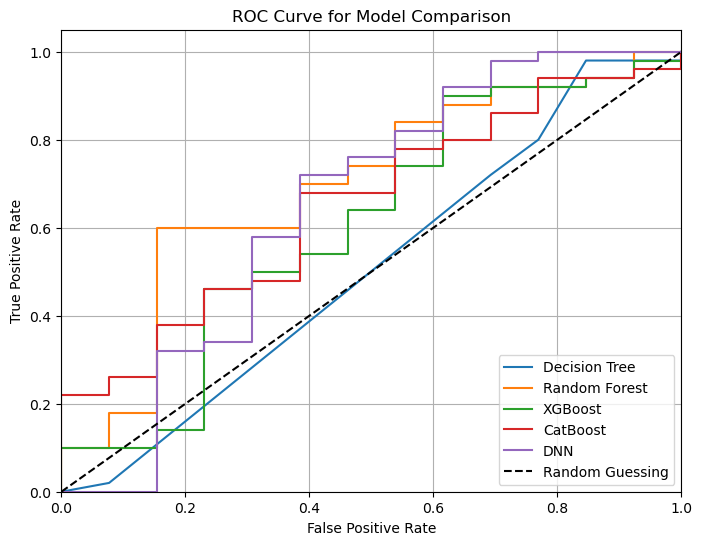

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the models and their names for the legend
models = [best_dt_model, best_rf_model, best_xgb_model, best_catboost_model, best_dnn_model]
model_names = ["Decision Tree", "Random Forest", "XGBoost", "CatBoost", "DNN"]

# Create a figure and axis for the ROC plot
plt.figure(figsize=(8, 6))

# Plot ROC curves for each model
for model, name in zip(models, model_names):
    if name == "DNN":
        y_pred = model.predict(X_test)  # For DNN, we don't use predict_proba
    else:
        y_pred = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name}')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Comparison')
plt.legend(loc='lower right')
plt.grid()

# Show the ROC plot
plt.show()


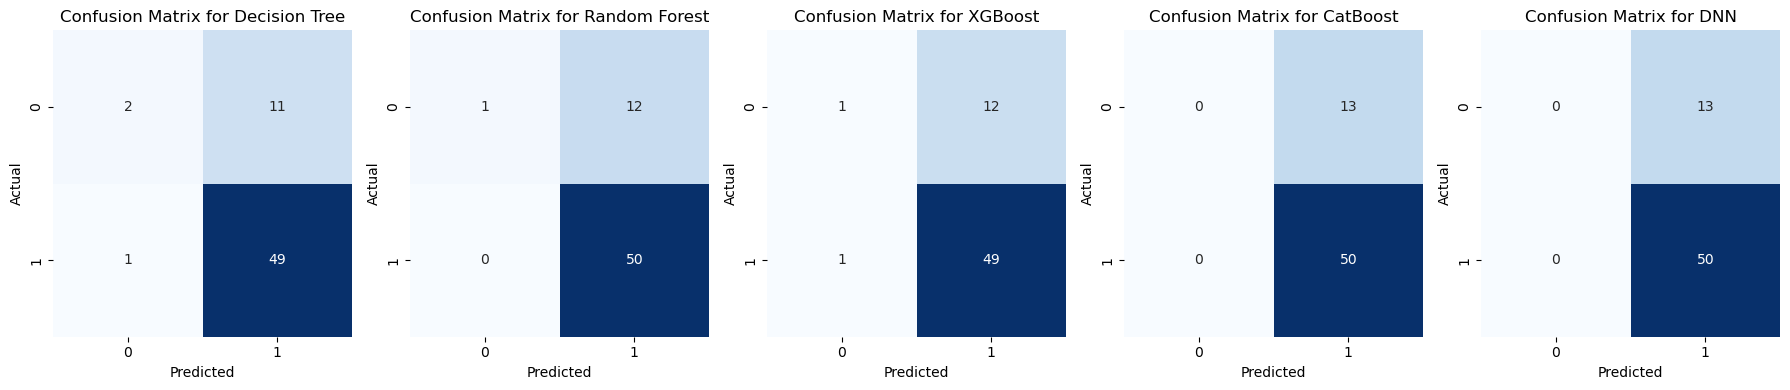

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their names
models = [best_dt_model, best_rf_model, best_xgb_model, best_catboost_model, best_dnn_model]
model_names = ["Decision Tree", "Random Forest", "XGBoost", "CatBoost", "DNN"]

# Create a subplot grid to display confusion matrices for all models in a single row
num_models = len(models)
fig, axes = plt.subplots(1, num_models, figsize=(18, 4))

for model, name, ax in zip(models, model_names, axes):
    if name == "DNN":
        predictions = model.predict(X_test)
    else:
        predictions = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    predictions_binary = (predictions > 0.5).astype(int)  # Convert to binary predictions
    confusion = confusion_matrix(y_test, predictions_binary)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix for {name}")

plt.tight_layout()
plt.show()


In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the icd_dataset
icd_dataset = pd.read_csv('icd_final_27th_Oct.csv')
# Create a 'mortality_label' column based on 'deathtime'
icd_dataset['mortality_label'] = icd_dataset['deathtime'].notna().astype(int)

# Drop the 'deathtime' column
icd_dataset.drop(['deathtime'], axis=1, inplace=True)

# Define categorical columns for one-hot encoding
categorical_columns = ['gender']

# Define numeric columns for standardization
numeric_columns = ['anchor_age', 'hematocrit_serum', 'blood_urea_nitrogen', 'serum_creatinine',
                   'Non_Invasive_Blood_Pressure_systolic', 'Non_Invasive_Blood_Pressure_diastolic',
                   'lipase', 'white_bloodcells', 'Glucose_serum', 'platelet_PLT', 'Prothrombin_time',
                   'aminotransferase_ALT', 'Total_Bilirubin', 'Anion_gap', 'Heart_rate_Alarm_High',
                   'Heart_rate_Alarm_low', 'earliest_weight_kg']

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_gender = encoder.fit_transform(icd_dataset[categorical_columns])
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names(categorical_columns))

# Drop the original 'gender' column
icd_dataset.drop(categorical_columns, axis=1, inplace=True)

# Concatenate the one-hot encoded 'gender' column with the dataset
icd_dataset = pd.concat([icd_dataset, encoded_gender_df], axis=1)

# Standardize numeric features
scaler = StandardScaler()
icd_dataset[numeric_columns] = scaler.fit_transform(icd_dataset[numeric_columns])


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# Define a list of columns to drop (adjust as needed)
columns_to_drop = ['Unnamed: 0', 'hadm_id']  # Add more columns if necessary

# Drop the specified columns
icd_dataset.drop(columns_to_drop, axis=1, inplace=True)

# Display information about the final preprocessed icd_dataset
icd_dataset

,alcoholism,anchor_age,hematocrit_serum,blood_urea_nitrogen,serum_creatinine,Non_Invasive_Blood_Pressure_systolic,Non_Invasive_Blood_Pressure_diastolic,lipase,white_bloodcells,Glucose_serum,platelet_PLT,Prothrombin_time,aminotransferase_ALT,Total_Bilirubin,Anion_gap,Heart_rate_Alarm_High,Heart_rate_Alarm_low,earliest_weight_kg,mortality_label,gender_M
0,0,0.081500,-1.665553,-0.220876,-0.272637,0.504210,0.088742,-0.457397,-0.360786,-0.305946,1.309470,-0.335295,-0.271671,-0.416117,-0.394039,-0.380539,-0.551069,-1.040507,0,0.0
1,0,0.778537,0.064984,-0.021437,-0.213947,-2.778348,-2.066008,-0.627795,0.047148,0.652418,-0.795369,0.110244,0.643089,-0.109899,0.324409,0.555855,-0.551069,-0.846360,1,0.0
2,0,1.707919,-0.032707,-0.460201,-0.331327,0.051443,-0.562694,-0.264774,-0.202145,-0.527716,-0.024784,-0.080701,-0.262899,-0.435256,-0.394039,0.555855,-0.551069,-1.075022,0,0.0
3,0,-1.428746,-0.437430,-0.659640,-0.683467,-0.627707,-0.362252,NaN,-0.814046,-0.092096,1.031203,-0.632321,-0.251621,-0.511810,-1.112487,2.428644,-0.551069,-0.889504,1,1.0
4,0,-1.196401,-1.135227,-0.220876,-0.448707,1.787049,1.642167,-0.518783,-1.561925,-0.598999,-1.330498,0.184500,-0.244102,-0.301285,-0.034815,-0.380539,0.684415,0.318523,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,1,-1.835351,-0.339738,-0.699527,-0.507397,-0.514515,0.038631,0.324739,0.579729,-0.741565,-0.388671,0.195108,-0.031076,2.454673,0.504021,-0.380539,-0.551069,1.246115,0,1.0
450,0,-0.847882,0.064984,0.217888,-0.390017,0.655132,0.990730,-0.402362,1.690216,-0.472273,-0.067594,-0.409551,-0.226559,-0.243870,-0.214427,-0.380539,0.684415,0.327152,0,1.0
451,0,0.488105,-0.116443,-0.500089,-0.683467,0.277827,0.439515,-0.229848,-0.394781,-0.131698,-0.381536,-0.388335,-0.276683,-0.396978,-1.112487,-0.380539,0.684415,0.439326,0,1.0
452,0,0.836623,-0.702593,1.454405,1.840202,-1.608701,-1.514793,-0.594986,-0.304129,0.296002,0.075107,8.066292,-0.224053,-0.435256,-0.214427,-0.380539,0.684415,-0.773015,0,1.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Define features (X) and the target variable (y)
X = icd_dataset.drop(columns=['mortality_label'])
y = icd_dataset['mortality_label']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Define the Decision Tree model and the hyperparameter grid
dt_model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Split the training set into a new training set and a validation set
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_new_train_imputed = imputer.fit_transform(X_new_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Step 4: Perform grid search cross-validation to tune hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_new_train_imputed, y_new_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

# Create a new Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params)

# Train the model on the entire new training set
best_dt_model.fit(X_new_train_imputed, y_new_train)

# Evaluate the model on the validation set
val_predictions = best_dt_model.predict(X_val_imputed)
val_roc_auc = roc_auc_score(y_val, val_predictions)
val_mcc = matthews_corrcoef(y_val, val_predictions)

print("\nValidation Set Performance:")
print(f"AUC-ROC Score: {val_roc_auc}")
print(f"MCC Score: {val_mcc}")

# Step 5: Use the best model to predict the test set
test_predictions = best_dt_model.predict(X_test_imputed)

# Step 6: Evaluate the model on the test set
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_mcc = matthews_corrcoef(y_test, test_predictions)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_roc_auc}")
print(f"MCC Score: {test_mcc}")


Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Validation Set Performance:
AUC-ROC Score: 0.5879765395894427
MCC Score: 0.19145989526687088

Test Set Performance:
AUC-ROC Score: 0.6396103896103896
MCC Score: 0.3090407713346371


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define the Random Forest model and the hyperparameter grid
rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Split the training set into a new training set and a validation set
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Handle missing values by imputing with the mean (if not already done)
imputer = SimpleImputer(strategy='mean')
X_new_train_imputed = imputer.fit_transform(X_new_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Step 4: Perform grid search cross-validation to tune hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_new_train_imputed, y_new_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

# Create a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)

# Train the model on the entire new training set
best_rf_model.fit(X_new_train_imputed, y_new_train)

# Evaluate the model on the validation set
val_predictions = best_rf_model.predict(X_val_imputed)
val_roc_auc = roc_auc_score(y_val, val_predictions)
val_mcc = matthews_corrcoef(y_val, val_predictions)

print("\nValidation Set Performance:")
print(f"AUC-ROC Score: {val_roc_auc}")
print(f"MCC Score: {val_mcc}")

# Step 5: Use the best model to predict the test set
test_predictions = best_rf_model.predict(X_test_imputed)

# Step 6: Evaluate the model on the test set
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_mcc = matthews_corrcoef(y_test, test_predictions)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_roc_auc}")
print(f"MCC Score: {test_mcc}")


Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Validation Set Performance:
AUC-ROC Score: 0.5454545454545454
MCC Score: 0.27979068655483924

Test Set Performance:
AUC-ROC Score: 0.5519480519480519
MCC Score: 0.16450322423053299


In [16]:
import xgboost as xgb

# Step 1: Define the XGBoost model and the hyperparameter grid
xgb_model = xgb.XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5, 6],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage for boosting
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
}

# Step 2: Split the training set into a new training set and a validation set
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Handle missing values by imputing with the mean (if not already done)
imputer = SimpleImputer(strategy='mean')
X_new_train_imputed = imputer.fit_transform(X_new_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Step 4: Perform grid search cross-validation to tune hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_new_train_imputed, y_new_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

# Create a new XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)

# Train the model on the entire new training set
best_xgb_model.fit(X_new_train_imputed, y_new_train)

# Evaluate the model on the validation set
val_predictions = best_xgb_model.predict(X_val_imputed)
val_roc_auc = roc_auc_score(y_val, val_predictions)
val_mcc = matthews_corrcoef(y_val, val_predictions)

print("\nValidation Set Performance:")
print(f"AUC-ROC Score: {val_roc_auc}")
print(f"MCC Score: {val_mcc}")

# Step 5: Use the best model to predict the test set
test_predictions = best_xgb_model.predict(X_test_imputed)

# Step 6: Evaluate the model on the test set
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_mcc = matthews_corrcoef(y_test, test_predictions)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_roc_auc}")
print(f"MCC Score: {test_mcc}")


Best Hyperparameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}

Validation Set Performance:
AUC-ROC Score: 0.719208211143695
MCC Score: 0.571039268726491

Test Set Performance:
AUC-ROC Score: 0.5974025974025974
MCC Score: 0.21560984046602588


In [17]:
from catboost import CatBoostClassifier

# Step 1: Define the CatBoost model and the hyperparameter grid
catboost_model = CatBoostClassifier()
param_grid = {
    'iterations': [50, 100, 200],  # Number of boosting rounds (trees)
    'depth': [4, 6, 8],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage for boosting
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization coefficient
}

# Step 2: Split the training set into a new training set and a validation set
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Handle missing values by imputing with the mean (if not already done)
imputer = SimpleImputer(strategy='mean')
X_new_train_imputed = imputer.fit_transform(X_new_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Step 4: Perform grid search cross-validation to tune hyperparameters
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_new_train_imputed, y_new_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

# Create a new CatBoost model with the best hyperparameters
best_catboost_model = CatBoostClassifier(**best_params)

# Train the model on the entire new training set
best_catboost_model.fit(X_new_train_imputed, y_new_train)

# Evaluate the model on the validation set
val_predictions = best_catboost_model.predict(X_val_imputed)
val_roc_auc = roc_auc_score(y_val, val_predictions)
val_mcc = matthews_corrcoef(y_val, val_predictions)

print("\nValidation Set Performance:")
print(f"AUC-ROC Score: {val_roc_auc}")
print(f"MCC Score: {val_mcc}")

# Step 5: Use the best model to predict the test set
test_predictions = best_catboost_model.predict(X_test_imputed)

# Step 6: Evaluate the model on the test set
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_mcc = matthews_corrcoef(y_test, test_predictions)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_roc_auc}")
print(f"MCC Score: {test_mcc}")


0:	learn: 0.6896596	total: 1.08ms	remaining: 53ms
1:	learn: 0.6860573	total: 2.3ms	remaining: 55.2ms
2:	learn: 0.6819983	total: 3.13ms	remaining: 49.1ms
3:	learn: 0.6779925	total: 4.09ms	remaining: 47.1ms
4:	learn: 0.6745481	total: 5.02ms	remaining: 45.2ms
5:	learn: 0.6713666	total: 6.05ms	remaining: 44.4ms
6:	learn: 0.6680177	total: 7.04ms	remaining: 43.2ms
7:	learn: 0.6644513	total: 8.01ms	remaining: 42.1ms
8:	learn: 0.6610290	total: 8.94ms	remaining: 40.7ms
9:	learn: 0.6580132	total: 10ms	remaining: 40ms
10:	learn: 0.6542402	total: 11ms	remaining: 39ms
11:	learn: 0.6509568	total: 11.9ms	remaining: 37.8ms
12:	learn: 0.6478110	total: 12.8ms	remaining: 36.4ms
13:	learn: 0.6440284	total: 13.7ms	remaining: 35.3ms
14:	learn: 0.6410490	total: 14.6ms	remaining: 34.1ms
15:	learn: 0.6382949	total: 15.5ms	remaining: 32.9ms
16:	learn: 0.6354368	total: 16.5ms	remaining: 32ms
17:	learn: 0.6322895	total: 17.3ms	remaining: 30.8ms
18:	learn: 0.6290026	total: 18.2ms	remaining: 29.7ms
19:	learn: 0.625

38:	learn: 0.5755989	total: 45.1ms	remaining: 12.7ms
39:	learn: 0.5734921	total: 46.1ms	remaining: 11.5ms
40:	learn: 0.5713767	total: 47ms	remaining: 10.3ms
41:	learn: 0.5689405	total: 47.7ms	remaining: 9.09ms
42:	learn: 0.5667175	total: 48.5ms	remaining: 7.9ms
43:	learn: 0.5647908	total: 49.4ms	remaining: 6.73ms
44:	learn: 0.5627523	total: 50.2ms	remaining: 5.57ms
45:	learn: 0.5604522	total: 50.9ms	remaining: 4.43ms
46:	learn: 0.5579945	total: 51.7ms	remaining: 3.3ms
47:	learn: 0.5560263	total: 52.5ms	remaining: 2.19ms
48:	learn: 0.5539640	total: 53.2ms	remaining: 1.08ms
49:	learn: 0.5516315	total: 53.9ms	remaining: 0us
0:	learn: 0.6597036	total: 1.33ms	remaining: 65.1ms
1:	learn: 0.6302140	total: 2.01ms	remaining: 48.3ms
2:	learn: 0.5977275	total: 2.63ms	remaining: 41.1ms
3:	learn: 0.5698470	total: 3.27ms	remaining: 37.6ms
4:	learn: 0.5483451	total: 3.95ms	remaining: 35.6ms
5:	learn: 0.5332704	total: 4.62ms	remaining: 33.9ms
6:	learn: 0.5198879	total: 5.21ms	remaining: 32ms
7:	learn:

21:	learn: 0.3847522	total: 12.3ms	remaining: 15.6ms
22:	learn: 0.3774048	total: 13.2ms	remaining: 15.5ms
23:	learn: 0.3714827	total: 14ms	remaining: 15.1ms
24:	learn: 0.3668656	total: 14.5ms	remaining: 14.5ms
25:	learn: 0.3598503	total: 15.1ms	remaining: 13.9ms
26:	learn: 0.3555384	total: 15.7ms	remaining: 13.3ms
27:	learn: 0.3503853	total: 16.3ms	remaining: 12.8ms
28:	learn: 0.3477326	total: 16.9ms	remaining: 12.3ms
29:	learn: 0.3436589	total: 17.6ms	remaining: 11.7ms
30:	learn: 0.3391749	total: 18.2ms	remaining: 11.2ms
31:	learn: 0.3372463	total: 18.8ms	remaining: 10.6ms
32:	learn: 0.3348817	total: 19.4ms	remaining: 9.98ms
33:	learn: 0.3336759	total: 20ms	remaining: 9.4ms
34:	learn: 0.3321659	total: 20.7ms	remaining: 8.88ms
35:	learn: 0.3291925	total: 21.4ms	remaining: 8.32ms
36:	learn: 0.3260151	total: 22ms	remaining: 7.72ms
37:	learn: 0.3207131	total: 22.9ms	remaining: 7.23ms
38:	learn: 0.3178320	total: 23.7ms	remaining: 6.69ms
39:	learn: 0.3136466	total: 24.4ms	remaining: 6.09ms


36:	learn: 0.2234110	total: 21ms	remaining: 7.39ms
37:	learn: 0.2180589	total: 22ms	remaining: 6.94ms
38:	learn: 0.2152504	total: 22.9ms	remaining: 6.46ms
39:	learn: 0.2131502	total: 23.6ms	remaining: 5.89ms
40:	learn: 0.2054459	total: 24.3ms	remaining: 5.33ms
41:	learn: 0.2026133	total: 25ms	remaining: 4.76ms
42:	learn: 0.1983071	total: 25.7ms	remaining: 4.18ms
43:	learn: 0.1941964	total: 26.6ms	remaining: 3.63ms
44:	learn: 0.1900493	total: 27.4ms	remaining: 3.05ms
45:	learn: 0.1836346	total: 28.2ms	remaining: 2.45ms
46:	learn: 0.1785468	total: 29.1ms	remaining: 1.86ms
47:	learn: 0.1753590	total: 29.7ms	remaining: 1.24ms
48:	learn: 0.1729383	total: 30.5ms	remaining: 621us
49:	learn: 0.1699247	total: 31.1ms	remaining: 0us
0:	learn: 0.6292250	total: 923us	remaining: 45.3ms
1:	learn: 0.5787631	total: 1.55ms	remaining: 37.3ms
2:	learn: 0.5322363	total: 2.11ms	remaining: 33ms
3:	learn: 0.4957255	total: 2.77ms	remaining: 31.8ms
4:	learn: 0.4668378	total: 3.31ms	remaining: 29.8ms
5:	learn: 0

19:	learn: 0.6335258	total: 11.4ms	remaining: 17.2ms
20:	learn: 0.6310823	total: 12.2ms	remaining: 16.9ms
21:	learn: 0.6281968	total: 13ms	remaining: 16.6ms
22:	learn: 0.6253690	total: 13.6ms	remaining: 16ms
23:	learn: 0.6228197	total: 14.2ms	remaining: 15.4ms
24:	learn: 0.6206153	total: 14.8ms	remaining: 14.8ms
25:	learn: 0.6177453	total: 15.4ms	remaining: 14.2ms
26:	learn: 0.6149168	total: 16.2ms	remaining: 13.8ms
27:	learn: 0.6122640	total: 16.7ms	remaining: 13.2ms
28:	learn: 0.6098193	total: 17.3ms	remaining: 12.5ms
29:	learn: 0.6067878	total: 17.9ms	remaining: 11.9ms
30:	learn: 0.6047558	total: 18.4ms	remaining: 11.3ms
31:	learn: 0.6023946	total: 19.1ms	remaining: 10.7ms
32:	learn: 0.6002687	total: 19.7ms	remaining: 10.2ms
33:	learn: 0.5982300	total: 20.3ms	remaining: 9.56ms
34:	learn: 0.5960978	total: 20.9ms	remaining: 8.97ms
35:	learn: 0.5938042	total: 21.9ms	remaining: 8.5ms
36:	learn: 0.5923088	total: 22.6ms	remaining: 7.94ms
37:	learn: 0.5900643	total: 23.3ms	remaining: 7.37m

49:	learn: 0.3230737	total: 28.9ms	remaining: 0us
0:	learn: 0.6672745	total: 806us	remaining: 39.5ms
1:	learn: 0.6343140	total: 1.74ms	remaining: 41.7ms
2:	learn: 0.6089160	total: 2.35ms	remaining: 36.9ms
3:	learn: 0.5862373	total: 2.96ms	remaining: 34ms
4:	learn: 0.5656125	total: 3.46ms	remaining: 31.1ms
5:	learn: 0.5517608	total: 3.95ms	remaining: 29ms
6:	learn: 0.5362503	total: 4.42ms	remaining: 27.2ms
7:	learn: 0.5248873	total: 4.91ms	remaining: 25.8ms
8:	learn: 0.5105496	total: 5.42ms	remaining: 24.7ms
9:	learn: 0.5015842	total: 5.9ms	remaining: 23.6ms
10:	learn: 0.4910157	total: 6.42ms	remaining: 22.8ms
11:	learn: 0.4822471	total: 7.08ms	remaining: 22.4ms
12:	learn: 0.4748402	total: 7.73ms	remaining: 22ms
13:	learn: 0.4670886	total: 8.33ms	remaining: 21.4ms
14:	learn: 0.4607893	total: 8.91ms	remaining: 20.8ms
15:	learn: 0.4526147	total: 9.54ms	remaining: 20.3ms
16:	learn: 0.4448921	total: 10.2ms	remaining: 19.8ms
17:	learn: 0.4381450	total: 10.8ms	remaining: 19.3ms
18:	learn: 0.4

0:	learn: 0.6432596	total: 1.38ms	remaining: 67.4ms
1:	learn: 0.5867435	total: 2.37ms	remaining: 56.8ms
2:	learn: 0.5457184	total: 3.04ms	remaining: 47.6ms
3:	learn: 0.5168648	total: 3.81ms	remaining: 43.8ms
4:	learn: 0.4925969	total: 4.36ms	remaining: 39.2ms
5:	learn: 0.4769602	total: 4.88ms	remaining: 35.8ms
6:	learn: 0.4641488	total: 5.37ms	remaining: 33ms
7:	learn: 0.4524459	total: 6.19ms	remaining: 32.5ms
8:	learn: 0.4389033	total: 6.73ms	remaining: 30.7ms
9:	learn: 0.4328438	total: 7.2ms	remaining: 28.8ms
10:	learn: 0.4228721	total: 7.78ms	remaining: 27.6ms
11:	learn: 0.4155452	total: 8.39ms	remaining: 26.6ms
12:	learn: 0.4072369	total: 8.91ms	remaining: 25.4ms
13:	learn: 0.3958687	total: 9.42ms	remaining: 24.2ms
14:	learn: 0.3902869	total: 9.94ms	remaining: 23.2ms
15:	learn: 0.3822098	total: 10.4ms	remaining: 22.1ms
16:	learn: 0.3752576	total: 10.9ms	remaining: 21.2ms
17:	learn: 0.3674989	total: 11.5ms	remaining: 20.4ms
18:	learn: 0.3639037	total: 12ms	remaining: 19.5ms
19:	lear

3:	learn: 0.6809390	total: 3.02ms	remaining: 34.7ms
4:	learn: 0.6785883	total: 4.11ms	remaining: 37ms
5:	learn: 0.6765731	total: 5.38ms	remaining: 39.4ms
6:	learn: 0.6737875	total: 6.31ms	remaining: 38.8ms
7:	learn: 0.6710463	total: 7.1ms	remaining: 37.3ms
8:	learn: 0.6682358	total: 7.78ms	remaining: 35.4ms
9:	learn: 0.6658565	total: 8.32ms	remaining: 33.3ms
10:	learn: 0.6628114	total: 8.9ms	remaining: 31.5ms
11:	learn: 0.6605947	total: 9.47ms	remaining: 30ms
12:	learn: 0.6581135	total: 10ms	remaining: 28.6ms
13:	learn: 0.6547781	total: 10.7ms	remaining: 27.5ms
14:	learn: 0.6520969	total: 11.4ms	remaining: 26.6ms
15:	learn: 0.6497532	total: 12.2ms	remaining: 25.8ms
16:	learn: 0.6470831	total: 12.8ms	remaining: 24.9ms
17:	learn: 0.6446983	total: 13.5ms	remaining: 24ms
18:	learn: 0.6421023	total: 14.2ms	remaining: 23.2ms
19:	learn: 0.6398308	total: 15.1ms	remaining: 22.6ms
20:	learn: 0.6376543	total: 15.8ms	remaining: 21.9ms
21:	learn: 0.6354119	total: 16.6ms	remaining: 21.1ms
22:	learn:

24:	learn: 0.4173508	total: 13.9ms	remaining: 13.9ms
25:	learn: 0.4130520	total: 14.8ms	remaining: 13.7ms
26:	learn: 0.4079738	total: 15.7ms	remaining: 13.4ms
27:	learn: 0.4036881	total: 16.4ms	remaining: 12.8ms
28:	learn: 0.3998984	total: 17ms	remaining: 12.3ms
29:	learn: 0.3949583	total: 17.6ms	remaining: 11.7ms
30:	learn: 0.3917916	total: 18.3ms	remaining: 11.2ms
31:	learn: 0.3883830	total: 18.8ms	remaining: 10.6ms
32:	learn: 0.3860426	total: 19.4ms	remaining: 10ms
33:	learn: 0.3838455	total: 20ms	remaining: 9.43ms
34:	learn: 0.3799867	total: 20.7ms	remaining: 8.87ms
35:	learn: 0.3767457	total: 21.3ms	remaining: 8.29ms
36:	learn: 0.3728852	total: 22ms	remaining: 7.75ms
37:	learn: 0.3708352	total: 22.8ms	remaining: 7.21ms
38:	learn: 0.3682588	total: 23.5ms	remaining: 6.62ms
39:	learn: 0.3650087	total: 24.1ms	remaining: 6.03ms
40:	learn: 0.3633290	total: 24.8ms	remaining: 5.43ms
41:	learn: 0.3597919	total: 25.4ms	remaining: 4.83ms
42:	learn: 0.3573580	total: 26.2ms	remaining: 4.27ms
4

39:	learn: 0.3773582	total: 22.3ms	remaining: 5.58ms
40:	learn: 0.3743785	total: 23.3ms	remaining: 5.12ms
41:	learn: 0.3697450	total: 24.3ms	remaining: 4.63ms
42:	learn: 0.3649978	total: 25.1ms	remaining: 4.09ms
43:	learn: 0.3615854	total: 25.8ms	remaining: 3.52ms
44:	learn: 0.3607138	total: 26.5ms	remaining: 2.95ms
45:	learn: 0.3579682	total: 27.4ms	remaining: 2.38ms
46:	learn: 0.3566648	total: 28.2ms	remaining: 1.8ms
47:	learn: 0.3558605	total: 28.9ms	remaining: 1.2ms
48:	learn: 0.3520845	total: 29.7ms	remaining: 605us
49:	learn: 0.3499901	total: 30.4ms	remaining: 0us
0:	learn: 0.6719630	total: 956us	remaining: 46.9ms
1:	learn: 0.6474622	total: 1.6ms	remaining: 38.5ms
2:	learn: 0.6231171	total: 2.17ms	remaining: 34ms
3:	learn: 0.5989548	total: 2.66ms	remaining: 30.6ms
4:	learn: 0.5798452	total: 3.31ms	remaining: 29.8ms
5:	learn: 0.5684339	total: 3.88ms	remaining: 28.5ms
6:	learn: 0.5519263	total: 4.34ms	remaining: 26.7ms
7:	learn: 0.5399163	total: 4.82ms	remaining: 25.3ms
8:	learn: 0

38:	learn: 0.2867170	total: 20.9ms	remaining: 5.91ms
39:	learn: 0.2804609	total: 21.9ms	remaining: 5.48ms
40:	learn: 0.2780336	total: 22.8ms	remaining: 5ms
41:	learn: 0.2757902	total: 23.6ms	remaining: 4.49ms
42:	learn: 0.2705841	total: 24.2ms	remaining: 3.94ms
43:	learn: 0.2682779	total: 24.9ms	remaining: 3.4ms
44:	learn: 0.2645574	total: 25.6ms	remaining: 2.85ms
45:	learn: 0.2608127	total: 26.3ms	remaining: 2.29ms
46:	learn: 0.2576150	total: 27ms	remaining: 1.72ms
47:	learn: 0.2565981	total: 27.6ms	remaining: 1.15ms
48:	learn: 0.2490657	total: 28.3ms	remaining: 576us
49:	learn: 0.2445713	total: 28.9ms	remaining: 0us
0:	learn: 0.6536521	total: 901us	remaining: 44.2ms
1:	learn: 0.6006687	total: 1.42ms	remaining: 34ms
2:	learn: 0.5628259	total: 1.91ms	remaining: 29.9ms
3:	learn: 0.5315734	total: 2.4ms	remaining: 27.7ms
4:	learn: 0.5086266	total: 2.87ms	remaining: 25.8ms
5:	learn: 0.4911047	total: 3.37ms	remaining: 24.7ms
6:	learn: 0.4748869	total: 3.83ms	remaining: 23.5ms
7:	learn: 0.46

65:	learn: 0.5236642	total: 39ms	remaining: 20.1ms
66:	learn: 0.5219095	total: 40.1ms	remaining: 19.7ms
67:	learn: 0.5199701	total: 40.8ms	remaining: 19.2ms
68:	learn: 0.5182448	total: 41.5ms	remaining: 18.6ms
69:	learn: 0.5170298	total: 42.1ms	remaining: 18.1ms
70:	learn: 0.5156166	total: 42.8ms	remaining: 17.5ms
71:	learn: 0.5140730	total: 43.4ms	remaining: 16.9ms
72:	learn: 0.5127211	total: 44ms	remaining: 16.3ms
73:	learn: 0.5116768	total: 44.6ms	remaining: 15.7ms
74:	learn: 0.5098042	total: 45.3ms	remaining: 15.1ms
75:	learn: 0.5080840	total: 46ms	remaining: 14.5ms
76:	learn: 0.5065867	total: 46.7ms	remaining: 13.9ms
77:	learn: 0.5053854	total: 47.4ms	remaining: 13.4ms
78:	learn: 0.5037652	total: 48.1ms	remaining: 12.8ms
79:	learn: 0.5023084	total: 48.7ms	remaining: 12.2ms
80:	learn: 0.5009752	total: 49.4ms	remaining: 11.6ms
81:	learn: 0.4997367	total: 50.6ms	remaining: 11.1ms
82:	learn: 0.4984282	total: 51.5ms	remaining: 10.5ms
83:	learn: 0.4970288	total: 52.4ms	remaining: 9.97ms

46:	learn: 0.5567820	total: 44.2ms	remaining: 49.8ms
47:	learn: 0.5544193	total: 45.1ms	remaining: 48.8ms
48:	learn: 0.5517934	total: 45.9ms	remaining: 47.8ms
49:	learn: 0.5495740	total: 46.5ms	remaining: 46.5ms
50:	learn: 0.5475517	total: 47ms	remaining: 45.2ms
51:	learn: 0.5454818	total: 47.6ms	remaining: 43.9ms
52:	learn: 0.5436245	total: 48.1ms	remaining: 42.6ms
53:	learn: 0.5418760	total: 48.6ms	remaining: 41.4ms
54:	learn: 0.5396809	total: 49.2ms	remaining: 40.2ms
55:	learn: 0.5372346	total: 49.8ms	remaining: 39.1ms
56:	learn: 0.5351587	total: 50.3ms	remaining: 37.9ms
57:	learn: 0.5332991	total: 50.9ms	remaining: 36.9ms
58:	learn: 0.5315144	total: 51.5ms	remaining: 35.8ms
59:	learn: 0.5298070	total: 52ms	remaining: 34.7ms
60:	learn: 0.5281471	total: 52.9ms	remaining: 33.8ms
61:	learn: 0.5264910	total: 53.5ms	remaining: 32.8ms
62:	learn: 0.5246849	total: 54ms	remaining: 31.7ms
63:	learn: 0.5231250	total: 54.8ms	remaining: 30.8ms
64:	learn: 0.5212416	total: 55.6ms	remaining: 29.9ms

21:	learn: 0.6188158	total: 20.2ms	remaining: 71.8ms
22:	learn: 0.6155414	total: 21.4ms	remaining: 71.7ms
23:	learn: 0.6126275	total: 22.2ms	remaining: 70.2ms
24:	learn: 0.6098679	total: 22.8ms	remaining: 68.3ms
25:	learn: 0.6067747	total: 23.4ms	remaining: 66.6ms
26:	learn: 0.6036627	total: 24ms	remaining: 64.9ms
27:	learn: 0.6011154	total: 24.5ms	remaining: 63.1ms
28:	learn: 0.5983166	total: 25.1ms	remaining: 61.4ms
29:	learn: 0.5953084	total: 25.7ms	remaining: 59.9ms
30:	learn: 0.5930832	total: 26.2ms	remaining: 58.4ms
31:	learn: 0.5906953	total: 26.8ms	remaining: 56.9ms
32:	learn: 0.5883137	total: 27.3ms	remaining: 55.5ms
33:	learn: 0.5862311	total: 27.9ms	remaining: 54.1ms
34:	learn: 0.5839368	total: 28.5ms	remaining: 52.9ms
35:	learn: 0.5815722	total: 29ms	remaining: 51.6ms
36:	learn: 0.5796368	total: 29.6ms	remaining: 50.4ms
37:	learn: 0.5775840	total: 30.2ms	remaining: 49.2ms
38:	learn: 0.5755989	total: 30.7ms	remaining: 48.1ms
39:	learn: 0.5734921	total: 31.3ms	remaining: 46.9

18:	learn: 0.4039080	total: 10.5ms	remaining: 44.7ms
19:	learn: 0.3986053	total: 11.4ms	remaining: 45.7ms
20:	learn: 0.3947527	total: 12.3ms	remaining: 46.4ms
21:	learn: 0.3915512	total: 12.9ms	remaining: 45.9ms
22:	learn: 0.3841043	total: 13.6ms	remaining: 45.4ms
23:	learn: 0.3794923	total: 14.1ms	remaining: 44.8ms
24:	learn: 0.3756788	total: 14.7ms	remaining: 44.2ms
25:	learn: 0.3710157	total: 15.3ms	remaining: 43.6ms
26:	learn: 0.3679049	total: 15.9ms	remaining: 43.1ms
27:	learn: 0.3623491	total: 16.9ms	remaining: 43.4ms
28:	learn: 0.3561159	total: 17.5ms	remaining: 42.8ms
29:	learn: 0.3527864	total: 18.1ms	remaining: 42.2ms
30:	learn: 0.3502460	total: 18.7ms	remaining: 41.7ms
31:	learn: 0.3468772	total: 19.4ms	remaining: 41.3ms
32:	learn: 0.3439793	total: 20.1ms	remaining: 40.9ms
33:	learn: 0.3425980	total: 20.8ms	remaining: 40.3ms
34:	learn: 0.3388769	total: 21.9ms	remaining: 40.7ms
35:	learn: 0.3357201	total: 22.7ms	remaining: 40.3ms
36:	learn: 0.3345975	total: 23.3ms	remaining: 

0:	learn: 0.6605083	total: 1.18ms	remaining: 117ms
1:	learn: 0.6257718	total: 2.28ms	remaining: 112ms
2:	learn: 0.5972199	total: 2.9ms	remaining: 93.7ms
3:	learn: 0.5687015	total: 3.66ms	remaining: 87.8ms
4:	learn: 0.5492170	total: 4.43ms	remaining: 84.3ms
5:	learn: 0.5347517	total: 5.11ms	remaining: 80ms
6:	learn: 0.5200138	total: 5.73ms	remaining: 76.2ms
7:	learn: 0.5082991	total: 6.4ms	remaining: 73.6ms
8:	learn: 0.4936209	total: 7.13ms	remaining: 72ms
9:	learn: 0.4834466	total: 7.78ms	remaining: 70ms
10:	learn: 0.4702914	total: 8.45ms	remaining: 68.3ms
11:	learn: 0.4580063	total: 9.19ms	remaining: 67.4ms
12:	learn: 0.4476490	total: 9.98ms	remaining: 66.8ms
13:	learn: 0.4357898	total: 10.7ms	remaining: 65.9ms
14:	learn: 0.4266831	total: 11.6ms	remaining: 65.6ms
15:	learn: 0.4183921	total: 12.3ms	remaining: 64.6ms
16:	learn: 0.4140288	total: 13.1ms	remaining: 64.1ms
17:	learn: 0.4091110	total: 13.8ms	remaining: 63ms
18:	learn: 0.4006947	total: 14.5ms	remaining: 61.9ms
19:	learn: 0.39

0:	learn: 0.6294083	total: 936us	remaining: 92.8ms
1:	learn: 0.5802829	total: 1.87ms	remaining: 91.7ms
2:	learn: 0.5324602	total: 2.39ms	remaining: 77.2ms
3:	learn: 0.4964192	total: 2.88ms	remaining: 69.2ms
4:	learn: 0.4716879	total: 3.36ms	remaining: 63.9ms
5:	learn: 0.4477242	total: 3.85ms	remaining: 60.4ms
6:	learn: 0.4369300	total: 4.34ms	remaining: 57.6ms
7:	learn: 0.4252383	total: 4.88ms	remaining: 56.1ms
8:	learn: 0.4124062	total: 5.43ms	remaining: 54.9ms
9:	learn: 0.4017154	total: 5.95ms	remaining: 53.5ms
10:	learn: 0.3906721	total: 6.42ms	remaining: 51.9ms
11:	learn: 0.3790089	total: 6.91ms	remaining: 50.6ms
12:	learn: 0.3669752	total: 7.39ms	remaining: 49.5ms
13:	learn: 0.3581104	total: 7.99ms	remaining: 49.1ms
14:	learn: 0.3534868	total: 8.62ms	remaining: 48.9ms
15:	learn: 0.3404377	total: 9.16ms	remaining: 48.1ms
16:	learn: 0.3373547	total: 9.68ms	remaining: 47.3ms
17:	learn: 0.3303181	total: 10.2ms	remaining: 46.5ms
18:	learn: 0.3235681	total: 10.7ms	remaining: 45.7ms
19:	

0:	learn: 0.6279101	total: 889us	remaining: 88.1ms
1:	learn: 0.5725887	total: 1.68ms	remaining: 82.1ms
2:	learn: 0.5263861	total: 2.19ms	remaining: 70.7ms
3:	learn: 0.4883366	total: 2.81ms	remaining: 67.3ms
4:	learn: 0.4514044	total: 3.43ms	remaining: 65.2ms
5:	learn: 0.4339387	total: 3.99ms	remaining: 62.5ms
6:	learn: 0.4191120	total: 4.5ms	remaining: 59.7ms
7:	learn: 0.4051907	total: 5.01ms	remaining: 57.6ms
8:	learn: 0.3892986	total: 5.62ms	remaining: 56.8ms
9:	learn: 0.3811475	total: 6.18ms	remaining: 55.6ms
10:	learn: 0.3688208	total: 6.71ms	remaining: 54.3ms
11:	learn: 0.3609267	total: 7.21ms	remaining: 52.9ms
12:	learn: 0.3505821	total: 7.71ms	remaining: 51.6ms
13:	learn: 0.3405201	total: 8.24ms	remaining: 50.6ms
14:	learn: 0.3327467	total: 8.75ms	remaining: 49.6ms
15:	learn: 0.3243578	total: 9.26ms	remaining: 48.6ms
16:	learn: 0.3194278	total: 9.81ms	remaining: 47.9ms
17:	learn: 0.3149362	total: 10.4ms	remaining: 47.3ms
18:	learn: 0.3101489	total: 10.9ms	remaining: 46.3ms
19:	l

0:	learn: 0.6292250	total: 825us	remaining: 81.7ms
1:	learn: 0.5787631	total: 1.66ms	remaining: 81.3ms
2:	learn: 0.5322363	total: 2.25ms	remaining: 72.6ms
3:	learn: 0.4957255	total: 2.99ms	remaining: 71.7ms
4:	learn: 0.4668378	total: 3.83ms	remaining: 72.7ms
5:	learn: 0.4514972	total: 4.45ms	remaining: 69.7ms
6:	learn: 0.4362948	total: 5.11ms	remaining: 67.9ms
7:	learn: 0.4162146	total: 5.8ms	remaining: 66.7ms
8:	learn: 0.4022551	total: 6.45ms	remaining: 65.2ms
9:	learn: 0.3884729	total: 7.25ms	remaining: 65.2ms
10:	learn: 0.3761722	total: 7.86ms	remaining: 63.6ms
11:	learn: 0.3670012	total: 8.46ms	remaining: 62ms
12:	learn: 0.3582133	total: 9ms	remaining: 60.3ms
13:	learn: 0.3469618	total: 9.61ms	remaining: 59.1ms
14:	learn: 0.3421706	total: 10.2ms	remaining: 58.1ms
15:	learn: 0.3380180	total: 10.9ms	remaining: 57.2ms
16:	learn: 0.3331730	total: 11.4ms	remaining: 55.9ms
17:	learn: 0.3244563	total: 12.1ms	remaining: 54.9ms
18:	learn: 0.3186068	total: 12.7ms	remaining: 53.9ms
19:	learn:

0:	learn: 0.6904743	total: 907us	remaining: 89.9ms
1:	learn: 0.6866959	total: 2.1ms	remaining: 103ms
2:	learn: 0.6833294	total: 2.58ms	remaining: 83.5ms
3:	learn: 0.6800390	total: 3.4ms	remaining: 81.5ms
4:	learn: 0.6772093	total: 3.96ms	remaining: 75.3ms
5:	learn: 0.6747162	total: 4.65ms	remaining: 72.9ms
6:	learn: 0.6713674	total: 5.17ms	remaining: 68.7ms
7:	learn: 0.6684628	total: 5.73ms	remaining: 65.9ms
8:	learn: 0.6650654	total: 6.3ms	remaining: 63.7ms
9:	learn: 0.6623217	total: 6.83ms	remaining: 61.5ms
10:	learn: 0.6594362	total: 7.46ms	remaining: 60.3ms
11:	learn: 0.6568753	total: 8.05ms	remaining: 59ms
12:	learn: 0.6541496	total: 8.75ms	remaining: 58.5ms
13:	learn: 0.6509523	total: 9.35ms	remaining: 57.5ms
14:	learn: 0.6482848	total: 9.92ms	remaining: 56.2ms
15:	learn: 0.6459295	total: 10.5ms	remaining: 55.3ms
16:	learn: 0.6431710	total: 11.1ms	remaining: 54.2ms
17:	learn: 0.6405895	total: 11.7ms	remaining: 53.2ms
18:	learn: 0.6379091	total: 12.3ms	remaining: 52.5ms
19:	learn:

88:	learn: 0.5070903	total: 70.5ms	remaining: 8.71ms
89:	learn: 0.5060213	total: 71.6ms	remaining: 7.95ms
90:	learn: 0.5047653	total: 72.5ms	remaining: 7.17ms
91:	learn: 0.5033246	total: 73.1ms	remaining: 6.36ms
92:	learn: 0.5025226	total: 73.9ms	remaining: 5.56ms
93:	learn: 0.5009917	total: 74.6ms	remaining: 4.76ms
94:	learn: 0.5000451	total: 75.4ms	remaining: 3.97ms
95:	learn: 0.4987134	total: 76.3ms	remaining: 3.18ms
96:	learn: 0.4973915	total: 77ms	remaining: 2.38ms
97:	learn: 0.4962924	total: 77.7ms	remaining: 1.58ms
98:	learn: 0.4950594	total: 78.4ms	remaining: 792us
99:	learn: 0.4938330	total: 79.1ms	remaining: 0us
0:	learn: 0.6906067	total: 725us	remaining: 71.9ms
1:	learn: 0.6875633	total: 1.25ms	remaining: 61.3ms
2:	learn: 0.6840994	total: 1.79ms	remaining: 58ms
3:	learn: 0.6805916	total: 2.27ms	remaining: 54.6ms
4:	learn: 0.6774610	total: 2.73ms	remaining: 51.8ms
5:	learn: 0.6748118	total: 3.2ms	remaining: 50.1ms
6:	learn: 0.6716933	total: 3.66ms	remaining: 48.7ms
7:	learn: 

61:	learn: 0.5450981	total: 40.5ms	remaining: 24.8ms
62:	learn: 0.5434661	total: 41.6ms	remaining: 24.4ms
63:	learn: 0.5421539	total: 42.4ms	remaining: 23.8ms
64:	learn: 0.5402951	total: 43.3ms	remaining: 23.3ms
65:	learn: 0.5390103	total: 44ms	remaining: 22.7ms
66:	learn: 0.5373494	total: 44.7ms	remaining: 22ms
67:	learn: 0.5354899	total: 45.4ms	remaining: 21.3ms
68:	learn: 0.5334602	total: 46ms	remaining: 20.7ms
69:	learn: 0.5322190	total: 46.9ms	remaining: 20.1ms
70:	learn: 0.5307855	total: 47.5ms	remaining: 19.4ms
71:	learn: 0.5292083	total: 48.3ms	remaining: 18.8ms
72:	learn: 0.5278087	total: 48.9ms	remaining: 18.1ms
73:	learn: 0.5265615	total: 49.7ms	remaining: 17.4ms
74:	learn: 0.5253821	total: 50.4ms	remaining: 16.8ms
75:	learn: 0.5236592	total: 51.2ms	remaining: 16.2ms
76:	learn: 0.5221963	total: 52.2ms	remaining: 15.6ms
77:	learn: 0.5207763	total: 53.4ms	remaining: 15.1ms
78:	learn: 0.5190716	total: 54.2ms	remaining: 14.4ms
79:	learn: 0.5176397	total: 54.9ms	remaining: 13.7ms

41:	learn: 0.3554555	total: 25.2ms	remaining: 34.7ms
42:	learn: 0.3531291	total: 26.4ms	remaining: 35ms
43:	learn: 0.3510315	total: 27.1ms	remaining: 34.4ms
44:	learn: 0.3488897	total: 27.6ms	remaining: 33.7ms
45:	learn: 0.3461983	total: 28.2ms	remaining: 33ms
46:	learn: 0.3439860	total: 28.7ms	remaining: 32.3ms
47:	learn: 0.3410786	total: 29.2ms	remaining: 31.7ms
48:	learn: 0.3380167	total: 29.8ms	remaining: 31ms
49:	learn: 0.3363363	total: 30.4ms	remaining: 30.4ms
50:	learn: 0.3347892	total: 30.9ms	remaining: 29.7ms
51:	learn: 0.3327170	total: 31.5ms	remaining: 29ms
52:	learn: 0.3301315	total: 32ms	remaining: 28.4ms
53:	learn: 0.3279219	total: 32.6ms	remaining: 27.8ms
54:	learn: 0.3265051	total: 33.2ms	remaining: 27.1ms
55:	learn: 0.3231521	total: 33.7ms	remaining: 26.5ms
56:	learn: 0.3192326	total: 34.3ms	remaining: 25.8ms
57:	learn: 0.3178684	total: 34.8ms	remaining: 25.2ms
58:	learn: 0.3170584	total: 35.3ms	remaining: 24.6ms
59:	learn: 0.3151031	total: 35.9ms	remaining: 23.9ms
60:

0:	learn: 0.6685183	total: 1.2ms	remaining: 119ms
1:	learn: 0.6361446	total: 2.4ms	remaining: 117ms
2:	learn: 0.6098086	total: 3.06ms	remaining: 99ms
3:	learn: 0.5852728	total: 3.73ms	remaining: 89.5ms
4:	learn: 0.5670203	total: 4.37ms	remaining: 83ms
5:	learn: 0.5546053	total: 5.03ms	remaining: 78.7ms
6:	learn: 0.5366621	total: 5.69ms	remaining: 75.6ms
7:	learn: 0.5259981	total: 6.38ms	remaining: 73.3ms
8:	learn: 0.5121269	total: 7.04ms	remaining: 71.2ms
9:	learn: 0.5016709	total: 7.68ms	remaining: 69.1ms
10:	learn: 0.4894265	total: 8.34ms	remaining: 67.5ms
11:	learn: 0.4800931	total: 9.03ms	remaining: 66.2ms
12:	learn: 0.4715513	total: 9.72ms	remaining: 65.1ms
13:	learn: 0.4606263	total: 10.5ms	remaining: 64.5ms
14:	learn: 0.4521324	total: 11.1ms	remaining: 63ms
15:	learn: 0.4448954	total: 12.1ms	remaining: 63.7ms
16:	learn: 0.4380861	total: 12.9ms	remaining: 62.8ms
17:	learn: 0.4312414	total: 13.7ms	remaining: 62.2ms
18:	learn: 0.4244245	total: 14.5ms	remaining: 61.6ms
19:	learn: 0.

0:	learn: 0.6388418	total: 1.03ms	remaining: 102ms
1:	learn: 0.5943488	total: 1.98ms	remaining: 97.1ms
2:	learn: 0.5510736	total: 2.59ms	remaining: 83.9ms
3:	learn: 0.5166883	total: 3.25ms	remaining: 78.1ms
4:	learn: 0.4940303	total: 3.86ms	remaining: 73.3ms
5:	learn: 0.4776763	total: 4.54ms	remaining: 71.2ms
6:	learn: 0.4659497	total: 5.21ms	remaining: 69.2ms
7:	learn: 0.4549112	total: 5.82ms	remaining: 67ms
8:	learn: 0.4415215	total: 6.47ms	remaining: 65.4ms
9:	learn: 0.4344697	total: 7.23ms	remaining: 65.1ms
10:	learn: 0.4229699	total: 8.02ms	remaining: 64.9ms
11:	learn: 0.4118452	total: 8.71ms	remaining: 63.9ms
12:	learn: 0.4062941	total: 9.47ms	remaining: 63.4ms
13:	learn: 0.3954517	total: 10.1ms	remaining: 61.9ms
14:	learn: 0.3840117	total: 10.7ms	remaining: 60.6ms
15:	learn: 0.3779875	total: 11.3ms	remaining: 59.4ms
16:	learn: 0.3749906	total: 12ms	remaining: 58.7ms
17:	learn: 0.3677320	total: 12.6ms	remaining: 57.5ms
18:	learn: 0.3598119	total: 13.3ms	remaining: 56.6ms
19:	lear

0:	learn: 0.6423883	total: 1.27ms	remaining: 125ms
1:	learn: 0.5885101	total: 2.75ms	remaining: 135ms
2:	learn: 0.5500975	total: 3.79ms	remaining: 122ms
3:	learn: 0.5175158	total: 4.74ms	remaining: 114ms
4:	learn: 0.4853560	total: 5.64ms	remaining: 107ms
5:	learn: 0.4690094	total: 6.44ms	remaining: 101ms
6:	learn: 0.4551585	total: 7.04ms	remaining: 93.6ms
7:	learn: 0.4397408	total: 7.93ms	remaining: 91.2ms
8:	learn: 0.4304022	total: 8.76ms	remaining: 88.5ms
9:	learn: 0.4224634	total: 9.58ms	remaining: 86.2ms
10:	learn: 0.4075864	total: 10.4ms	remaining: 84.3ms
11:	learn: 0.3951799	total: 11.1ms	remaining: 81.1ms
12:	learn: 0.3863658	total: 11.8ms	remaining: 79.2ms
13:	learn: 0.3818818	total: 12.6ms	remaining: 77.3ms
14:	learn: 0.3717101	total: 13.3ms	remaining: 75.1ms
15:	learn: 0.3660834	total: 14.4ms	remaining: 75.7ms
16:	learn: 0.3576894	total: 15.7ms	remaining: 76.9ms
17:	learn: 0.3524042	total: 17ms	remaining: 77.7ms
18:	learn: 0.3483410	total: 18.4ms	remaining: 78.2ms
19:	learn: 

79:	learn: 0.1785206	total: 47.3ms	remaining: 11.8ms
80:	learn: 0.1768113	total: 48.4ms	remaining: 11.4ms
81:	learn: 0.1746685	total: 49.3ms	remaining: 10.8ms
82:	learn: 0.1745511	total: 50ms	remaining: 10.2ms
83:	learn: 0.1726213	total: 50.7ms	remaining: 9.65ms
84:	learn: 0.1724732	total: 51.4ms	remaining: 9.07ms
85:	learn: 0.1717101	total: 52ms	remaining: 8.47ms
86:	learn: 0.1704106	total: 52.7ms	remaining: 7.88ms
87:	learn: 0.1702666	total: 53.4ms	remaining: 7.29ms
88:	learn: 0.1678830	total: 54.2ms	remaining: 6.7ms
89:	learn: 0.1665491	total: 54.9ms	remaining: 6.09ms
90:	learn: 0.1630544	total: 55.6ms	remaining: 5.5ms
91:	learn: 0.1629362	total: 56.4ms	remaining: 4.9ms
92:	learn: 0.1616037	total: 57.1ms	remaining: 4.3ms
93:	learn: 0.1594572	total: 57.8ms	remaining: 3.69ms
94:	learn: 0.1583221	total: 58.5ms	remaining: 3.08ms
95:	learn: 0.1581678	total: 59.1ms	remaining: 2.46ms
96:	learn: 0.1563699	total: 60.1ms	remaining: 1.86ms
97:	learn: 0.1558942	total: 61.1ms	remaining: 1.25ms
9

57:	learn: 0.5647021	total: 32.5ms	remaining: 23.5ms
58:	learn: 0.5634654	total: 33.5ms	remaining: 23.3ms
59:	learn: 0.5618791	total: 34.3ms	remaining: 22.9ms
60:	learn: 0.5601965	total: 35ms	remaining: 22.4ms
61:	learn: 0.5585350	total: 35.6ms	remaining: 21.8ms
62:	learn: 0.5568325	total: 36.2ms	remaining: 21.3ms
63:	learn: 0.5555232	total: 36.9ms	remaining: 20.8ms
64:	learn: 0.5541653	total: 37.6ms	remaining: 20.3ms
65:	learn: 0.5531254	total: 38.3ms	remaining: 19.7ms
66:	learn: 0.5520353	total: 38.9ms	remaining: 19.2ms
67:	learn: 0.5502267	total: 39.5ms	remaining: 18.6ms
68:	learn: 0.5488373	total: 40.1ms	remaining: 18ms
69:	learn: 0.5474946	total: 40.7ms	remaining: 17.5ms
70:	learn: 0.5461973	total: 41.4ms	remaining: 16.9ms
71:	learn: 0.5447357	total: 42ms	remaining: 16.3ms
72:	learn: 0.5435432	total: 42.7ms	remaining: 15.8ms
73:	learn: 0.5425648	total: 43.5ms	remaining: 15.3ms
74:	learn: 0.5411739	total: 44.3ms	remaining: 14.8ms
75:	learn: 0.5399401	total: 45.2ms	remaining: 14.3ms

21:	learn: 0.6347260	total: 12.1ms	remaining: 43ms
22:	learn: 0.6321831	total: 13.1ms	remaining: 44ms
23:	learn: 0.6298153	total: 13.9ms	remaining: 44ms
24:	learn: 0.6277775	total: 14.6ms	remaining: 43.7ms
25:	learn: 0.6250668	total: 15.2ms	remaining: 43.2ms
26:	learn: 0.6223629	total: 16ms	remaining: 43.3ms
27:	learn: 0.6199266	total: 16.7ms	remaining: 42.8ms
28:	learn: 0.6176466	total: 17.3ms	remaining: 42.3ms
29:	learn: 0.6150658	total: 17.9ms	remaining: 41.8ms
30:	learn: 0.6131575	total: 18.5ms	remaining: 41.3ms
31:	learn: 0.6108239	total: 19.2ms	remaining: 40.8ms
32:	learn: 0.6089196	total: 19.8ms	remaining: 40.3ms
33:	learn: 0.6069998	total: 20.5ms	remaining: 39.7ms
34:	learn: 0.6049719	total: 21ms	remaining: 39.1ms
35:	learn: 0.6029540	total: 21.6ms	remaining: 38.4ms
36:	learn: 0.6016622	total: 22.2ms	remaining: 37.8ms
37:	learn: 0.5996344	total: 22.9ms	remaining: 37.4ms
38:	learn: 0.5979280	total: 23.6ms	remaining: 36.9ms
39:	learn: 0.5961856	total: 24.2ms	remaining: 36.3ms
40:

35:	learn: 0.6036419	total: 19.5ms	remaining: 34.7ms
36:	learn: 0.6020678	total: 20.4ms	remaining: 34.7ms
37:	learn: 0.6002235	total: 21.2ms	remaining: 34.6ms
38:	learn: 0.5987081	total: 21.8ms	remaining: 34.2ms
39:	learn: 0.5969399	total: 22.5ms	remaining: 33.7ms
40:	learn: 0.5950982	total: 23.1ms	remaining: 33.2ms
41:	learn: 0.5928642	total: 23.7ms	remaining: 32.7ms
42:	learn: 0.5910101	total: 24.3ms	remaining: 32.2ms
43:	learn: 0.5893968	total: 25ms	remaining: 31.8ms
44:	learn: 0.5879671	total: 25.6ms	remaining: 31.3ms
45:	learn: 0.5860272	total: 26.3ms	remaining: 30.8ms
46:	learn: 0.5837857	total: 26.9ms	remaining: 30.3ms
47:	learn: 0.5821155	total: 27.6ms	remaining: 29.9ms
48:	learn: 0.5800013	total: 28.2ms	remaining: 29.4ms
49:	learn: 0.5780363	total: 28.9ms	remaining: 28.9ms
50:	learn: 0.5764466	total: 29.6ms	remaining: 28.4ms
51:	learn: 0.5746703	total: 30.3ms	remaining: 27.9ms
52:	learn: 0.5730467	total: 31ms	remaining: 27.5ms
53:	learn: 0.5715659	total: 31.7ms	remaining: 27ms

0:	learn: 0.6712432	total: 811us	remaining: 80.4ms
1:	learn: 0.6416325	total: 1.86ms	remaining: 91.1ms
2:	learn: 0.6207563	total: 2.73ms	remaining: 88.3ms
3:	learn: 0.6007288	total: 3.53ms	remaining: 84.8ms
4:	learn: 0.5798389	total: 4.53ms	remaining: 86.1ms
5:	learn: 0.5655323	total: 5.51ms	remaining: 86.3ms
6:	learn: 0.5489225	total: 6.3ms	remaining: 83.8ms
7:	learn: 0.5372658	total: 7.19ms	remaining: 82.7ms
8:	learn: 0.5203231	total: 8.15ms	remaining: 82.5ms
9:	learn: 0.5108311	total: 8.86ms	remaining: 79.7ms
10:	learn: 0.4970049	total: 9.54ms	remaining: 77.2ms
11:	learn: 0.4895110	total: 10.1ms	remaining: 74.2ms
12:	learn: 0.4790400	total: 10.7ms	remaining: 71.3ms
13:	learn: 0.4689061	total: 11.2ms	remaining: 68.8ms
14:	learn: 0.4609131	total: 11.8ms	remaining: 67ms
15:	learn: 0.4566794	total: 12.4ms	remaining: 65.2ms
16:	learn: 0.4493604	total: 13ms	remaining: 63.3ms
17:	learn: 0.4438222	total: 13.6ms	remaining: 61.8ms
18:	learn: 0.4384293	total: 14.1ms	remaining: 60.1ms
19:	learn

0:	learn: 0.6719630	total: 687us	remaining: 68.1ms
1:	learn: 0.6474622	total: 1.43ms	remaining: 70.1ms
2:	learn: 0.6231171	total: 1.94ms	remaining: 62.7ms
3:	learn: 0.5989548	total: 2.49ms	remaining: 59.7ms
4:	learn: 0.5798452	total: 3.04ms	remaining: 57.8ms
5:	learn: 0.5684339	total: 3.66ms	remaining: 57.3ms
6:	learn: 0.5519263	total: 4.17ms	remaining: 55.3ms
7:	learn: 0.5399163	total: 4.97ms	remaining: 57.1ms
8:	learn: 0.5222616	total: 5.71ms	remaining: 57.7ms
9:	learn: 0.5093618	total: 6.42ms	remaining: 57.8ms
10:	learn: 0.4984019	total: 7.07ms	remaining: 57.2ms
11:	learn: 0.4887278	total: 7.7ms	remaining: 56.5ms
12:	learn: 0.4768895	total: 8.25ms	remaining: 55.2ms
13:	learn: 0.4662757	total: 8.77ms	remaining: 53.9ms
14:	learn: 0.4589798	total: 9.38ms	remaining: 53.1ms
15:	learn: 0.4548348	total: 10.2ms	remaining: 53.7ms
16:	learn: 0.4490614	total: 10.8ms	remaining: 52.6ms
17:	learn: 0.4438270	total: 11.3ms	remaining: 51.5ms
18:	learn: 0.4375370	total: 11.8ms	remaining: 50.3ms
19:	l

0:	learn: 0.6511053	total: 791us	remaining: 78.4ms
1:	learn: 0.5974568	total: 1.63ms	remaining: 79.7ms
2:	learn: 0.5567068	total: 2.18ms	remaining: 70.4ms
3:	learn: 0.5301671	total: 2.74ms	remaining: 65.7ms
4:	learn: 0.5059088	total: 3.47ms	remaining: 65.9ms
5:	learn: 0.4923215	total: 4.11ms	remaining: 64.4ms
6:	learn: 0.4770045	total: 4.74ms	remaining: 63ms
7:	learn: 0.4653114	total: 5.34ms	remaining: 61.5ms
8:	learn: 0.4519781	total: 6.07ms	remaining: 61.4ms
9:	learn: 0.4454911	total: 6.62ms	remaining: 59.6ms
10:	learn: 0.4370643	total: 7.15ms	remaining: 57.9ms
11:	learn: 0.4298856	total: 7.67ms	remaining: 56.3ms
12:	learn: 0.4223567	total: 8.2ms	remaining: 54.8ms
13:	learn: 0.4125188	total: 8.81ms	remaining: 54.1ms
14:	learn: 0.4055387	total: 9.43ms	remaining: 53.4ms
15:	learn: 0.3985937	total: 9.97ms	remaining: 52.4ms
16:	learn: 0.3921880	total: 10.5ms	remaining: 51.4ms
17:	learn: 0.3852343	total: 11ms	remaining: 50.3ms
18:	learn: 0.3809689	total: 11.6ms	remaining: 49.3ms
19:	learn

0:	learn: 0.6536521	total: 900us	remaining: 89.1ms
1:	learn: 0.6006687	total: 1.67ms	remaining: 81.7ms
2:	learn: 0.5628259	total: 2.24ms	remaining: 72.5ms
3:	learn: 0.5315734	total: 2.82ms	remaining: 67.7ms
4:	learn: 0.5086266	total: 3.74ms	remaining: 71.1ms
5:	learn: 0.4911047	total: 4.69ms	remaining: 73.4ms
6:	learn: 0.4748869	total: 5.44ms	remaining: 72.2ms
7:	learn: 0.4661197	total: 6.26ms	remaining: 72ms
8:	learn: 0.4519787	total: 7.05ms	remaining: 71.3ms
9:	learn: 0.4436161	total: 7.73ms	remaining: 69.5ms
10:	learn: 0.4328271	total: 8.29ms	remaining: 67.1ms
11:	learn: 0.4245023	total: 8.81ms	remaining: 64.6ms
12:	learn: 0.4142763	total: 9.36ms	remaining: 62.6ms
13:	learn: 0.4038878	total: 9.96ms	remaining: 61.2ms
14:	learn: 0.3988778	total: 10.5ms	remaining: 59.6ms
15:	learn: 0.3926905	total: 11.1ms	remaining: 58.1ms
16:	learn: 0.3881714	total: 11.7ms	remaining: 57.3ms
17:	learn: 0.3817819	total: 12.4ms	remaining: 56.3ms
18:	learn: 0.3759307	total: 13ms	remaining: 55.2ms
19:	lear

0:	learn: 0.6876297	total: 1.46ms	remaining: 290ms
1:	learn: 0.6822324	total: 3.3ms	remaining: 327ms
2:	learn: 0.6767561	total: 4.97ms	remaining: 327ms
3:	learn: 0.6717465	total: 6.62ms	remaining: 324ms
4:	learn: 0.6654476	total: 7.97ms	remaining: 311ms
5:	learn: 0.6585833	total: 9.31ms	remaining: 301ms
6:	learn: 0.6527573	total: 10.6ms	remaining: 291ms
7:	learn: 0.6472713	total: 11.8ms	remaining: 283ms
8:	learn: 0.6416909	total: 13ms	remaining: 276ms
9:	learn: 0.6352943	total: 14.5ms	remaining: 275ms
10:	learn: 0.6299408	total: 15.6ms	remaining: 268ms
11:	learn: 0.6244573	total: 16.8ms	remaining: 264ms
12:	learn: 0.6197727	total: 18ms	remaining: 260ms
13:	learn: 0.6153234	total: 19.5ms	remaining: 259ms
14:	learn: 0.6107747	total: 20.8ms	remaining: 256ms
15:	learn: 0.6061078	total: 22ms	remaining: 253ms
16:	learn: 0.6007452	total: 23.2ms	remaining: 250ms
17:	learn: 0.5975696	total: 24.4ms	remaining: 247ms
18:	learn: 0.5937553	total: 25.7ms	remaining: 245ms
19:	learn: 0.5896293	total: 2

59:	learn: 0.4720758	total: 74.3ms	remaining: 173ms
60:	learn: 0.4702194	total: 76.4ms	remaining: 174ms
61:	learn: 0.4681371	total: 77.8ms	remaining: 173ms
62:	learn: 0.4659261	total: 79.2ms	remaining: 172ms
63:	learn: 0.4637562	total: 80.7ms	remaining: 172ms
64:	learn: 0.4620672	total: 82.1ms	remaining: 170ms
65:	learn: 0.4601787	total: 83.5ms	remaining: 170ms
66:	learn: 0.4582158	total: 85.1ms	remaining: 169ms
67:	learn: 0.4566511	total: 86.5ms	remaining: 168ms
68:	learn: 0.4552698	total: 88ms	remaining: 167ms
69:	learn: 0.4530210	total: 89.6ms	remaining: 166ms
70:	learn: 0.4511896	total: 91.4ms	remaining: 166ms
71:	learn: 0.4492735	total: 93.2ms	remaining: 166ms
72:	learn: 0.4472941	total: 94.9ms	remaining: 165ms
73:	learn: 0.4457770	total: 96.2ms	remaining: 164ms
74:	learn: 0.4444275	total: 97.5ms	remaining: 163ms
75:	learn: 0.4423834	total: 98.8ms	remaining: 161ms
76:	learn: 0.4391714	total: 100ms	remaining: 160ms
77:	learn: 0.4380573	total: 101ms	remaining: 159ms
78:	learn: 0.436

104:	learn: 0.3774411	total: 137ms	remaining: 124ms
105:	learn: 0.3761211	total: 139ms	remaining: 123ms
106:	learn: 0.3750673	total: 140ms	remaining: 122ms
107:	learn: 0.3738050	total: 142ms	remaining: 121ms
108:	learn: 0.3728930	total: 143ms	remaining: 120ms
109:	learn: 0.3706892	total: 145ms	remaining: 119ms
110:	learn: 0.3693017	total: 147ms	remaining: 117ms
111:	learn: 0.3684548	total: 148ms	remaining: 116ms
112:	learn: 0.3679610	total: 150ms	remaining: 115ms
113:	learn: 0.3665829	total: 152ms	remaining: 114ms
114:	learn: 0.3645271	total: 153ms	remaining: 113ms
115:	learn: 0.3630504	total: 155ms	remaining: 112ms
116:	learn: 0.3613490	total: 157ms	remaining: 111ms
117:	learn: 0.3601428	total: 158ms	remaining: 110ms
118:	learn: 0.3587767	total: 160ms	remaining: 109ms
119:	learn: 0.3574758	total: 161ms	remaining: 107ms
120:	learn: 0.3559685	total: 162ms	remaining: 106ms
121:	learn: 0.3552671	total: 163ms	remaining: 104ms
122:	learn: 0.3540122	total: 165ms	remaining: 103ms
123:	learn: 

163:	learn: 0.3342309	total: 219ms	remaining: 48ms
164:	learn: 0.3334559	total: 220ms	remaining: 46.7ms
165:	learn: 0.3330168	total: 222ms	remaining: 45.4ms
166:	learn: 0.3315409	total: 223ms	remaining: 44ms
167:	learn: 0.3302287	total: 224ms	remaining: 42.7ms
168:	learn: 0.3292957	total: 226ms	remaining: 41.5ms
169:	learn: 0.3278254	total: 228ms	remaining: 40.2ms
170:	learn: 0.3270286	total: 230ms	remaining: 38.9ms
171:	learn: 0.3261813	total: 232ms	remaining: 37.7ms
172:	learn: 0.3254858	total: 234ms	remaining: 36.4ms
173:	learn: 0.3245829	total: 235ms	remaining: 35.1ms
174:	learn: 0.3237264	total: 237ms	remaining: 33.9ms
175:	learn: 0.3227212	total: 240ms	remaining: 32.7ms
176:	learn: 0.3221821	total: 242ms	remaining: 31.4ms
177:	learn: 0.3216126	total: 243ms	remaining: 30.1ms
178:	learn: 0.3209588	total: 245ms	remaining: 28.7ms
179:	learn: 0.3200536	total: 246ms	remaining: 27.3ms
180:	learn: 0.3190649	total: 247ms	remaining: 26ms
181:	learn: 0.3179192	total: 249ms	remaining: 24.6ms

0:	learn: 0.6416425	total: 1.39ms	remaining: 277ms
1:	learn: 0.6000791	total: 2.73ms	remaining: 270ms
2:	learn: 0.5648835	total: 3.85ms	remaining: 253ms
3:	learn: 0.5374908	total: 5.02ms	remaining: 246ms
4:	learn: 0.5078964	total: 6.19ms	remaining: 241ms
5:	learn: 0.4704453	total: 7.41ms	remaining: 239ms
6:	learn: 0.4493803	total: 8.57ms	remaining: 236ms
7:	learn: 0.4328907	total: 9.78ms	remaining: 235ms
8:	learn: 0.4162441	total: 11ms	remaining: 234ms
9:	learn: 0.3985771	total: 12.2ms	remaining: 232ms
10:	learn: 0.3862990	total: 13.4ms	remaining: 230ms
11:	learn: 0.3785863	total: 15ms	remaining: 234ms
12:	learn: 0.3685618	total: 16.2ms	remaining: 232ms
13:	learn: 0.3620067	total: 17.3ms	remaining: 230ms
14:	learn: 0.3573174	total: 18.5ms	remaining: 228ms
15:	learn: 0.3523180	total: 19.7ms	remaining: 226ms
16:	learn: 0.3420924	total: 20.9ms	remaining: 224ms
17:	learn: 0.3331931	total: 22ms	remaining: 223ms
18:	learn: 0.3256604	total: 23.2ms	remaining: 221ms
19:	learn: 0.3191057	total: 

58:	learn: 0.1314282	total: 85ms	remaining: 203ms
59:	learn: 0.1262410	total: 87ms	remaining: 203ms
60:	learn: 0.1228346	total: 88.7ms	remaining: 202ms
61:	learn: 0.1195416	total: 90.3ms	remaining: 201ms
62:	learn: 0.1169917	total: 91.7ms	remaining: 199ms
63:	learn: 0.1157580	total: 93.7ms	remaining: 199ms
64:	learn: 0.1140638	total: 95.3ms	remaining: 198ms
65:	learn: 0.1128621	total: 96.8ms	remaining: 197ms
66:	learn: 0.1114779	total: 98.9ms	remaining: 196ms
67:	learn: 0.1101916	total: 101ms	remaining: 196ms
68:	learn: 0.1085339	total: 103ms	remaining: 195ms
69:	learn: 0.1064113	total: 104ms	remaining: 194ms
70:	learn: 0.1044945	total: 106ms	remaining: 193ms
71:	learn: 0.1016388	total: 108ms	remaining: 192ms
72:	learn: 0.0997022	total: 109ms	remaining: 190ms
73:	learn: 0.0980174	total: 110ms	remaining: 188ms
74:	learn: 0.0943216	total: 112ms	remaining: 186ms
75:	learn: 0.0935379	total: 113ms	remaining: 185ms
76:	learn: 0.0912409	total: 115ms	remaining: 184ms
77:	learn: 0.0886003	total

92:	learn: 0.0642736	total: 117ms	remaining: 134ms
93:	learn: 0.0628910	total: 119ms	remaining: 134ms
94:	learn: 0.0625018	total: 120ms	remaining: 133ms
95:	learn: 0.0604532	total: 121ms	remaining: 132ms
96:	learn: 0.0594187	total: 123ms	remaining: 131ms
97:	learn: 0.0573995	total: 124ms	remaining: 129ms
98:	learn: 0.0564438	total: 126ms	remaining: 128ms
99:	learn: 0.0554245	total: 127ms	remaining: 127ms
100:	learn: 0.0542299	total: 129ms	remaining: 126ms
101:	learn: 0.0526464	total: 130ms	remaining: 125ms
102:	learn: 0.0518690	total: 132ms	remaining: 124ms
103:	learn: 0.0509282	total: 133ms	remaining: 123ms
104:	learn: 0.0496631	total: 135ms	remaining: 122ms
105:	learn: 0.0488313	total: 136ms	remaining: 121ms
106:	learn: 0.0483010	total: 138ms	remaining: 120ms
107:	learn: 0.0472570	total: 139ms	remaining: 119ms
108:	learn: 0.0461946	total: 141ms	remaining: 117ms
109:	learn: 0.0458876	total: 142ms	remaining: 116ms
110:	learn: 0.0449734	total: 143ms	remaining: 115ms
111:	learn: 0.044487

124:	learn: 0.0336101	total: 189ms	remaining: 113ms
125:	learn: 0.0335373	total: 191ms	remaining: 112ms
126:	learn: 0.0326849	total: 193ms	remaining: 111ms
127:	learn: 0.0321302	total: 195ms	remaining: 110ms
128:	learn: 0.0312543	total: 197ms	remaining: 108ms
129:	learn: 0.0304893	total: 199ms	remaining: 107ms
130:	learn: 0.0304417	total: 200ms	remaining: 106ms
131:	learn: 0.0297310	total: 202ms	remaining: 104ms
132:	learn: 0.0293440	total: 204ms	remaining: 103ms
133:	learn: 0.0289626	total: 205ms	remaining: 101ms
134:	learn: 0.0288017	total: 208ms	remaining: 99.9ms
135:	learn: 0.0280842	total: 209ms	remaining: 98.5ms
136:	learn: 0.0276108	total: 211ms	remaining: 97.2ms
137:	learn: 0.0271192	total: 213ms	remaining: 95.7ms
138:	learn: 0.0268512	total: 215ms	remaining: 94.4ms
139:	learn: 0.0263392	total: 217ms	remaining: 93ms
140:	learn: 0.0259984	total: 219ms	remaining: 91.7ms
141:	learn: 0.0256668	total: 221ms	remaining: 90.4ms
142:	learn: 0.0250752	total: 223ms	remaining: 89.1ms
143:	

96:	learn: 0.0571042	total: 178ms	remaining: 189ms
97:	learn: 0.0560861	total: 180ms	remaining: 187ms
98:	learn: 0.0555816	total: 182ms	remaining: 186ms
99:	learn: 0.0544576	total: 184ms	remaining: 184ms
100:	learn: 0.0530908	total: 185ms	remaining: 182ms
101:	learn: 0.0514697	total: 187ms	remaining: 180ms
102:	learn: 0.0506628	total: 189ms	remaining: 178ms
103:	learn: 0.0495554	total: 190ms	remaining: 176ms
104:	learn: 0.0485855	total: 192ms	remaining: 174ms
105:	learn: 0.0479138	total: 194ms	remaining: 172ms
106:	learn: 0.0472374	total: 196ms	remaining: 170ms
107:	learn: 0.0460908	total: 198ms	remaining: 169ms
108:	learn: 0.0450955	total: 200ms	remaining: 167ms
109:	learn: 0.0446385	total: 201ms	remaining: 165ms
110:	learn: 0.0434875	total: 203ms	remaining: 163ms
111:	learn: 0.0422962	total: 204ms	remaining: 161ms
112:	learn: 0.0405234	total: 206ms	remaining: 159ms
113:	learn: 0.0398451	total: 208ms	remaining: 157ms
114:	learn: 0.0395500	total: 209ms	remaining: 155ms
115:	learn: 0.03

72:	learn: 0.0255157	total: 189ms	remaining: 329ms
73:	learn: 0.0238928	total: 191ms	remaining: 326ms
74:	learn: 0.0233603	total: 193ms	remaining: 322ms
75:	learn: 0.0231118	total: 194ms	remaining: 317ms
76:	learn: 0.0225442	total: 196ms	remaining: 313ms
77:	learn: 0.0221176	total: 198ms	remaining: 309ms
78:	learn: 0.0213131	total: 199ms	remaining: 305ms
79:	learn: 0.0208758	total: 201ms	remaining: 301ms
80:	learn: 0.0200912	total: 202ms	remaining: 297ms
81:	learn: 0.0192725	total: 204ms	remaining: 293ms
82:	learn: 0.0188414	total: 206ms	remaining: 290ms
83:	learn: 0.0187222	total: 207ms	remaining: 286ms
84:	learn: 0.0182606	total: 209ms	remaining: 283ms
85:	learn: 0.0177240	total: 210ms	remaining: 279ms
86:	learn: 0.0172043	total: 212ms	remaining: 275ms
87:	learn: 0.0170598	total: 213ms	remaining: 271ms
88:	learn: 0.0164344	total: 214ms	remaining: 267ms
89:	learn: 0.0160997	total: 216ms	remaining: 264ms
90:	learn: 0.0157427	total: 217ms	remaining: 260ms
91:	learn: 0.0156304	total: 219

121:	learn: 0.0082212	total: 187ms	remaining: 120ms
122:	learn: 0.0079877	total: 189ms	remaining: 118ms
123:	learn: 0.0078021	total: 190ms	remaining: 117ms
124:	learn: 0.0077329	total: 192ms	remaining: 115ms
125:	learn: 0.0075773	total: 194ms	remaining: 114ms
126:	learn: 0.0074365	total: 196ms	remaining: 112ms
127:	learn: 0.0073267	total: 198ms	remaining: 111ms
128:	learn: 0.0072978	total: 199ms	remaining: 110ms
129:	learn: 0.0071804	total: 201ms	remaining: 108ms
130:	learn: 0.0070338	total: 203ms	remaining: 107ms
131:	learn: 0.0069377	total: 205ms	remaining: 105ms
132:	learn: 0.0068673	total: 207ms	remaining: 104ms
133:	learn: 0.0068504	total: 208ms	remaining: 102ms
134:	learn: 0.0068366	total: 210ms	remaining: 101ms
135:	learn: 0.0067793	total: 212ms	remaining: 99.6ms
136:	learn: 0.0066545	total: 213ms	remaining: 98.1ms
137:	learn: 0.0065036	total: 215ms	remaining: 96.5ms
138:	learn: 0.0064339	total: 216ms	remaining: 94.9ms
139:	learn: 0.0063359	total: 218ms	remaining: 93.3ms
140:	le

165:	learn: 0.0040367	total: 223ms	remaining: 45.6ms
166:	learn: 0.0040028	total: 224ms	remaining: 44.3ms
167:	learn: 0.0039590	total: 226ms	remaining: 43ms
168:	learn: 0.0038658	total: 227ms	remaining: 41.7ms
169:	learn: 0.0037986	total: 229ms	remaining: 40.4ms
170:	learn: 0.0037226	total: 231ms	remaining: 39.1ms
171:	learn: 0.0036852	total: 232ms	remaining: 37.8ms
172:	learn: 0.0036663	total: 234ms	remaining: 36.5ms
173:	learn: 0.0035712	total: 235ms	remaining: 35.1ms
174:	learn: 0.0035489	total: 237ms	remaining: 33.8ms
175:	learn: 0.0035141	total: 238ms	remaining: 32.5ms
176:	learn: 0.0034690	total: 240ms	remaining: 31.2ms
177:	learn: 0.0034451	total: 242ms	remaining: 29.9ms
178:	learn: 0.0034255	total: 244ms	remaining: 28.6ms
179:	learn: 0.0034035	total: 246ms	remaining: 27.3ms
180:	learn: 0.0033908	total: 247ms	remaining: 25.9ms
181:	learn: 0.0033741	total: 248ms	remaining: 24.6ms
182:	learn: 0.0033462	total: 250ms	remaining: 23.2ms
183:	learn: 0.0033194	total: 251ms	remaining: 21

181:	learn: 0.0035309	total: 295ms	remaining: 29.2ms
182:	learn: 0.0035101	total: 297ms	remaining: 27.6ms
183:	learn: 0.0034948	total: 299ms	remaining: 26ms
184:	learn: 0.0034587	total: 300ms	remaining: 24.4ms
185:	learn: 0.0034168	total: 302ms	remaining: 22.7ms
186:	learn: 0.0033718	total: 304ms	remaining: 21.1ms
187:	learn: 0.0033280	total: 305ms	remaining: 19.5ms
188:	learn: 0.0032941	total: 307ms	remaining: 17.8ms
189:	learn: 0.0032879	total: 308ms	remaining: 16.2ms
190:	learn: 0.0032503	total: 310ms	remaining: 14.6ms
191:	learn: 0.0032209	total: 311ms	remaining: 13ms
192:	learn: 0.0032209	total: 313ms	remaining: 11.3ms
193:	learn: 0.0032208	total: 315ms	remaining: 9.73ms
194:	learn: 0.0032208	total: 316ms	remaining: 8.1ms
195:	learn: 0.0032123	total: 317ms	remaining: 6.47ms
196:	learn: 0.0032123	total: 318ms	remaining: 4.85ms
197:	learn: 0.0032123	total: 319ms	remaining: 3.23ms
198:	learn: 0.0032120	total: 321ms	remaining: 1.61ms
199:	learn: 0.0032116	total: 322ms	remaining: 0us
0

1:	learn: 0.6826834	total: 2.51ms	remaining: 248ms
2:	learn: 0.6773172	total: 4.04ms	remaining: 265ms
3:	learn: 0.6724986	total: 5.57ms	remaining: 273ms
4:	learn: 0.6671658	total: 7.02ms	remaining: 274ms
5:	learn: 0.6603989	total: 8.49ms	remaining: 275ms
6:	learn: 0.6547344	total: 9.81ms	remaining: 270ms
7:	learn: 0.6492979	total: 11.1ms	remaining: 267ms
8:	learn: 0.6438963	total: 12.4ms	remaining: 263ms
9:	learn: 0.6382129	total: 13.8ms	remaining: 262ms
10:	learn: 0.6331319	total: 15.1ms	remaining: 260ms
11:	learn: 0.6277542	total: 16.7ms	remaining: 261ms
12:	learn: 0.6229520	total: 18.3ms	remaining: 263ms
13:	learn: 0.6187226	total: 20.3ms	remaining: 269ms
14:	learn: 0.6143270	total: 22.1ms	remaining: 272ms
15:	learn: 0.6098745	total: 23.4ms	remaining: 270ms
16:	learn: 0.6045053	total: 24.7ms	remaining: 266ms
17:	learn: 0.6010332	total: 26ms	remaining: 263ms
18:	learn: 0.5972935	total: 27.3ms	remaining: 260ms
19:	learn: 0.5933930	total: 28.6ms	remaining: 257ms
20:	learn: 0.5886690	to

63:	learn: 0.4728643	total: 77.3ms	remaining: 164ms
64:	learn: 0.4712788	total: 79.1ms	remaining: 164ms
65:	learn: 0.4695337	total: 80.6ms	remaining: 164ms
66:	learn: 0.4668478	total: 81.9ms	remaining: 163ms
67:	learn: 0.4653614	total: 83.3ms	remaining: 162ms
68:	learn: 0.4640879	total: 84.8ms	remaining: 161ms
69:	learn: 0.4617895	total: 86.1ms	remaining: 160ms
70:	learn: 0.4600006	total: 87.5ms	remaining: 159ms
71:	learn: 0.4582712	total: 88.9ms	remaining: 158ms
72:	learn: 0.4561018	total: 90.3ms	remaining: 157ms
73:	learn: 0.4543204	total: 91.8ms	remaining: 156ms
74:	learn: 0.4531232	total: 93.3ms	remaining: 155ms
75:	learn: 0.4512547	total: 94.9ms	remaining: 155ms
76:	learn: 0.4485174	total: 96.4ms	remaining: 154ms
77:	learn: 0.4474376	total: 98.2ms	remaining: 154ms
78:	learn: 0.4460794	total: 99.8ms	remaining: 153ms
79:	learn: 0.4435314	total: 101ms	remaining: 152ms
80:	learn: 0.4418584	total: 102ms	remaining: 150ms
81:	learn: 0.4404632	total: 104ms	remaining: 149ms
82:	learn: 0.43

144:	learn: 0.3428344	total: 185ms	remaining: 70.1ms
145:	learn: 0.3423095	total: 187ms	remaining: 69ms
146:	learn: 0.3414338	total: 188ms	remaining: 68ms
147:	learn: 0.3406463	total: 190ms	remaining: 66.8ms
148:	learn: 0.3398847	total: 192ms	remaining: 65.6ms
149:	learn: 0.3389317	total: 193ms	remaining: 64.5ms
150:	learn: 0.3380487	total: 195ms	remaining: 63.3ms
151:	learn: 0.3371967	total: 197ms	remaining: 62.2ms
152:	learn: 0.3366226	total: 199ms	remaining: 61ms
153:	learn: 0.3356458	total: 200ms	remaining: 59.7ms
154:	learn: 0.3348889	total: 202ms	remaining: 58.5ms
155:	learn: 0.3338757	total: 203ms	remaining: 57.3ms
156:	learn: 0.3331343	total: 205ms	remaining: 56.1ms
157:	learn: 0.3321872	total: 207ms	remaining: 54.9ms
158:	learn: 0.3313292	total: 208ms	remaining: 53.7ms
159:	learn: 0.3304190	total: 210ms	remaining: 52.5ms
160:	learn: 0.3285916	total: 211ms	remaining: 51.2ms
161:	learn: 0.3275764	total: 213ms	remaining: 50ms
162:	learn: 0.3267022	total: 214ms	remaining: 48.6ms
1

185:	learn: 0.3362862	total: 251ms	remaining: 18.9ms
186:	learn: 0.3354681	total: 253ms	remaining: 17.6ms
187:	learn: 0.3348442	total: 254ms	remaining: 16.2ms
188:	learn: 0.3340986	total: 256ms	remaining: 14.9ms
189:	learn: 0.3336097	total: 257ms	remaining: 13.5ms
190:	learn: 0.3329371	total: 259ms	remaining: 12.2ms
191:	learn: 0.3321631	total: 260ms	remaining: 10.8ms
192:	learn: 0.3312013	total: 262ms	remaining: 9.49ms
193:	learn: 0.3305542	total: 263ms	remaining: 8.13ms
194:	learn: 0.3299185	total: 264ms	remaining: 6.78ms
195:	learn: 0.3294016	total: 266ms	remaining: 5.42ms
196:	learn: 0.3283445	total: 267ms	remaining: 4.07ms
197:	learn: 0.3275401	total: 269ms	remaining: 2.72ms
198:	learn: 0.3265693	total: 271ms	remaining: 1.36ms
199:	learn: 0.3262178	total: 273ms	remaining: 0us
0:	learn: 0.6872181	total: 1.57ms	remaining: 312ms
1:	learn: 0.6824149	total: 2.63ms	remaining: 260ms
2:	learn: 0.6771874	total: 3.65ms	remaining: 240ms
3:	learn: 0.6717582	total: 4.66ms	remaining: 229ms
4:	l

23:	learn: 0.3094148	total: 27ms	remaining: 198ms
24:	learn: 0.2986708	total: 28.7ms	remaining: 201ms
25:	learn: 0.2944686	total: 30.2ms	remaining: 202ms
26:	learn: 0.2892807	total: 31.5ms	remaining: 202ms
27:	learn: 0.2866854	total: 32.8ms	remaining: 202ms
28:	learn: 0.2801330	total: 34.6ms	remaining: 204ms
29:	learn: 0.2772151	total: 36.1ms	remaining: 205ms
30:	learn: 0.2714041	total: 37.6ms	remaining: 205ms
31:	learn: 0.2669165	total: 39.3ms	remaining: 206ms
32:	learn: 0.2645285	total: 41.1ms	remaining: 208ms
33:	learn: 0.2615205	total: 42.8ms	remaining: 209ms
34:	learn: 0.2558160	total: 44.8ms	remaining: 211ms
35:	learn: 0.2527752	total: 46.5ms	remaining: 212ms
36:	learn: 0.2464632	total: 48.5ms	remaining: 213ms
37:	learn: 0.2388753	total: 50.7ms	remaining: 216ms
38:	learn: 0.2343858	total: 52.2ms	remaining: 216ms
39:	learn: 0.2243481	total: 53.7ms	remaining: 215ms
40:	learn: 0.2174029	total: 55ms	remaining: 213ms
41:	learn: 0.2140879	total: 56.3ms	remaining: 212ms
42:	learn: 0.211

60:	learn: 0.1532779	total: 75.9ms	remaining: 173ms
61:	learn: 0.1512339	total: 77.5ms	remaining: 172ms
62:	learn: 0.1478027	total: 78.9ms	remaining: 172ms
63:	learn: 0.1466016	total: 80.4ms	remaining: 171ms
64:	learn: 0.1457985	total: 82ms	remaining: 170ms
65:	learn: 0.1425577	total: 83.5ms	remaining: 169ms
66:	learn: 0.1409132	total: 85.1ms	remaining: 169ms
67:	learn: 0.1364740	total: 86.6ms	remaining: 168ms
68:	learn: 0.1357692	total: 88.4ms	remaining: 168ms
69:	learn: 0.1338411	total: 90ms	remaining: 167ms
70:	learn: 0.1330683	total: 91.6ms	remaining: 166ms
71:	learn: 0.1309112	total: 93.5ms	remaining: 166ms
72:	learn: 0.1259790	total: 95.1ms	remaining: 165ms
73:	learn: 0.1255620	total: 97.3ms	remaining: 166ms
74:	learn: 0.1222838	total: 98.6ms	remaining: 164ms
75:	learn: 0.1183311	total: 99.9ms	remaining: 163ms
76:	learn: 0.1158282	total: 101ms	remaining: 162ms
77:	learn: 0.1142510	total: 103ms	remaining: 161ms
78:	learn: 0.1114620	total: 104ms	remaining: 159ms
79:	learn: 0.108968

126:	learn: 0.0554251	total: 193ms	remaining: 111ms
127:	learn: 0.0541832	total: 195ms	remaining: 110ms
128:	learn: 0.0538625	total: 197ms	remaining: 108ms
129:	learn: 0.0531583	total: 198ms	remaining: 107ms
130:	learn: 0.0524565	total: 200ms	remaining: 105ms
131:	learn: 0.0517065	total: 202ms	remaining: 104ms
132:	learn: 0.0508075	total: 203ms	remaining: 102ms
133:	learn: 0.0503429	total: 205ms	remaining: 101ms
134:	learn: 0.0495440	total: 207ms	remaining: 99.7ms
135:	learn: 0.0486524	total: 209ms	remaining: 98.3ms
136:	learn: 0.0481177	total: 210ms	remaining: 96.8ms
137:	learn: 0.0475679	total: 212ms	remaining: 95.4ms
138:	learn: 0.0473006	total: 214ms	remaining: 94.1ms
139:	learn: 0.0462653	total: 216ms	remaining: 92.8ms
140:	learn: 0.0454660	total: 219ms	remaining: 91.5ms
141:	learn: 0.0451934	total: 220ms	remaining: 90.1ms
142:	learn: 0.0442175	total: 222ms	remaining: 88.7ms
143:	learn: 0.0439694	total: 224ms	remaining: 87.2ms
144:	learn: 0.0433008	total: 226ms	remaining: 85.7ms
1

119:	learn: 0.0634440	total: 201ms	remaining: 134ms
120:	learn: 0.0633411	total: 203ms	remaining: 132ms
121:	learn: 0.0621832	total: 204ms	remaining: 131ms
122:	learn: 0.0620767	total: 206ms	remaining: 129ms
123:	learn: 0.0608956	total: 208ms	remaining: 128ms
124:	learn: 0.0599358	total: 210ms	remaining: 126ms
125:	learn: 0.0598585	total: 211ms	remaining: 124ms
126:	learn: 0.0584475	total: 213ms	remaining: 123ms
127:	learn: 0.0570824	total: 215ms	remaining: 121ms
128:	learn: 0.0562430	total: 217ms	remaining: 119ms
129:	learn: 0.0561219	total: 218ms	remaining: 118ms
130:	learn: 0.0560430	total: 220ms	remaining: 116ms
131:	learn: 0.0550632	total: 222ms	remaining: 114ms
132:	learn: 0.0542008	total: 224ms	remaining: 113ms
133:	learn: 0.0533255	total: 226ms	remaining: 111ms
134:	learn: 0.0525740	total: 227ms	remaining: 109ms
135:	learn: 0.0519086	total: 229ms	remaining: 108ms
136:	learn: 0.0518369	total: 230ms	remaining: 106ms
137:	learn: 0.0503703	total: 232ms	remaining: 104ms
138:	learn: 

167:	learn: 0.0328980	total: 223ms	remaining: 42.4ms
168:	learn: 0.0325542	total: 224ms	remaining: 41.2ms
169:	learn: 0.0325155	total: 226ms	remaining: 39.8ms
170:	learn: 0.0319722	total: 227ms	remaining: 38.5ms
171:	learn: 0.0318854	total: 229ms	remaining: 37.2ms
172:	learn: 0.0313310	total: 230ms	remaining: 35.9ms
173:	learn: 0.0309050	total: 231ms	remaining: 34.6ms
174:	learn: 0.0306923	total: 233ms	remaining: 33.3ms
175:	learn: 0.0304069	total: 234ms	remaining: 31.9ms
176:	learn: 0.0301640	total: 236ms	remaining: 30.6ms
177:	learn: 0.0295694	total: 237ms	remaining: 29.3ms
178:	learn: 0.0288582	total: 239ms	remaining: 28ms
179:	learn: 0.0282327	total: 241ms	remaining: 26.8ms
180:	learn: 0.0280982	total: 243ms	remaining: 25.5ms
181:	learn: 0.0280615	total: 245ms	remaining: 24.2ms
182:	learn: 0.0279832	total: 246ms	remaining: 22.9ms
183:	learn: 0.0277124	total: 248ms	remaining: 21.5ms
184:	learn: 0.0275897	total: 249ms	remaining: 20.2ms
185:	learn: 0.0272418	total: 250ms	remaining: 18

0:	learn: 0.5930439	total: 1.81ms	remaining: 360ms
1:	learn: 0.5377988	total: 3.16ms	remaining: 313ms
2:	learn: 0.4992829	total: 4.26ms	remaining: 280ms
3:	learn: 0.4621217	total: 5.38ms	remaining: 264ms
4:	learn: 0.4217524	total: 6.54ms	remaining: 255ms
5:	learn: 0.3912170	total: 7.84ms	remaining: 253ms
6:	learn: 0.3681087	total: 9.11ms	remaining: 251ms
7:	learn: 0.3498363	total: 10.5ms	remaining: 251ms
8:	learn: 0.3284823	total: 11.8ms	remaining: 250ms
9:	learn: 0.3156522	total: 13ms	remaining: 248ms
10:	learn: 0.3034027	total: 14.4ms	remaining: 247ms
11:	learn: 0.2946709	total: 16ms	remaining: 250ms
12:	learn: 0.2825326	total: 17.6ms	remaining: 253ms
13:	learn: 0.2705706	total: 19.1ms	remaining: 254ms
14:	learn: 0.2625561	total: 20.4ms	remaining: 252ms
15:	learn: 0.2541163	total: 21.7ms	remaining: 250ms
16:	learn: 0.2476353	total: 22.9ms	remaining: 247ms
17:	learn: 0.2400456	total: 24.2ms	remaining: 245ms
18:	learn: 0.2365061	total: 25.5ms	remaining: 243ms
19:	learn: 0.2259653	total

48:	learn: 0.0826408	total: 66.3ms	remaining: 204ms
49:	learn: 0.0801193	total: 67.9ms	remaining: 204ms
50:	learn: 0.0780201	total: 69.5ms	remaining: 203ms
51:	learn: 0.0762161	total: 70.9ms	remaining: 202ms
52:	learn: 0.0736355	total: 72.6ms	remaining: 201ms
53:	learn: 0.0716748	total: 74.1ms	remaining: 200ms
54:	learn: 0.0678096	total: 75.5ms	remaining: 199ms
55:	learn: 0.0653387	total: 77.1ms	remaining: 198ms
56:	learn: 0.0643925	total: 78.7ms	remaining: 197ms
57:	learn: 0.0631482	total: 80.2ms	remaining: 196ms
58:	learn: 0.0611862	total: 81.9ms	remaining: 196ms
59:	learn: 0.0586201	total: 83.4ms	remaining: 195ms
60:	learn: 0.0574728	total: 85.4ms	remaining: 195ms
61:	learn: 0.0571071	total: 87.3ms	remaining: 194ms
62:	learn: 0.0560474	total: 88.9ms	remaining: 193ms
63:	learn: 0.0540436	total: 90.4ms	remaining: 192ms
64:	learn: 0.0534607	total: 91.9ms	remaining: 191ms
65:	learn: 0.0500544	total: 93.4ms	remaining: 190ms
66:	learn: 0.0496668	total: 94.7ms	remaining: 188ms
67:	learn: 0

91:	learn: 0.0270087	total: 131ms	remaining: 153ms
92:	learn: 0.0264708	total: 132ms	remaining: 152ms
93:	learn: 0.0258183	total: 134ms	remaining: 151ms
94:	learn: 0.0257590	total: 135ms	remaining: 150ms
95:	learn: 0.0256961	total: 137ms	remaining: 148ms
96:	learn: 0.0256431	total: 138ms	remaining: 147ms
97:	learn: 0.0246574	total: 140ms	remaining: 146ms
98:	learn: 0.0243310	total: 141ms	remaining: 144ms
99:	learn: 0.0239294	total: 143ms	remaining: 143ms
100:	learn: 0.0238223	total: 144ms	remaining: 142ms
101:	learn: 0.0232107	total: 146ms	remaining: 140ms
102:	learn: 0.0226329	total: 148ms	remaining: 140ms
103:	learn: 0.0220315	total: 150ms	remaining: 138ms
104:	learn: 0.0211972	total: 152ms	remaining: 137ms
105:	learn: 0.0209824	total: 153ms	remaining: 136ms
106:	learn: 0.0205874	total: 155ms	remaining: 134ms
107:	learn: 0.0203913	total: 157ms	remaining: 133ms
108:	learn: 0.0195904	total: 159ms	remaining: 133ms
109:	learn: 0.0191768	total: 161ms	remaining: 131ms
110:	learn: 0.0188805

135:	learn: 0.0165575	total: 188ms	remaining: 88.5ms
136:	learn: 0.0165396	total: 190ms	remaining: 87.5ms
137:	learn: 0.0164851	total: 192ms	remaining: 86.3ms
138:	learn: 0.0164516	total: 195ms	remaining: 85.6ms
139:	learn: 0.0160769	total: 197ms	remaining: 84.5ms
140:	learn: 0.0158663	total: 199ms	remaining: 83.3ms
141:	learn: 0.0155592	total: 201ms	remaining: 82ms
142:	learn: 0.0155188	total: 203ms	remaining: 80.8ms
143:	learn: 0.0152647	total: 205ms	remaining: 79.6ms
144:	learn: 0.0150490	total: 206ms	remaining: 78.3ms
145:	learn: 0.0149076	total: 208ms	remaining: 77ms
146:	learn: 0.0148355	total: 210ms	remaining: 75.8ms
147:	learn: 0.0146788	total: 212ms	remaining: 74.6ms
148:	learn: 0.0144961	total: 214ms	remaining: 73.4ms
149:	learn: 0.0141917	total: 216ms	remaining: 72.1ms
150:	learn: 0.0141612	total: 218ms	remaining: 70.7ms
151:	learn: 0.0139247	total: 220ms	remaining: 69.5ms
152:	learn: 0.0138107	total: 222ms	remaining: 68.2ms
153:	learn: 0.0137693	total: 223ms	remaining: 66.7

178:	learn: 0.3412044	total: 241ms	remaining: 28.2ms
179:	learn: 0.3403961	total: 242ms	remaining: 26.9ms
180:	learn: 0.3397509	total: 244ms	remaining: 25.6ms
181:	learn: 0.3391305	total: 246ms	remaining: 24.3ms
182:	learn: 0.3385443	total: 247ms	remaining: 23ms
183:	learn: 0.3378758	total: 249ms	remaining: 21.6ms
184:	learn: 0.3373994	total: 250ms	remaining: 20.3ms
185:	learn: 0.3370920	total: 252ms	remaining: 19ms
186:	learn: 0.3365016	total: 253ms	remaining: 17.6ms
187:	learn: 0.3356659	total: 255ms	remaining: 16.3ms
188:	learn: 0.3351527	total: 256ms	remaining: 14.9ms
189:	learn: 0.3346590	total: 258ms	remaining: 13.6ms
190:	learn: 0.3337867	total: 260ms	remaining: 12.2ms
191:	learn: 0.3325326	total: 261ms	remaining: 10.9ms
192:	learn: 0.3320200	total: 263ms	remaining: 9.54ms
193:	learn: 0.3311776	total: 265ms	remaining: 8.18ms
194:	learn: 0.3307698	total: 266ms	remaining: 6.82ms
195:	learn: 0.3302433	total: 268ms	remaining: 5.47ms
196:	learn: 0.3297263	total: 269ms	remaining: 4.1m

0:	learn: 0.6872957	total: 1.46ms	remaining: 290ms
1:	learn: 0.6823216	total: 2.84ms	remaining: 281ms
2:	learn: 0.6773408	total: 4.04ms	remaining: 265ms
3:	learn: 0.6708259	total: 5.21ms	remaining: 255ms
4:	learn: 0.6640741	total: 6.43ms	remaining: 251ms
5:	learn: 0.6573221	total: 7.79ms	remaining: 252ms
6:	learn: 0.6531071	total: 9.29ms	remaining: 256ms
7:	learn: 0.6470508	total: 10.6ms	remaining: 255ms
8:	learn: 0.6413414	total: 12ms	remaining: 254ms
9:	learn: 0.6370010	total: 13.4ms	remaining: 255ms
10:	learn: 0.6323767	total: 14.7ms	remaining: 253ms
11:	learn: 0.6275569	total: 15.9ms	remaining: 250ms
12:	learn: 0.6237304	total: 17.1ms	remaining: 246ms
13:	learn: 0.6196746	total: 18.2ms	remaining: 242ms
14:	learn: 0.6157016	total: 19.4ms	remaining: 239ms
15:	learn: 0.6110650	total: 20.6ms	remaining: 237ms
16:	learn: 0.6060339	total: 21.8ms	remaining: 235ms
17:	learn: 0.6022346	total: 23.2ms	remaining: 234ms
18:	learn: 0.5982425	total: 24.4ms	remaining: 232ms
19:	learn: 0.5939367	tot

60:	learn: 0.4857505	total: 75.1ms	remaining: 171ms
61:	learn: 0.4837815	total: 76.7ms	remaining: 171ms
62:	learn: 0.4816729	total: 78.2ms	remaining: 170ms
63:	learn: 0.4796568	total: 79.6ms	remaining: 169ms
64:	learn: 0.4778780	total: 81.3ms	remaining: 169ms
65:	learn: 0.4767565	total: 82.7ms	remaining: 168ms
66:	learn: 0.4748950	total: 84.2ms	remaining: 167ms
67:	learn: 0.4735810	total: 85.6ms	remaining: 166ms
68:	learn: 0.4721903	total: 87ms	remaining: 165ms
69:	learn: 0.4698443	total: 88.4ms	remaining: 164ms
70:	learn: 0.4680752	total: 89.8ms	remaining: 163ms
71:	learn: 0.4664571	total: 91.4ms	remaining: 163ms
72:	learn: 0.4650740	total: 93ms	remaining: 162ms
73:	learn: 0.4637441	total: 94.7ms	remaining: 161ms
74:	learn: 0.4624682	total: 96.3ms	remaining: 160ms
75:	learn: 0.4605492	total: 98.5ms	remaining: 161ms
76:	learn: 0.4586645	total: 99.9ms	remaining: 160ms
77:	learn: 0.4577348	total: 101ms	remaining: 158ms
78:	learn: 0.4564189	total: 103ms	remaining: 157ms
79:	learn: 0.45409

129:	learn: 0.3786868	total: 186ms	remaining: 100ms
130:	learn: 0.3779442	total: 188ms	remaining: 98.9ms
131:	learn: 0.3769250	total: 189ms	remaining: 97.5ms
132:	learn: 0.3762654	total: 190ms	remaining: 96ms
133:	learn: 0.3757451	total: 192ms	remaining: 94.7ms
134:	learn: 0.3750526	total: 194ms	remaining: 93.4ms
135:	learn: 0.3746161	total: 196ms	remaining: 92.3ms
136:	learn: 0.3729275	total: 198ms	remaining: 90.9ms
137:	learn: 0.3716572	total: 199ms	remaining: 89.6ms
138:	learn: 0.3708444	total: 201ms	remaining: 88.2ms
139:	learn: 0.3692515	total: 203ms	remaining: 86.9ms
140:	learn: 0.3684208	total: 204ms	remaining: 85.5ms
141:	learn: 0.3676454	total: 206ms	remaining: 84.2ms
142:	learn: 0.3667272	total: 208ms	remaining: 82.8ms
143:	learn: 0.3658978	total: 210ms	remaining: 81.6ms
144:	learn: 0.3651685	total: 212ms	remaining: 80.3ms
145:	learn: 0.3647139	total: 213ms	remaining: 78.9ms
146:	learn: 0.3639387	total: 215ms	remaining: 77.6ms
147:	learn: 0.3629398	total: 217ms	remaining: 76.

150:	learn: 0.0480480	total: 217ms	remaining: 70.5ms
151:	learn: 0.0479241	total: 219ms	remaining: 69.2ms
152:	learn: 0.0470510	total: 221ms	remaining: 67.9ms
153:	learn: 0.0467512	total: 223ms	remaining: 66.5ms
154:	learn: 0.0463159	total: 224ms	remaining: 65ms
155:	learn: 0.0457954	total: 225ms	remaining: 63.6ms
156:	learn: 0.0455293	total: 227ms	remaining: 62.1ms
157:	learn: 0.0451209	total: 228ms	remaining: 60.7ms
158:	learn: 0.0447278	total: 230ms	remaining: 59.2ms
159:	learn: 0.0443097	total: 231ms	remaining: 57.8ms
160:	learn: 0.0434412	total: 233ms	remaining: 56.4ms
161:	learn: 0.0433204	total: 235ms	remaining: 55.1ms
162:	learn: 0.0429688	total: 236ms	remaining: 53.6ms
163:	learn: 0.0425447	total: 238ms	remaining: 52.2ms
164:	learn: 0.0420477	total: 239ms	remaining: 50.7ms
165:	learn: 0.0414714	total: 240ms	remaining: 49.2ms
166:	learn: 0.0411716	total: 242ms	remaining: 47.7ms
167:	learn: 0.0406236	total: 243ms	remaining: 46.3ms
168:	learn: 0.0401753	total: 244ms	remaining: 44

190:	learn: 0.0449482	total: 271ms	remaining: 12.8ms
191:	learn: 0.0449210	total: 273ms	remaining: 11.4ms
192:	learn: 0.0447787	total: 275ms	remaining: 9.96ms
193:	learn: 0.0445075	total: 276ms	remaining: 8.53ms
194:	learn: 0.0444818	total: 277ms	remaining: 7.11ms
195:	learn: 0.0438348	total: 279ms	remaining: 5.69ms
196:	learn: 0.0437790	total: 280ms	remaining: 4.27ms
197:	learn: 0.0429820	total: 282ms	remaining: 2.84ms
198:	learn: 0.0427493	total: 283ms	remaining: 1.42ms
199:	learn: 0.0427206	total: 284ms	remaining: 0us
0:	learn: 0.6383437	total: 1.46ms	remaining: 290ms
1:	learn: 0.6001067	total: 2.55ms	remaining: 252ms
2:	learn: 0.5680061	total: 4.1ms	remaining: 270ms
3:	learn: 0.5255725	total: 5.48ms	remaining: 269ms
4:	learn: 0.4954134	total: 6.87ms	remaining: 268ms
5:	learn: 0.4659553	total: 8.13ms	remaining: 263ms
6:	learn: 0.4556364	total: 9.32ms	remaining: 257ms
7:	learn: 0.4306291	total: 10.5ms	remaining: 251ms
8:	learn: 0.4163780	total: 11.6ms	remaining: 246ms
9:	learn: 0.402

1:	learn: 0.6021698	total: 4.11ms	remaining: 407ms
2:	learn: 0.5697008	total: 5.67ms	remaining: 372ms
3:	learn: 0.5339239	total: 6.88ms	remaining: 337ms
4:	learn: 0.5059373	total: 8.06ms	remaining: 314ms
5:	learn: 0.4818431	total: 9.26ms	remaining: 299ms
6:	learn: 0.4677705	total: 10.4ms	remaining: 287ms
7:	learn: 0.4537611	total: 11.6ms	remaining: 278ms
8:	learn: 0.4363328	total: 13.1ms	remaining: 277ms
9:	learn: 0.4258880	total: 14.6ms	remaining: 277ms
10:	learn: 0.4116669	total: 16ms	remaining: 275ms
11:	learn: 0.4049405	total: 17.6ms	remaining: 276ms
12:	learn: 0.3956688	total: 18.9ms	remaining: 272ms
13:	learn: 0.3898062	total: 20.3ms	remaining: 270ms
14:	learn: 0.3827003	total: 21.8ms	remaining: 268ms
15:	learn: 0.3769760	total: 23.1ms	remaining: 266ms
16:	learn: 0.3656922	total: 24.5ms	remaining: 264ms
17:	learn: 0.3609390	total: 26ms	remaining: 262ms
18:	learn: 0.3512355	total: 27.5ms	remaining: 262ms
19:	learn: 0.3462647	total: 29.5ms	remaining: 265ms
20:	learn: 0.3408448	tota

32:	learn: 0.2710177	total: 44.5ms	remaining: 225ms
33:	learn: 0.2639956	total: 46.2ms	remaining: 226ms
34:	learn: 0.2600443	total: 47.6ms	remaining: 224ms
35:	learn: 0.2537449	total: 49ms	remaining: 223ms
36:	learn: 0.2483160	total: 50.3ms	remaining: 221ms
37:	learn: 0.2451296	total: 51.5ms	remaining: 220ms
38:	learn: 0.2443579	total: 52.8ms	remaining: 218ms
39:	learn: 0.2422187	total: 54.2ms	remaining: 217ms
40:	learn: 0.2396190	total: 55.4ms	remaining: 215ms
41:	learn: 0.2335515	total: 57.5ms	remaining: 216ms
42:	learn: 0.2290512	total: 59.4ms	remaining: 217ms
43:	learn: 0.2248018	total: 60.9ms	remaining: 216ms
44:	learn: 0.2221982	total: 62.8ms	remaining: 216ms
45:	learn: 0.2207352	total: 64.4ms	remaining: 216ms
46:	learn: 0.2171160	total: 66ms	remaining: 215ms
47:	learn: 0.2159659	total: 67.9ms	remaining: 215ms
48:	learn: 0.2109264	total: 69.4ms	remaining: 214ms
49:	learn: 0.2092224	total: 71.5ms	remaining: 214ms
50:	learn: 0.2052187	total: 73.5ms	remaining: 215ms
51:	learn: 0.203

60:	learn: 0.0838945	total: 86.1ms	remaining: 196ms
61:	learn: 0.0835863	total: 88.1ms	remaining: 196ms
62:	learn: 0.0808141	total: 89.5ms	remaining: 195ms
63:	learn: 0.0779335	total: 90.9ms	remaining: 193ms
64:	learn: 0.0742095	total: 92.3ms	remaining: 192ms
65:	learn: 0.0737829	total: 93.6ms	remaining: 190ms
66:	learn: 0.0719117	total: 94.9ms	remaining: 188ms
67:	learn: 0.0716978	total: 96.2ms	remaining: 187ms
68:	learn: 0.0686676	total: 97.5ms	remaining: 185ms
69:	learn: 0.0676592	total: 99.5ms	remaining: 185ms
70:	learn: 0.0657165	total: 101ms	remaining: 184ms
71:	learn: 0.0654126	total: 103ms	remaining: 183ms
72:	learn: 0.0652123	total: 104ms	remaining: 181ms
73:	learn: 0.0626352	total: 106ms	remaining: 180ms
74:	learn: 0.0623461	total: 107ms	remaining: 179ms
75:	learn: 0.0614930	total: 109ms	remaining: 177ms
76:	learn: 0.0599982	total: 110ms	remaining: 176ms
77:	learn: 0.0598743	total: 112ms	remaining: 175ms
78:	learn: 0.0574558	total: 113ms	remaining: 174ms
79:	learn: 0.0573254	

99:	learn: 0.0414384	total: 148ms	remaining: 148ms
100:	learn: 0.0406216	total: 150ms	remaining: 147ms
101:	learn: 0.0393228	total: 151ms	remaining: 145ms
102:	learn: 0.0391822	total: 153ms	remaining: 144ms
103:	learn: 0.0384931	total: 154ms	remaining: 142ms
104:	learn: 0.0374148	total: 156ms	remaining: 141ms
105:	learn: 0.0367095	total: 157ms	remaining: 139ms
106:	learn: 0.0364777	total: 158ms	remaining: 138ms
107:	learn: 0.0356469	total: 160ms	remaining: 136ms
108:	learn: 0.0349879	total: 161ms	remaining: 134ms
109:	learn: 0.0348674	total: 163ms	remaining: 133ms
110:	learn: 0.0346527	total: 165ms	remaining: 132ms
111:	learn: 0.0342156	total: 166ms	remaining: 131ms
112:	learn: 0.0332450	total: 168ms	remaining: 129ms
113:	learn: 0.0328008	total: 170ms	remaining: 128ms
114:	learn: 0.0322252	total: 171ms	remaining: 127ms
115:	learn: 0.0316239	total: 173ms	remaining: 125ms
116:	learn: 0.0313646	total: 174ms	remaining: 123ms
117:	learn: 0.0306306	total: 176ms	remaining: 122ms
118:	learn: 0

155:	learn: 0.0184141	total: 205ms	remaining: 57.9ms
156:	learn: 0.0181159	total: 207ms	remaining: 56.8ms
157:	learn: 0.0179359	total: 209ms	remaining: 55.5ms
158:	learn: 0.0177516	total: 210ms	remaining: 54.2ms
159:	learn: 0.0174695	total: 212ms	remaining: 53ms
160:	learn: 0.0172682	total: 214ms	remaining: 51.8ms
161:	learn: 0.0171780	total: 215ms	remaining: 50.5ms
162:	learn: 0.0168329	total: 217ms	remaining: 49.2ms
163:	learn: 0.0166774	total: 218ms	remaining: 47.9ms
164:	learn: 0.0166273	total: 220ms	remaining: 46.6ms
165:	learn: 0.0163374	total: 221ms	remaining: 45.3ms
166:	learn: 0.0163054	total: 223ms	remaining: 44ms
167:	learn: 0.0161268	total: 224ms	remaining: 42.7ms
168:	learn: 0.0160387	total: 226ms	remaining: 41.4ms
169:	learn: 0.0158780	total: 227ms	remaining: 40.1ms
170:	learn: 0.0157655	total: 229ms	remaining: 38.8ms
171:	learn: 0.0155960	total: 230ms	remaining: 37.4ms
172:	learn: 0.0155619	total: 231ms	remaining: 36.1ms
173:	learn: 0.0154260	total: 232ms	remaining: 34.7

192:	learn: 0.0139682	total: 272ms	remaining: 9.86ms
193:	learn: 0.0138067	total: 274ms	remaining: 8.47ms
194:	learn: 0.0136907	total: 275ms	remaining: 7.06ms
195:	learn: 0.0135928	total: 277ms	remaining: 5.65ms
196:	learn: 0.0135817	total: 278ms	remaining: 4.24ms
197:	learn: 0.0135713	total: 280ms	remaining: 2.82ms
198:	learn: 0.0135208	total: 281ms	remaining: 1.41ms
199:	learn: 0.0134066	total: 282ms	remaining: 0us
0:	learn: 0.5956424	total: 1.77ms	remaining: 353ms
1:	learn: 0.5345846	total: 3.45ms	remaining: 341ms
2:	learn: 0.4970683	total: 4.63ms	remaining: 304ms
3:	learn: 0.4599473	total: 5.75ms	remaining: 282ms
4:	learn: 0.4213501	total: 7.27ms	remaining: 283ms
5:	learn: 0.3917791	total: 8.65ms	remaining: 280ms
6:	learn: 0.3741106	total: 9.88ms	remaining: 272ms
7:	learn: 0.3588453	total: 11.1ms	remaining: 267ms
8:	learn: 0.3353588	total: 12.4ms	remaining: 263ms
9:	learn: 0.3213190	total: 13.8ms	remaining: 263ms
10:	learn: 0.3124232	total: 15.5ms	remaining: 266ms
11:	learn: 0.3048

15:	learn: 0.6351394	total: 19.7ms	remaining: 41.8ms
16:	learn: 0.6323220	total: 21.4ms	remaining: 41.6ms
17:	learn: 0.6288048	total: 22.6ms	remaining: 40.1ms
18:	learn: 0.6257089	total: 24ms	remaining: 39.2ms
19:	learn: 0.6227654	total: 25.2ms	remaining: 37.9ms
20:	learn: 0.6194590	total: 26.4ms	remaining: 36.5ms
21:	learn: 0.6164647	total: 27.6ms	remaining: 35.2ms
22:	learn: 0.6131347	total: 28.9ms	remaining: 34ms
23:	learn: 0.6102447	total: 30.2ms	remaining: 32.7ms
24:	learn: 0.6074845	total: 31.4ms	remaining: 31.4ms
25:	learn: 0.6048010	total: 32.7ms	remaining: 30.2ms
26:	learn: 0.6022484	total: 33.9ms	remaining: 28.9ms
27:	learn: 0.5995799	total: 35.1ms	remaining: 27.6ms
28:	learn: 0.5970579	total: 36.4ms	remaining: 26.4ms
29:	learn: 0.5942343	total: 37.9ms	remaining: 25.3ms
30:	learn: 0.5913196	total: 39.5ms	remaining: 24.2ms
31:	learn: 0.5883038	total: 41.2ms	remaining: 23.2ms
32:	learn: 0.5854536	total: 42.8ms	remaining: 22ms
33:	learn: 0.5829280	total: 44ms	remaining: 20.7ms
3

10:	learn: 0.6525186	total: 12.1ms	remaining: 42.7ms
11:	learn: 0.6488115	total: 14.2ms	remaining: 44.9ms
12:	learn: 0.6454594	total: 16.1ms	remaining: 45.8ms
13:	learn: 0.6418906	total: 17.2ms	remaining: 44.2ms
14:	learn: 0.6386245	total: 18.2ms	remaining: 42.5ms
15:	learn: 0.6352550	total: 19.3ms	remaining: 41ms
16:	learn: 0.6323907	total: 20.5ms	remaining: 39.8ms
17:	learn: 0.6285790	total: 21.8ms	remaining: 38.7ms
18:	learn: 0.6255454	total: 22.8ms	remaining: 37.3ms
19:	learn: 0.6219226	total: 23.9ms	remaining: 35.9ms
20:	learn: 0.6188570	total: 25ms	remaining: 34.5ms
21:	learn: 0.6154723	total: 26.3ms	remaining: 33.4ms
22:	learn: 0.6126650	total: 28.1ms	remaining: 33ms
23:	learn: 0.6091705	total: 29.5ms	remaining: 32ms
24:	learn: 0.6063569	total: 30.9ms	remaining: 30.9ms
25:	learn: 0.6038591	total: 32.2ms	remaining: 29.7ms
26:	learn: 0.6006574	total: 33.6ms	remaining: 28.6ms
27:	learn: 0.5980836	total: 34.9ms	remaining: 27.4ms
28:	learn: 0.5954708	total: 36.3ms	remaining: 26.3ms
2

0:	learn: 0.6660084	total: 1.73ms	remaining: 84.9ms
1:	learn: 0.6327029	total: 3.38ms	remaining: 81ms
2:	learn: 0.6034093	total: 5.14ms	remaining: 80.6ms
3:	learn: 0.5785326	total: 6.82ms	remaining: 78.4ms
4:	learn: 0.5501673	total: 8.22ms	remaining: 73.9ms
5:	learn: 0.5287422	total: 9.75ms	remaining: 71.5ms
6:	learn: 0.5109092	total: 10.9ms	remaining: 66.8ms
7:	learn: 0.4953530	total: 11.9ms	remaining: 62.3ms
8:	learn: 0.4781469	total: 12.9ms	remaining: 58.8ms
9:	learn: 0.4643537	total: 13.9ms	remaining: 55.6ms
10:	learn: 0.4533186	total: 15ms	remaining: 53.1ms
11:	learn: 0.4401739	total: 16.6ms	remaining: 52.5ms
12:	learn: 0.4285377	total: 17.7ms	remaining: 50.3ms
13:	learn: 0.4175860	total: 19.5ms	remaining: 50ms
14:	learn: 0.4078325	total: 21.3ms	remaining: 49.7ms
15:	learn: 0.3950949	total: 23.1ms	remaining: 49ms
16:	learn: 0.3847467	total: 24.2ms	remaining: 47.1ms
17:	learn: 0.3764012	total: 25.4ms	remaining: 45.1ms
18:	learn: 0.3696493	total: 26.7ms	remaining: 43.6ms
19:	learn: 

0:	learn: 0.6363897	total: 1.61ms	remaining: 78.9ms
1:	learn: 0.5823289	total: 3.19ms	remaining: 76.5ms
2:	learn: 0.5414496	total: 4.44ms	remaining: 69.6ms
3:	learn: 0.4997536	total: 5.61ms	remaining: 64.5ms
4:	learn: 0.4584837	total: 6.68ms	remaining: 60.2ms
5:	learn: 0.4336400	total: 8.06ms	remaining: 59.1ms
6:	learn: 0.4113445	total: 9.16ms	remaining: 56.3ms
7:	learn: 0.3947953	total: 10.3ms	remaining: 54ms
8:	learn: 0.3701424	total: 11.8ms	remaining: 53.8ms
9:	learn: 0.3535445	total: 13ms	remaining: 51.9ms
10:	learn: 0.3465901	total: 14.2ms	remaining: 50.3ms
11:	learn: 0.3353287	total: 15.4ms	remaining: 48.7ms
12:	learn: 0.3229672	total: 16.6ms	remaining: 47.4ms
13:	learn: 0.3099052	total: 17.9ms	remaining: 46ms
14:	learn: 0.3016399	total: 19.8ms	remaining: 46.2ms
15:	learn: 0.2837417	total: 21.2ms	remaining: 45.1ms
16:	learn: 0.2726485	total: 22.8ms	remaining: 44.2ms
17:	learn: 0.2589832	total: 24.3ms	remaining: 43.2ms
18:	learn: 0.2533686	total: 25.8ms	remaining: 42.1ms
19:	learn

3:	learn: 0.6828597	total: 5.11ms	remaining: 58.8ms
4:	learn: 0.6790182	total: 6.48ms	remaining: 58.4ms
5:	learn: 0.6769692	total: 7.68ms	remaining: 56.3ms
6:	learn: 0.6745994	total: 8.75ms	remaining: 53.7ms
7:	learn: 0.6719025	total: 9.78ms	remaining: 51.4ms
8:	learn: 0.6692665	total: 11.2ms	remaining: 50.8ms
9:	learn: 0.6662542	total: 12.3ms	remaining: 49.2ms
10:	learn: 0.6634792	total: 13.4ms	remaining: 47.5ms
11:	learn: 0.6604192	total: 14.6ms	remaining: 46.3ms
12:	learn: 0.6581819	total: 15.7ms	remaining: 44.8ms
13:	learn: 0.6553919	total: 16.9ms	remaining: 43.5ms
14:	learn: 0.6525384	total: 18.3ms	remaining: 42.7ms
15:	learn: 0.6497175	total: 19.5ms	remaining: 41.4ms
16:	learn: 0.6478961	total: 21ms	remaining: 40.8ms
17:	learn: 0.6449285	total: 22.3ms	remaining: 39.7ms
18:	learn: 0.6422743	total: 23.8ms	remaining: 38.8ms
19:	learn: 0.6395306	total: 25.2ms	remaining: 37.9ms
20:	learn: 0.6369654	total: 26.8ms	remaining: 36.9ms
21:	learn: 0.6346659	total: 28.2ms	remaining: 35.9ms
22

0:	learn: 0.6687946	total: 2.16ms	remaining: 106ms
1:	learn: 0.6431789	total: 3.89ms	remaining: 93.5ms
2:	learn: 0.6227124	total: 5.18ms	remaining: 81.2ms
3:	learn: 0.5964178	total: 6.33ms	remaining: 72.8ms
4:	learn: 0.5694199	total: 7.62ms	remaining: 68.6ms
5:	learn: 0.5522918	total: 9.03ms	remaining: 66.2ms
6:	learn: 0.5378985	total: 10.5ms	remaining: 64.6ms
7:	learn: 0.5263817	total: 12.1ms	remaining: 63.6ms
8:	learn: 0.5127702	total: 13.4ms	remaining: 61.1ms
9:	learn: 0.5009283	total: 14.6ms	remaining: 58.4ms
10:	learn: 0.4902180	total: 15.9ms	remaining: 56.4ms
11:	learn: 0.4801321	total: 17.5ms	remaining: 55.4ms
12:	learn: 0.4699405	total: 19ms	remaining: 54ms
13:	learn: 0.4600991	total: 20.7ms	remaining: 53.3ms
14:	learn: 0.4524257	total: 22.5ms	remaining: 52.4ms
15:	learn: 0.4442723	total: 24.6ms	remaining: 52.3ms
16:	learn: 0.4377884	total: 26.2ms	remaining: 50.9ms
17:	learn: 0.4291070	total: 27.7ms	remaining: 49.3ms
18:	learn: 0.4229571	total: 29.3ms	remaining: 47.8ms
19:	lear

34:	learn: 0.3446158	total: 46.2ms	remaining: 19.8ms
35:	learn: 0.3414051	total: 48.9ms	remaining: 19ms
36:	learn: 0.3377860	total: 50.7ms	remaining: 17.8ms
37:	learn: 0.3356313	total: 52.1ms	remaining: 16.4ms
38:	learn: 0.3340937	total: 53.5ms	remaining: 15.1ms
39:	learn: 0.3301545	total: 55.1ms	remaining: 13.8ms
40:	learn: 0.3263786	total: 56.4ms	remaining: 12.4ms
41:	learn: 0.3238222	total: 57.5ms	remaining: 11ms
42:	learn: 0.3222209	total: 58.7ms	remaining: 9.56ms
43:	learn: 0.3180356	total: 59.9ms	remaining: 8.17ms
44:	learn: 0.3152814	total: 62ms	remaining: 6.89ms
45:	learn: 0.3129656	total: 64ms	remaining: 5.56ms
46:	learn: 0.3084403	total: 65.6ms	remaining: 4.19ms
47:	learn: 0.3060172	total: 67.3ms	remaining: 2.8ms
48:	learn: 0.3038700	total: 69.4ms	remaining: 1.42ms
49:	learn: 0.3017728	total: 71.1ms	remaining: 0us
0:	learn: 0.6730013	total: 3.22ms	remaining: 158ms
1:	learn: 0.6465266	total: 4.73ms	remaining: 114ms
2:	learn: 0.6245424	total: 6ms	remaining: 93.9ms
3:	learn: 0.6

23:	learn: 0.2892015	total: 24.7ms	remaining: 26.8ms
24:	learn: 0.2835951	total: 26.5ms	remaining: 26.5ms
25:	learn: 0.2747258	total: 27.7ms	remaining: 25.6ms
26:	learn: 0.2670907	total: 28.8ms	remaining: 24.5ms
27:	learn: 0.2630103	total: 29.8ms	remaining: 23.4ms
28:	learn: 0.2547571	total: 30.8ms	remaining: 22.3ms
29:	learn: 0.2486506	total: 32.1ms	remaining: 21.4ms
30:	learn: 0.2451743	total: 33.2ms	remaining: 20.3ms
31:	learn: 0.2427268	total: 34.3ms	remaining: 19.3ms
32:	learn: 0.2385928	total: 35.3ms	remaining: 18.2ms
33:	learn: 0.2331584	total: 36.5ms	remaining: 17.2ms
34:	learn: 0.2293633	total: 37.7ms	remaining: 16.1ms
35:	learn: 0.2248610	total: 39ms	remaining: 15.2ms
36:	learn: 0.2208951	total: 40.3ms	remaining: 14.1ms
37:	learn: 0.2170176	total: 41.5ms	remaining: 13.1ms
38:	learn: 0.2119424	total: 42.7ms	remaining: 12.1ms
39:	learn: 0.2078109	total: 43.9ms	remaining: 11ms
40:	learn: 0.2031323	total: 45.1ms	remaining: 9.9ms
41:	learn: 0.1971392	total: 46.4ms	remaining: 8.85m

40:	learn: 0.6095044	total: 42.2ms	remaining: 9.25ms
41:	learn: 0.6073382	total: 43.7ms	remaining: 8.32ms
42:	learn: 0.6061342	total: 44.9ms	remaining: 7.3ms
43:	learn: 0.6049964	total: 46ms	remaining: 6.27ms
44:	learn: 0.6031399	total: 47.1ms	remaining: 5.23ms
45:	learn: 0.6015896	total: 48.3ms	remaining: 4.2ms
46:	learn: 0.6000476	total: 49.5ms	remaining: 3.16ms
47:	learn: 0.5982326	total: 50.2ms	remaining: 2.09ms
48:	learn: 0.5965560	total: 51.4ms	remaining: 1.05ms
49:	learn: 0.5947219	total: 52.6ms	remaining: 0us
0:	learn: 0.6913991	total: 1.71ms	remaining: 83.8ms
1:	learn: 0.6894004	total: 2.64ms	remaining: 63.3ms
2:	learn: 0.6872084	total: 3.71ms	remaining: 58.1ms
3:	learn: 0.6844631	total: 4.69ms	remaining: 53.9ms
4:	learn: 0.6810123	total: 5.74ms	remaining: 51.6ms
5:	learn: 0.6789606	total: 6.66ms	remaining: 48.8ms
6:	learn: 0.6773951	total: 7.63ms	remaining: 46.9ms
7:	learn: 0.6754867	total: 8.58ms	remaining: 45.1ms
8:	learn: 0.6731156	total: 9.51ms	remaining: 43.3ms
9:	learn:

49:	learn: 0.3351755	total: 56.8ms	remaining: 0us
0:	learn: 0.6775635	total: 1.78ms	remaining: 87.4ms
1:	learn: 0.6567873	total: 2.79ms	remaining: 66.9ms
2:	learn: 0.6406285	total: 3.78ms	remaining: 59.3ms
3:	learn: 0.6179603	total: 4.93ms	remaining: 56.7ms
4:	learn: 0.5924652	total: 6.03ms	remaining: 54.2ms
5:	learn: 0.5792310	total: 7.26ms	remaining: 53.2ms
6:	learn: 0.5662983	total: 8.25ms	remaining: 50.7ms
7:	learn: 0.5553891	total: 9.19ms	remaining: 48.3ms
8:	learn: 0.5413924	total: 10.2ms	remaining: 46.3ms
9:	learn: 0.5263589	total: 11.1ms	remaining: 44.5ms
10:	learn: 0.5155575	total: 12.6ms	remaining: 44.7ms
11:	learn: 0.5040643	total: 14ms	remaining: 44.4ms
12:	learn: 0.4955326	total: 15.3ms	remaining: 43.7ms
13:	learn: 0.4864886	total: 16.4ms	remaining: 42.1ms
14:	learn: 0.4776683	total: 17.4ms	remaining: 40.5ms
15:	learn: 0.4693150	total: 18.6ms	remaining: 39.5ms
16:	learn: 0.4625800	total: 19.8ms	remaining: 38.5ms
17:	learn: 0.4544139	total: 20.9ms	remaining: 37.2ms
18:	lear

0:	learn: 0.6539621	total: 1.3ms	remaining: 63.8ms
1:	learn: 0.6165945	total: 2.48ms	remaining: 59.4ms
2:	learn: 0.5908127	total: 3.45ms	remaining: 54.1ms
3:	learn: 0.5524520	total: 4.37ms	remaining: 50.3ms
4:	learn: 0.5173498	total: 5.55ms	remaining: 49.9ms
5:	learn: 0.4983455	total: 6.54ms	remaining: 48ms
6:	learn: 0.4824148	total: 7.77ms	remaining: 47.8ms
7:	learn: 0.4728488	total: 8.79ms	remaining: 46.2ms
8:	learn: 0.4616623	total: 9.76ms	remaining: 44.5ms
9:	learn: 0.4483791	total: 10.7ms	remaining: 42.9ms
10:	learn: 0.4381082	total: 11.7ms	remaining: 41.4ms
11:	learn: 0.4277332	total: 12.7ms	remaining: 40.2ms
12:	learn: 0.4162617	total: 13.7ms	remaining: 39ms
13:	learn: 0.4088389	total: 14.7ms	remaining: 37.9ms
14:	learn: 0.4024930	total: 15.7ms	remaining: 36.7ms
15:	learn: 0.3948275	total: 16.7ms	remaining: 35.5ms
16:	learn: 0.3857628	total: 17.9ms	remaining: 34.7ms
17:	learn: 0.3780449	total: 19ms	remaining: 33.8ms
18:	learn: 0.3725947	total: 20.1ms	remaining: 32.9ms
19:	learn:

37:	learn: 0.2695828	total: 49ms	remaining: 15.5ms
38:	learn: 0.2683460	total: 50.9ms	remaining: 14.4ms
39:	learn: 0.2649719	total: 52.1ms	remaining: 13ms
40:	learn: 0.2613849	total: 53.4ms	remaining: 11.7ms
41:	learn: 0.2573193	total: 55.1ms	remaining: 10.5ms
42:	learn: 0.2556418	total: 56.3ms	remaining: 9.17ms
43:	learn: 0.2519197	total: 57.5ms	remaining: 7.84ms
44:	learn: 0.2479013	total: 58.6ms	remaining: 6.51ms
45:	learn: 0.2442338	total: 60.1ms	remaining: 5.23ms
46:	learn: 0.2412539	total: 61.5ms	remaining: 3.93ms
47:	learn: 0.2394430	total: 62.9ms	remaining: 2.62ms
48:	learn: 0.2366679	total: 64.2ms	remaining: 1.31ms
49:	learn: 0.2325732	total: 65.4ms	remaining: 0us
0:	learn: 0.6898051	total: 2.62ms	remaining: 259ms
1:	learn: 0.6858004	total: 4.23ms	remaining: 207ms
2:	learn: 0.6820095	total: 5.71ms	remaining: 185ms
3:	learn: 0.6778950	total: 7.17ms	remaining: 172ms
4:	learn: 0.6734780	total: 8.47ms	remaining: 161ms
5:	learn: 0.6698155	total: 9.73ms	remaining: 153ms
6:	learn: 0.

33:	learn: 0.5824657	total: 35.8ms	remaining: 69.4ms
34:	learn: 0.5797440	total: 37.3ms	remaining: 69.2ms
35:	learn: 0.5776776	total: 38.7ms	remaining: 68.7ms
36:	learn: 0.5746821	total: 39.8ms	remaining: 67.8ms
37:	learn: 0.5721572	total: 41.1ms	remaining: 67ms
38:	learn: 0.5697394	total: 42.4ms	remaining: 66.3ms
39:	learn: 0.5675853	total: 43.6ms	remaining: 65.4ms
40:	learn: 0.5648393	total: 44.7ms	remaining: 64.4ms
41:	learn: 0.5622397	total: 46ms	remaining: 63.6ms
42:	learn: 0.5600043	total: 47.3ms	remaining: 62.7ms
43:	learn: 0.5577915	total: 48.7ms	remaining: 61.9ms
44:	learn: 0.5554977	total: 50.1ms	remaining: 61.2ms
45:	learn: 0.5531206	total: 51.4ms	remaining: 60.4ms
46:	learn: 0.5510963	total: 52.8ms	remaining: 59.6ms
47:	learn: 0.5483800	total: 54.1ms	remaining: 58.6ms
48:	learn: 0.5460919	total: 55.4ms	remaining: 57.7ms
49:	learn: 0.5435337	total: 56.7ms	remaining: 56.7ms
50:	learn: 0.5412971	total: 59.4ms	remaining: 57ms
51:	learn: 0.5390623	total: 61ms	remaining: 56.3ms
5

70:	learn: 0.5055514	total: 95.1ms	remaining: 38.8ms
71:	learn: 0.5035356	total: 96.7ms	remaining: 37.6ms
72:	learn: 0.5014246	total: 97.9ms	remaining: 36.2ms
73:	learn: 0.4998602	total: 98.8ms	remaining: 34.7ms
74:	learn: 0.4981949	total: 100ms	remaining: 33.4ms
75:	learn: 0.4963430	total: 101ms	remaining: 31.9ms
76:	learn: 0.4940957	total: 102ms	remaining: 30.4ms
77:	learn: 0.4922635	total: 103ms	remaining: 29.1ms
78:	learn: 0.4905955	total: 104ms	remaining: 27.7ms
79:	learn: 0.4889544	total: 105ms	remaining: 26.4ms
80:	learn: 0.4869672	total: 107ms	remaining: 25ms
81:	learn: 0.4854558	total: 108ms	remaining: 23.7ms
82:	learn: 0.4838049	total: 110ms	remaining: 22.5ms
83:	learn: 0.4824517	total: 111ms	remaining: 21.1ms
84:	learn: 0.4809478	total: 112ms	remaining: 19.8ms
85:	learn: 0.4792792	total: 113ms	remaining: 18.5ms
86:	learn: 0.4776817	total: 115ms	remaining: 17.2ms
87:	learn: 0.4759927	total: 116ms	remaining: 15.9ms
88:	learn: 0.4746169	total: 118ms	remaining: 14.5ms
89:	learn:

20:	learn: 0.3484048	total: 27.4ms	remaining: 103ms
21:	learn: 0.3405466	total: 29.6ms	remaining: 105ms
22:	learn: 0.3321415	total: 30.8ms	remaining: 103ms
23:	learn: 0.3271459	total: 32ms	remaining: 101ms
24:	learn: 0.3194439	total: 33.5ms	remaining: 100ms
25:	learn: 0.3111860	total: 34.7ms	remaining: 98.9ms
26:	learn: 0.3037281	total: 35.8ms	remaining: 96.9ms
27:	learn: 0.2981935	total: 37ms	remaining: 95.1ms
28:	learn: 0.2893789	total: 38.2ms	remaining: 93.5ms
29:	learn: 0.2851591	total: 39.4ms	remaining: 92ms
30:	learn: 0.2802717	total: 40.8ms	remaining: 90.8ms
31:	learn: 0.2751355	total: 42.2ms	remaining: 89.7ms
32:	learn: 0.2717802	total: 43.5ms	remaining: 88.4ms
33:	learn: 0.2693429	total: 44.8ms	remaining: 86.9ms
34:	learn: 0.2647798	total: 46.2ms	remaining: 85.7ms
35:	learn: 0.2595649	total: 47.8ms	remaining: 85ms
36:	learn: 0.2558113	total: 49.1ms	remaining: 83.7ms
37:	learn: 0.2516211	total: 50.4ms	remaining: 82.3ms
38:	learn: 0.2486600	total: 51.9ms	remaining: 81.2ms
39:	le

65:	learn: 0.1819052	total: 71.9ms	remaining: 37ms
66:	learn: 0.1802931	total: 73.6ms	remaining: 36.2ms
67:	learn: 0.1793533	total: 74.8ms	remaining: 35.2ms
68:	learn: 0.1775714	total: 76ms	remaining: 34.1ms
69:	learn: 0.1758275	total: 77.3ms	remaining: 33.1ms
70:	learn: 0.1729051	total: 78.5ms	remaining: 32.1ms
71:	learn: 0.1708852	total: 79.8ms	remaining: 31ms
72:	learn: 0.1692917	total: 81.1ms	remaining: 30ms
73:	learn: 0.1670217	total: 82.4ms	remaining: 28.9ms
74:	learn: 0.1652488	total: 83.6ms	remaining: 27.9ms
75:	learn: 0.1622950	total: 85.1ms	remaining: 26.9ms
76:	learn: 0.1596606	total: 86.4ms	remaining: 25.8ms
77:	learn: 0.1568842	total: 87.7ms	remaining: 24.7ms
78:	learn: 0.1539209	total: 89ms	remaining: 23.7ms
79:	learn: 0.1517378	total: 90.2ms	remaining: 22.6ms
80:	learn: 0.1485427	total: 91.6ms	remaining: 21.5ms
81:	learn: 0.1466164	total: 93ms	remaining: 20.4ms
82:	learn: 0.1456404	total: 94.8ms	remaining: 19.4ms
83:	learn: 0.1443493	total: 96.4ms	remaining: 18.4ms
84:	l

0:	learn: 0.6363897	total: 1.97ms	remaining: 195ms
1:	learn: 0.5823289	total: 3.23ms	remaining: 158ms
2:	learn: 0.5414496	total: 4.34ms	remaining: 140ms
3:	learn: 0.4997536	total: 5.63ms	remaining: 135ms
4:	learn: 0.4584837	total: 7.03ms	remaining: 134ms
5:	learn: 0.4336400	total: 8.59ms	remaining: 135ms
6:	learn: 0.4113445	total: 9.97ms	remaining: 132ms
7:	learn: 0.3947953	total: 11.4ms	remaining: 131ms
8:	learn: 0.3701424	total: 12.6ms	remaining: 128ms
9:	learn: 0.3535445	total: 13.6ms	remaining: 123ms
10:	learn: 0.3465901	total: 14.6ms	remaining: 118ms
11:	learn: 0.3353287	total: 15.6ms	remaining: 115ms
12:	learn: 0.3229672	total: 16.6ms	remaining: 111ms
13:	learn: 0.3099052	total: 17.6ms	remaining: 108ms
14:	learn: 0.3016399	total: 18.6ms	remaining: 106ms
15:	learn: 0.2837417	total: 20ms	remaining: 105ms
16:	learn: 0.2726485	total: 21.2ms	remaining: 104ms
17:	learn: 0.2589832	total: 22.2ms	remaining: 101ms
18:	learn: 0.2533686	total: 23.3ms	remaining: 99.4ms
19:	learn: 0.2472629	to

58:	learn: 0.0948448	total: 67.8ms	remaining: 47.1ms
59:	learn: 0.0913939	total: 69.6ms	remaining: 46.4ms
60:	learn: 0.0898293	total: 71ms	remaining: 45.4ms
61:	learn: 0.0891160	total: 72.7ms	remaining: 44.6ms
62:	learn: 0.0861884	total: 74.6ms	remaining: 43.8ms
63:	learn: 0.0846043	total: 76.3ms	remaining: 42.9ms
64:	learn: 0.0823535	total: 77.9ms	remaining: 41.9ms
65:	learn: 0.0803637	total: 79.3ms	remaining: 40.8ms
66:	learn: 0.0797479	total: 80.6ms	remaining: 39.7ms
67:	learn: 0.0771233	total: 81.9ms	remaining: 38.6ms
68:	learn: 0.0747912	total: 83.3ms	remaining: 37.4ms
69:	learn: 0.0739044	total: 85ms	remaining: 36.4ms
70:	learn: 0.0717898	total: 86.8ms	remaining: 35.5ms
71:	learn: 0.0712472	total: 88.5ms	remaining: 34.4ms
72:	learn: 0.0693928	total: 89.9ms	remaining: 33.3ms
73:	learn: 0.0678050	total: 91.5ms	remaining: 32.1ms
74:	learn: 0.0673280	total: 93.1ms	remaining: 31ms
75:	learn: 0.0669133	total: 94.9ms	remaining: 30ms
76:	learn: 0.0656201	total: 96.7ms	remaining: 28.9ms
7

0:	learn: 0.6909151	total: 1.59ms	remaining: 157ms
1:	learn: 0.6883794	total: 2.96ms	remaining: 145ms
2:	learn: 0.6850923	total: 3.96ms	remaining: 128ms
3:	learn: 0.6819598	total: 5.08ms	remaining: 122ms
4:	learn: 0.6780830	total: 6.48ms	remaining: 123ms
5:	learn: 0.6754671	total: 7.71ms	remaining: 121ms
6:	learn: 0.6733931	total: 9.08ms	remaining: 121ms
7:	learn: 0.6710017	total: 10.2ms	remaining: 118ms
8:	learn: 0.6681544	total: 11.3ms	remaining: 114ms
9:	learn: 0.6649653	total: 12.8ms	remaining: 116ms
10:	learn: 0.6619694	total: 14.3ms	remaining: 116ms
11:	learn: 0.6590802	total: 15.8ms	remaining: 116ms
12:	learn: 0.6567285	total: 17.3ms	remaining: 116ms
13:	learn: 0.6538352	total: 18.8ms	remaining: 116ms
14:	learn: 0.6512642	total: 20.3ms	remaining: 115ms
15:	learn: 0.6485605	total: 21.4ms	remaining: 112ms
16:	learn: 0.6458646	total: 22.5ms	remaining: 110ms
17:	learn: 0.6428704	total: 23.5ms	remaining: 107ms
18:	learn: 0.6402408	total: 24.6ms	remaining: 105ms
19:	learn: 0.6381941	t

61:	learn: 0.5571826	total: 70.6ms	remaining: 43.3ms
62:	learn: 0.5556839	total: 72.4ms	remaining: 42.5ms
63:	learn: 0.5537883	total: 73.9ms	remaining: 41.6ms
64:	learn: 0.5524977	total: 75.4ms	remaining: 40.6ms
65:	learn: 0.5507082	total: 76.8ms	remaining: 39.6ms
66:	learn: 0.5491567	total: 78.3ms	remaining: 38.6ms
67:	learn: 0.5477240	total: 79.6ms	remaining: 37.5ms
68:	learn: 0.5459823	total: 81.1ms	remaining: 36.4ms
69:	learn: 0.5444949	total: 82.7ms	remaining: 35.4ms
70:	learn: 0.5426711	total: 84.8ms	remaining: 34.6ms
71:	learn: 0.5409306	total: 87.2ms	remaining: 33.9ms
72:	learn: 0.5390087	total: 89.6ms	remaining: 33.1ms
73:	learn: 0.5377038	total: 91.9ms	remaining: 32.3ms
74:	learn: 0.5362764	total: 93.5ms	remaining: 31.2ms
75:	learn: 0.5343805	total: 94.7ms	remaining: 29.9ms
76:	learn: 0.5321522	total: 96.3ms	remaining: 28.8ms
77:	learn: 0.5306376	total: 98.5ms	remaining: 27.8ms
78:	learn: 0.5290966	total: 101ms	remaining: 26.9ms
79:	learn: 0.5276862	total: 103ms	remaining: 25

99:	learn: 0.1988055	total: 115ms	remaining: 0us
0:	learn: 0.6714218	total: 1.54ms	remaining: 153ms
1:	learn: 0.6487089	total: 2.72ms	remaining: 133ms
2:	learn: 0.6312024	total: 3.92ms	remaining: 127ms
3:	learn: 0.6027931	total: 5.13ms	remaining: 123ms
4:	learn: 0.5750240	total: 6.34ms	remaining: 120ms
5:	learn: 0.5583291	total: 7.84ms	remaining: 123ms
6:	learn: 0.5442677	total: 9.11ms	remaining: 121ms
7:	learn: 0.5312993	total: 10.3ms	remaining: 118ms
8:	learn: 0.5168427	total: 11.7ms	remaining: 119ms
9:	learn: 0.4997036	total: 13.1ms	remaining: 118ms
10:	learn: 0.4879797	total: 14.2ms	remaining: 115ms
11:	learn: 0.4752670	total: 15.4ms	remaining: 113ms
12:	learn: 0.4654626	total: 16.4ms	remaining: 110ms
13:	learn: 0.4522347	total: 17.4ms	remaining: 107ms
14:	learn: 0.4444996	total: 18.7ms	remaining: 106ms
15:	learn: 0.4351142	total: 19.9ms	remaining: 104ms
16:	learn: 0.4263104	total: 21.1ms	remaining: 103ms
17:	learn: 0.4163371	total: 22.5ms	remaining: 102ms
18:	learn: 0.4104263	tota

37:	learn: 0.3265274	total: 40.9ms	remaining: 66.8ms
38:	learn: 0.3220175	total: 42.7ms	remaining: 66.8ms
39:	learn: 0.3190352	total: 44ms	remaining: 66ms
40:	learn: 0.3160857	total: 45.2ms	remaining: 65.1ms
41:	learn: 0.3142965	total: 46.4ms	remaining: 64.1ms
42:	learn: 0.3121821	total: 47.7ms	remaining: 63.2ms
43:	learn: 0.3091610	total: 48.9ms	remaining: 62.3ms
44:	learn: 0.3067211	total: 50.2ms	remaining: 61.3ms
45:	learn: 0.3034886	total: 51.4ms	remaining: 60.3ms
46:	learn: 0.3010041	total: 52.6ms	remaining: 59.3ms
47:	learn: 0.2979931	total: 53.7ms	remaining: 58.2ms
48:	learn: 0.2954780	total: 55ms	remaining: 57.2ms
49:	learn: 0.2922351	total: 56.2ms	remaining: 56.2ms
50:	learn: 0.2915755	total: 57.4ms	remaining: 55.2ms
51:	learn: 0.2895280	total: 58.7ms	remaining: 54.2ms
52:	learn: 0.2873083	total: 59.9ms	remaining: 53.1ms
53:	learn: 0.2860324	total: 61.8ms	remaining: 52.6ms
54:	learn: 0.2832974	total: 63.1ms	remaining: 51.7ms
55:	learn: 0.2797232	total: 64.5ms	remaining: 50.7ms

44:	learn: 0.2136635	total: 51.2ms	remaining: 62.6ms
45:	learn: 0.2111104	total: 53ms	remaining: 62.2ms
46:	learn: 0.2080583	total: 54.4ms	remaining: 61.3ms
47:	learn: 0.2056107	total: 55.9ms	remaining: 60.5ms
48:	learn: 0.2035819	total: 57.3ms	remaining: 59.7ms
49:	learn: 0.2012004	total: 58.9ms	remaining: 58.9ms
50:	learn: 0.1987944	total: 60.2ms	remaining: 57.9ms
51:	learn: 0.1962757	total: 61.7ms	remaining: 56.9ms
52:	learn: 0.1949243	total: 62.9ms	remaining: 55.8ms
53:	learn: 0.1907471	total: 64.2ms	remaining: 54.7ms
54:	learn: 0.1872977	total: 65.5ms	remaining: 53.6ms
55:	learn: 0.1841340	total: 66.8ms	remaining: 52.5ms
56:	learn: 0.1816920	total: 68.1ms	remaining: 51.4ms
57:	learn: 0.1785629	total: 70ms	remaining: 50.7ms
58:	learn: 0.1757010	total: 71.9ms	remaining: 50ms
59:	learn: 0.1717058	total: 73.6ms	remaining: 49.1ms
60:	learn: 0.1702822	total: 75.2ms	remaining: 48.1ms
61:	learn: 0.1657622	total: 76.8ms	remaining: 47.1ms
62:	learn: 0.1641560	total: 78ms	remaining: 45.8ms
6

0:	learn: 0.6538588	total: 2.2ms	remaining: 218ms
1:	learn: 0.6068040	total: 3.48ms	remaining: 171ms
2:	learn: 0.5649911	total: 5.02ms	remaining: 162ms
3:	learn: 0.5332192	total: 6.35ms	remaining: 152ms
4:	learn: 0.5007890	total: 7.56ms	remaining: 144ms
5:	learn: 0.4800815	total: 8.87ms	remaining: 139ms
6:	learn: 0.4615667	total: 10.1ms	remaining: 135ms
7:	learn: 0.4450165	total: 11.2ms	remaining: 129ms
8:	learn: 0.4302687	total: 12.4ms	remaining: 125ms
9:	learn: 0.4111110	total: 13.5ms	remaining: 122ms
10:	learn: 0.4013711	total: 14.5ms	remaining: 117ms
11:	learn: 0.3888261	total: 15.5ms	remaining: 113ms
12:	learn: 0.3820029	total: 16.4ms	remaining: 110ms
13:	learn: 0.3715560	total: 17.4ms	remaining: 107ms
14:	learn: 0.3657014	total: 18.4ms	remaining: 104ms
15:	learn: 0.3549470	total: 19.4ms	remaining: 102ms
16:	learn: 0.3478789	total: 20.4ms	remaining: 99.8ms
17:	learn: 0.3372127	total: 21.5ms	remaining: 97.7ms
18:	learn: 0.3311240	total: 22.4ms	remaining: 95.7ms
19:	learn: 0.3236465

76:	learn: 0.5571273	total: 85.8ms	remaining: 25.6ms
77:	learn: 0.5558189	total: 87.2ms	remaining: 24.6ms
78:	learn: 0.5543790	total: 88.9ms	remaining: 23.6ms
79:	learn: 0.5530751	total: 90.1ms	remaining: 22.5ms
80:	learn: 0.5518511	total: 91.6ms	remaining: 21.5ms
81:	learn: 0.5507399	total: 93.1ms	remaining: 20.4ms
82:	learn: 0.5497616	total: 94.4ms	remaining: 19.3ms
83:	learn: 0.5484832	total: 95.7ms	remaining: 18.2ms
84:	learn: 0.5469710	total: 97ms	remaining: 17.1ms
85:	learn: 0.5462569	total: 98.3ms	remaining: 16ms
86:	learn: 0.5453562	total: 99.6ms	remaining: 14.9ms
87:	learn: 0.5438044	total: 101ms	remaining: 13.7ms
88:	learn: 0.5424704	total: 102ms	remaining: 12.6ms
89:	learn: 0.5409969	total: 103ms	remaining: 11.5ms
90:	learn: 0.5399234	total: 105ms	remaining: 10.4ms
91:	learn: 0.5382896	total: 106ms	remaining: 9.21ms
92:	learn: 0.5369728	total: 108ms	remaining: 8.11ms
93:	learn: 0.5353685	total: 110ms	remaining: 7ms
94:	learn: 0.5346131	total: 111ms	remaining: 5.84ms
95:	lear

13:	learn: 0.6598160	total: 14.8ms	remaining: 90.8ms
14:	learn: 0.6576681	total: 16.4ms	remaining: 92.8ms
15:	learn: 0.6553115	total: 17.5ms	remaining: 92.1ms
16:	learn: 0.6537065	total: 18.7ms	remaining: 91.3ms
17:	learn: 0.6504684	total: 20.1ms	remaining: 91.7ms
18:	learn: 0.6481802	total: 21.4ms	remaining: 91.1ms
19:	learn: 0.6451887	total: 22.6ms	remaining: 90.4ms
20:	learn: 0.6431331	total: 23.8ms	remaining: 89.4ms
21:	learn: 0.6408092	total: 24.9ms	remaining: 88.3ms
22:	learn: 0.6386079	total: 26ms	remaining: 86.9ms
23:	learn: 0.6364709	total: 27.4ms	remaining: 86.8ms
24:	learn: 0.6350516	total: 28.9ms	remaining: 86.7ms
25:	learn: 0.6332891	total: 30ms	remaining: 85.5ms
26:	learn: 0.6313210	total: 31.7ms	remaining: 85.7ms
27:	learn: 0.6299757	total: 32.9ms	remaining: 84.7ms
28:	learn: 0.6285896	total: 34.6ms	remaining: 84.7ms
29:	learn: 0.6268866	total: 36.1ms	remaining: 84.2ms
30:	learn: 0.6252527	total: 37.5ms	remaining: 83.4ms
31:	learn: 0.6231019	total: 39ms	remaining: 82.9ms

69:	learn: 0.2913525	total: 75.8ms	remaining: 32.5ms
70:	learn: 0.2892855	total: 77.4ms	remaining: 31.6ms
71:	learn: 0.2878655	total: 78.9ms	remaining: 30.7ms
72:	learn: 0.2847580	total: 80.1ms	remaining: 29.6ms
73:	learn: 0.2841165	total: 81.5ms	remaining: 28.6ms
74:	learn: 0.2816922	total: 82.8ms	remaining: 27.6ms
75:	learn: 0.2808505	total: 84ms	remaining: 26.5ms
76:	learn: 0.2802470	total: 85.3ms	remaining: 25.5ms
77:	learn: 0.2780614	total: 86.6ms	remaining: 24.4ms
78:	learn: 0.2747188	total: 87.9ms	remaining: 23.4ms
79:	learn: 0.2736102	total: 89.2ms	remaining: 22.3ms
80:	learn: 0.2727645	total: 90.4ms	remaining: 21.2ms
81:	learn: 0.2722240	total: 91.7ms	remaining: 20.1ms
82:	learn: 0.2698539	total: 93ms	remaining: 19ms
83:	learn: 0.2678012	total: 94.6ms	remaining: 18ms
84:	learn: 0.2672091	total: 96.1ms	remaining: 17ms
85:	learn: 0.2640442	total: 97.8ms	remaining: 15.9ms
86:	learn: 0.2635521	total: 99.3ms	remaining: 14.8ms
87:	learn: 0.2612932	total: 101ms	remaining: 13.7ms
88:	

2:	learn: 0.6344344	total: 4.61ms	remaining: 149ms
3:	learn: 0.6125942	total: 5.96ms	remaining: 143ms
4:	learn: 0.5888459	total: 7.02ms	remaining: 133ms
5:	learn: 0.5772428	total: 8.36ms	remaining: 131ms
6:	learn: 0.5654303	total: 9.76ms	remaining: 130ms
7:	learn: 0.5551304	total: 11.1ms	remaining: 127ms
8:	learn: 0.5432045	total: 12.3ms	remaining: 124ms
9:	learn: 0.5314511	total: 13.3ms	remaining: 120ms
10:	learn: 0.5187841	total: 14.7ms	remaining: 119ms
11:	learn: 0.5055187	total: 15.9ms	remaining: 116ms
12:	learn: 0.4962114	total: 17.1ms	remaining: 114ms
13:	learn: 0.4858036	total: 18.3ms	remaining: 113ms
14:	learn: 0.4772597	total: 19.4ms	remaining: 110ms
15:	learn: 0.4686820	total: 20.5ms	remaining: 108ms
16:	learn: 0.4625835	total: 21.6ms	remaining: 106ms
17:	learn: 0.4524972	total: 23.6ms	remaining: 108ms
18:	learn: 0.4460489	total: 25.1ms	remaining: 107ms
19:	learn: 0.4390590	total: 26.4ms	remaining: 105ms
20:	learn: 0.4319375	total: 27.9ms	remaining: 105ms
21:	learn: 0.4237627

64:	learn: 0.2053711	total: 79.9ms	remaining: 43ms
65:	learn: 0.2029716	total: 81.7ms	remaining: 42.1ms
66:	learn: 0.2010135	total: 82.9ms	remaining: 40.8ms
67:	learn: 0.1995833	total: 84.4ms	remaining: 39.7ms
68:	learn: 0.1972281	total: 85.6ms	remaining: 38.5ms
69:	learn: 0.1942580	total: 86.8ms	remaining: 37.2ms
70:	learn: 0.1928963	total: 88.3ms	remaining: 36.1ms
71:	learn: 0.1903093	total: 90ms	remaining: 35ms
72:	learn: 0.1886513	total: 91.4ms	remaining: 33.8ms
73:	learn: 0.1875494	total: 92.7ms	remaining: 32.6ms
74:	learn: 0.1848240	total: 94ms	remaining: 31.3ms
75:	learn: 0.1809502	total: 95.2ms	remaining: 30.1ms
76:	learn: 0.1784698	total: 96.5ms	remaining: 28.8ms
77:	learn: 0.1768218	total: 97.8ms	remaining: 27.6ms
78:	learn: 0.1759473	total: 99.1ms	remaining: 26.4ms
79:	learn: 0.1734630	total: 101ms	remaining: 25.1ms
80:	learn: 0.1698039	total: 102ms	remaining: 24ms
81:	learn: 0.1695089	total: 105ms	remaining: 23ms
82:	learn: 0.1669212	total: 106ms	remaining: 21.8ms
83:	learn

0:	learn: 0.6582068	total: 1.67ms	remaining: 165ms
1:	learn: 0.6182439	total: 2.9ms	remaining: 142ms
2:	learn: 0.5808851	total: 4.05ms	remaining: 131ms
3:	learn: 0.5494824	total: 5.02ms	remaining: 120ms
4:	learn: 0.5177028	total: 6.02ms	remaining: 114ms
5:	learn: 0.4995016	total: 6.96ms	remaining: 109ms
6:	learn: 0.4839308	total: 7.95ms	remaining: 106ms
7:	learn: 0.4730380	total: 8.9ms	remaining: 102ms
8:	learn: 0.4586627	total: 9.86ms	remaining: 99.7ms
9:	learn: 0.4394671	total: 11ms	remaining: 99.2ms
10:	learn: 0.4290231	total: 12.4ms	remaining: 100ms
11:	learn: 0.4155535	total: 13.6ms	remaining: 99.8ms
12:	learn: 0.4089602	total: 14.7ms	remaining: 98.6ms
13:	learn: 0.3982864	total: 15.8ms	remaining: 97.3ms
14:	learn: 0.3890530	total: 17.1ms	remaining: 97.1ms
15:	learn: 0.3816595	total: 18.4ms	remaining: 96.5ms
16:	learn: 0.3742436	total: 19.6ms	remaining: 95.6ms
17:	learn: 0.3669655	total: 20.8ms	remaining: 94.8ms
18:	learn: 0.3607758	total: 21.9ms	remaining: 93.2ms
19:	learn: 0.354

119:	learn: 0.2867680	total: 222ms	remaining: 148ms
120:	learn: 0.2854334	total: 225ms	remaining: 147ms
121:	learn: 0.2839583	total: 227ms	remaining: 145ms
122:	learn: 0.2829478	total: 229ms	remaining: 143ms
123:	learn: 0.2810022	total: 231ms	remaining: 142ms
124:	learn: 0.2790811	total: 233ms	remaining: 140ms
125:	learn: 0.2778508	total: 235ms	remaining: 138ms
126:	learn: 0.2765567	total: 237ms	remaining: 136ms
127:	learn: 0.2751933	total: 239ms	remaining: 135ms
128:	learn: 0.2740490	total: 241ms	remaining: 133ms
129:	learn: 0.2728652	total: 244ms	remaining: 131ms
130:	learn: 0.2712971	total: 246ms	remaining: 130ms
131:	learn: 0.2696166	total: 249ms	remaining: 128ms
132:	learn: 0.2672440	total: 251ms	remaining: 126ms
133:	learn: 0.2661207	total: 253ms	remaining: 125ms
134:	learn: 0.2646388	total: 255ms	remaining: 123ms
135:	learn: 0.2632604	total: 257ms	remaining: 121ms
136:	learn: 0.2622540	total: 259ms	remaining: 119ms
137:	learn: 0.2610181	total: 261ms	remaining: 117ms
138:	learn: 

100:	learn: 0.3207784	total: 192ms	remaining: 189ms
101:	learn: 0.3189391	total: 195ms	remaining: 187ms
102:	learn: 0.3170111	total: 197ms	remaining: 186ms
103:	learn: 0.3151152	total: 199ms	remaining: 184ms
104:	learn: 0.3128805	total: 201ms	remaining: 182ms
105:	learn: 0.3106049	total: 204ms	remaining: 181ms
106:	learn: 0.3078126	total: 206ms	remaining: 179ms
107:	learn: 0.3057621	total: 209ms	remaining: 178ms
108:	learn: 0.3037974	total: 211ms	remaining: 176ms
109:	learn: 0.3022723	total: 214ms	remaining: 175ms
110:	learn: 0.3003709	total: 217ms	remaining: 174ms
111:	learn: 0.2992986	total: 219ms	remaining: 172ms
112:	learn: 0.2978696	total: 221ms	remaining: 170ms
113:	learn: 0.2964998	total: 222ms	remaining: 168ms
114:	learn: 0.2961709	total: 224ms	remaining: 165ms
115:	learn: 0.2947402	total: 226ms	remaining: 163ms
116:	learn: 0.2934857	total: 228ms	remaining: 162ms
117:	learn: 0.2910836	total: 230ms	remaining: 160ms
118:	learn: 0.2893301	total: 232ms	remaining: 158ms
119:	learn: 

78:	learn: 0.3592407	total: 144ms	remaining: 220ms
79:	learn: 0.3556549	total: 146ms	remaining: 219ms
80:	learn: 0.3530368	total: 149ms	remaining: 218ms
81:	learn: 0.3511225	total: 151ms	remaining: 218ms
82:	learn: 0.3498587	total: 153ms	remaining: 216ms
83:	learn: 0.3479919	total: 155ms	remaining: 215ms
84:	learn: 0.3456575	total: 158ms	remaining: 213ms
85:	learn: 0.3442540	total: 160ms	remaining: 212ms
86:	learn: 0.3438033	total: 161ms	remaining: 209ms
87:	learn: 0.3416271	total: 164ms	remaining: 208ms
88:	learn: 0.3404305	total: 166ms	remaining: 208ms
89:	learn: 0.3385910	total: 169ms	remaining: 207ms
90:	learn: 0.3368604	total: 171ms	remaining: 205ms
91:	learn: 0.3354139	total: 173ms	remaining: 203ms
92:	learn: 0.3329288	total: 175ms	remaining: 201ms
93:	learn: 0.3316843	total: 177ms	remaining: 199ms
94:	learn: 0.3299261	total: 179ms	remaining: 198ms
95:	learn: 0.3281236	total: 181ms	remaining: 196ms
96:	learn: 0.3261693	total: 183ms	remaining: 194ms
97:	learn: 0.3245087	total: 185

65:	learn: 0.3982362	total: 117ms	remaining: 237ms
66:	learn: 0.3949606	total: 120ms	remaining: 238ms
67:	learn: 0.3926767	total: 122ms	remaining: 237ms
68:	learn: 0.3899586	total: 124ms	remaining: 235ms
69:	learn: 0.3870838	total: 126ms	remaining: 234ms
70:	learn: 0.3838072	total: 128ms	remaining: 233ms
71:	learn: 0.3814208	total: 131ms	remaining: 232ms
72:	learn: 0.3774294	total: 133ms	remaining: 231ms
73:	learn: 0.3749227	total: 135ms	remaining: 229ms
74:	learn: 0.3726313	total: 137ms	remaining: 228ms
75:	learn: 0.3712358	total: 140ms	remaining: 228ms
76:	learn: 0.3690803	total: 143ms	remaining: 228ms
77:	learn: 0.3662584	total: 151ms	remaining: 236ms
78:	learn: 0.3644932	total: 154ms	remaining: 236ms
79:	learn: 0.3617815	total: 157ms	remaining: 235ms
80:	learn: 0.3594229	total: 159ms	remaining: 234ms
81:	learn: 0.3570589	total: 162ms	remaining: 233ms
82:	learn: 0.3541068	total: 164ms	remaining: 232ms
83:	learn: 0.3530531	total: 167ms	remaining: 231ms
84:	learn: 0.3505653	total: 169

48:	learn: 0.4419989	total: 86.2ms	remaining: 266ms
49:	learn: 0.4380646	total: 88.5ms	remaining: 266ms
50:	learn: 0.4359895	total: 90.3ms	remaining: 264ms
51:	learn: 0.4336058	total: 92.2ms	remaining: 263ms
52:	learn: 0.4311342	total: 94.1ms	remaining: 261ms
53:	learn: 0.4278935	total: 96.5ms	remaining: 261ms
54:	learn: 0.4244083	total: 98.8ms	remaining: 260ms
55:	learn: 0.4218383	total: 101ms	remaining: 260ms
56:	learn: 0.4179622	total: 103ms	remaining: 259ms
57:	learn: 0.4154270	total: 106ms	remaining: 259ms
58:	learn: 0.4115434	total: 108ms	remaining: 259ms
59:	learn: 0.4088790	total: 111ms	remaining: 259ms
60:	learn: 0.4056641	total: 113ms	remaining: 258ms
61:	learn: 0.4019622	total: 115ms	remaining: 256ms
62:	learn: 0.3993868	total: 117ms	remaining: 254ms
63:	learn: 0.3965778	total: 119ms	remaining: 252ms
64:	learn: 0.3928954	total: 121ms	remaining: 251ms
65:	learn: 0.3910570	total: 123ms	remaining: 249ms
66:	learn: 0.3887254	total: 124ms	remaining: 247ms
67:	learn: 0.3857335	tot

34:	learn: 0.0992602	total: 61.2ms	remaining: 288ms
35:	learn: 0.0954428	total: 63.4ms	remaining: 289ms
36:	learn: 0.0920100	total: 65.3ms	remaining: 288ms
37:	learn: 0.0892834	total: 67.5ms	remaining: 288ms
38:	learn: 0.0862969	total: 69.8ms	remaining: 288ms
39:	learn: 0.0830515	total: 71.8ms	remaining: 287ms
40:	learn: 0.0790486	total: 73.8ms	remaining: 286ms
41:	learn: 0.0763419	total: 75.9ms	remaining: 286ms
42:	learn: 0.0747889	total: 77.9ms	remaining: 285ms
43:	learn: 0.0730114	total: 80.6ms	remaining: 286ms
44:	learn: 0.0704474	total: 83.1ms	remaining: 286ms
45:	learn: 0.0680229	total: 85.4ms	remaining: 286ms
46:	learn: 0.0656814	total: 87.2ms	remaining: 284ms
47:	learn: 0.0622875	total: 89ms	remaining: 282ms
48:	learn: 0.0593037	total: 90.9ms	remaining: 280ms
49:	learn: 0.0566577	total: 92.8ms	remaining: 278ms
50:	learn: 0.0549316	total: 94.8ms	remaining: 277ms
51:	learn: 0.0538044	total: 96.8ms	remaining: 276ms
52:	learn: 0.0524716	total: 98.7ms	remaining: 274ms
53:	learn: 0.0

28:	learn: 0.1467569	total: 50.5ms	remaining: 298ms
29:	learn: 0.1414880	total: 52.8ms	remaining: 299ms
30:	learn: 0.1343288	total: 54.7ms	remaining: 298ms
31:	learn: 0.1295068	total: 57.2ms	remaining: 300ms
32:	learn: 0.1254691	total: 59.2ms	remaining: 300ms
33:	learn: 0.1223731	total: 61.4ms	remaining: 300ms
34:	learn: 0.1189689	total: 63.9ms	remaining: 301ms
35:	learn: 0.1160607	total: 66.1ms	remaining: 301ms
36:	learn: 0.1127834	total: 68.6ms	remaining: 302ms
37:	learn: 0.1090073	total: 71ms	remaining: 303ms
38:	learn: 0.1025908	total: 73.8ms	remaining: 304ms
39:	learn: 0.0990119	total: 75.7ms	remaining: 303ms
40:	learn: 0.0963135	total: 77.6ms	remaining: 301ms
41:	learn: 0.0937967	total: 79.3ms	remaining: 298ms
42:	learn: 0.0908100	total: 81.1ms	remaining: 296ms
43:	learn: 0.0870915	total: 83.2ms	remaining: 295ms
44:	learn: 0.0848801	total: 85.3ms	remaining: 294ms
45:	learn: 0.0822348	total: 87.3ms	remaining: 292ms
46:	learn: 0.0799431	total: 89.2ms	remaining: 290ms
47:	learn: 0.0

23:	learn: 0.1565750	total: 39.4ms	remaining: 289ms
24:	learn: 0.1516268	total: 41.6ms	remaining: 291ms
25:	learn: 0.1440490	total: 43.8ms	remaining: 293ms
26:	learn: 0.1370052	total: 46ms	remaining: 295ms
27:	learn: 0.1310784	total: 48.6ms	remaining: 298ms
28:	learn: 0.1252439	total: 51ms	remaining: 300ms
29:	learn: 0.1215014	total: 53ms	remaining: 301ms
30:	learn: 0.1186229	total: 55.3ms	remaining: 301ms
31:	learn: 0.1158194	total: 57.5ms	remaining: 302ms
32:	learn: 0.1119499	total: 60.7ms	remaining: 307ms
33:	learn: 0.1068249	total: 63.3ms	remaining: 309ms
34:	learn: 0.1033916	total: 65.7ms	remaining: 310ms
35:	learn: 0.0995947	total: 67.7ms	remaining: 308ms
36:	learn: 0.0968083	total: 69.5ms	remaining: 306ms
37:	learn: 0.0947839	total: 71.4ms	remaining: 304ms
38:	learn: 0.0928822	total: 73.5ms	remaining: 303ms
39:	learn: 0.0902646	total: 75.4ms	remaining: 302ms
40:	learn: 0.0875617	total: 77.6ms	remaining: 301ms
41:	learn: 0.0833252	total: 79.9ms	remaining: 301ms
42:	learn: 0.08151

3:	learn: 0.4714841	total: 7.12ms	remaining: 349ms
4:	learn: 0.4232226	total: 9.13ms	remaining: 356ms
5:	learn: 0.3940797	total: 10.8ms	remaining: 350ms
6:	learn: 0.3632632	total: 12.6ms	remaining: 348ms
7:	learn: 0.3455531	total: 14.7ms	remaining: 354ms
8:	learn: 0.3201142	total: 16.6ms	remaining: 353ms
9:	learn: 0.3100366	total: 18.7ms	remaining: 354ms
10:	learn: 0.2889697	total: 20.7ms	remaining: 356ms
11:	learn: 0.2756955	total: 22.9ms	remaining: 358ms
12:	learn: 0.2606501	total: 24.9ms	remaining: 358ms
13:	learn: 0.2543393	total: 27.6ms	remaining: 366ms
14:	learn: 0.2372304	total: 29.9ms	remaining: 369ms
15:	learn: 0.2288807	total: 32.2ms	remaining: 371ms
16:	learn: 0.2152597	total: 34.1ms	remaining: 367ms
17:	learn: 0.2074075	total: 35.9ms	remaining: 363ms
18:	learn: 0.2004782	total: 37.7ms	remaining: 359ms
19:	learn: 0.1966610	total: 39.5ms	remaining: 355ms
20:	learn: 0.1924176	total: 41.7ms	remaining: 355ms
21:	learn: 0.1864913	total: 43.6ms	remaining: 353ms
22:	learn: 0.176052

0:	learn: 0.6180208	total: 2.1ms	remaining: 417ms
1:	learn: 0.5630892	total: 4.15ms	remaining: 411ms
2:	learn: 0.5040374	total: 5.69ms	remaining: 374ms
3:	learn: 0.4741484	total: 7.5ms	remaining: 367ms
4:	learn: 0.4242422	total: 9.08ms	remaining: 354ms
5:	learn: 0.3962330	total: 10.7ms	remaining: 346ms
6:	learn: 0.3631427	total: 12.4ms	remaining: 342ms
7:	learn: 0.3431373	total: 14.1ms	remaining: 338ms
8:	learn: 0.3147796	total: 15.7ms	remaining: 334ms
9:	learn: 0.3044929	total: 17.4ms	remaining: 330ms
10:	learn: 0.2952791	total: 19.1ms	remaining: 328ms
11:	learn: 0.2842575	total: 20.9ms	remaining: 327ms
12:	learn: 0.2798065	total: 22.5ms	remaining: 324ms
13:	learn: 0.2684886	total: 24.1ms	remaining: 321ms
14:	learn: 0.2528962	total: 25.9ms	remaining: 320ms
15:	learn: 0.2415904	total: 27.7ms	remaining: 319ms
16:	learn: 0.2283544	total: 29.6ms	remaining: 319ms
17:	learn: 0.2242040	total: 31.3ms	remaining: 316ms
18:	learn: 0.2188939	total: 33ms	remaining: 314ms
19:	learn: 0.2137614	total

198:	learn: 0.0042187	total: 370ms	remaining: 1.86ms
199:	learn: 0.0041744	total: 372ms	remaining: 0us
0:	learn: 0.5865749	total: 1.85ms	remaining: 369ms
1:	learn: 0.4930430	total: 3.42ms	remaining: 339ms
2:	learn: 0.4110026	total: 4.93ms	remaining: 324ms
3:	learn: 0.3574631	total: 6.47ms	remaining: 317ms
4:	learn: 0.3216736	total: 8.18ms	remaining: 319ms
5:	learn: 0.2776285	total: 9.86ms	remaining: 319ms
6:	learn: 0.2512977	total: 11.6ms	remaining: 319ms
7:	learn: 0.2265511	total: 13.5ms	remaining: 324ms
8:	learn: 0.2029612	total: 15.1ms	remaining: 321ms
9:	learn: 0.1871967	total: 16.8ms	remaining: 319ms
10:	learn: 0.1688297	total: 18.5ms	remaining: 318ms
11:	learn: 0.1565464	total: 20.2ms	remaining: 317ms
12:	learn: 0.1498490	total: 21.9ms	remaining: 316ms
13:	learn: 0.1412640	total: 23.6ms	remaining: 314ms
14:	learn: 0.1318800	total: 25.4ms	remaining: 313ms
15:	learn: 0.1198009	total: 27.4ms	remaining: 315ms
16:	learn: 0.1136645	total: 29.2ms	remaining: 314ms
17:	learn: 0.1089845	to

183:	learn: 0.0014241	total: 341ms	remaining: 29.6ms
184:	learn: 0.0014155	total: 344ms	remaining: 27.9ms
185:	learn: 0.0014104	total: 346ms	remaining: 26.1ms
186:	learn: 0.0013978	total: 349ms	remaining: 24.3ms
187:	learn: 0.0013844	total: 351ms	remaining: 22.4ms
188:	learn: 0.0013772	total: 353ms	remaining: 20.5ms
189:	learn: 0.0013748	total: 355ms	remaining: 18.7ms
190:	learn: 0.0013637	total: 358ms	remaining: 16.9ms
191:	learn: 0.0013482	total: 361ms	remaining: 15ms
192:	learn: 0.0013430	total: 363ms	remaining: 13.2ms
193:	learn: 0.0013336	total: 365ms	remaining: 11.3ms
194:	learn: 0.0013221	total: 367ms	remaining: 9.41ms
195:	learn: 0.0013133	total: 369ms	remaining: 7.53ms
196:	learn: 0.0012991	total: 371ms	remaining: 5.64ms
197:	learn: 0.0012842	total: 373ms	remaining: 3.76ms
198:	learn: 0.0012842	total: 374ms	remaining: 1.88ms
199:	learn: 0.0012735	total: 377ms	remaining: 0us
0:	learn: 0.5627730	total: 2.02ms	remaining: 402ms
1:	learn: 0.4616477	total: 3.56ms	remaining: 352ms
2:

166:	learn: 0.0018842	total: 306ms	remaining: 60.6ms
167:	learn: 0.0018697	total: 309ms	remaining: 58.8ms
168:	learn: 0.0018574	total: 311ms	remaining: 57ms
169:	learn: 0.0018397	total: 313ms	remaining: 55.2ms
170:	learn: 0.0018150	total: 315ms	remaining: 53.4ms
171:	learn: 0.0017998	total: 317ms	remaining: 51.5ms
172:	learn: 0.0017889	total: 319ms	remaining: 49.7ms
173:	learn: 0.0017689	total: 321ms	remaining: 47.9ms
174:	learn: 0.0017591	total: 323ms	remaining: 46.1ms
175:	learn: 0.0017447	total: 325ms	remaining: 44.3ms
176:	learn: 0.0017334	total: 327ms	remaining: 42.5ms
177:	learn: 0.0017230	total: 330ms	remaining: 40.8ms
178:	learn: 0.0017042	total: 332ms	remaining: 39ms
179:	learn: 0.0016816	total: 334ms	remaining: 37.1ms
180:	learn: 0.0016753	total: 336ms	remaining: 35.2ms
181:	learn: 0.0016547	total: 337ms	remaining: 33.4ms
182:	learn: 0.0016422	total: 339ms	remaining: 31.5ms
183:	learn: 0.0016310	total: 341ms	remaining: 29.7ms
184:	learn: 0.0016195	total: 343ms	remaining: 27.8

154:	learn: 0.0020195	total: 284ms	remaining: 82.3ms
155:	learn: 0.0020009	total: 286ms	remaining: 80.7ms
156:	learn: 0.0019850	total: 288ms	remaining: 78.9ms
157:	learn: 0.0019750	total: 290ms	remaining: 77.1ms
158:	learn: 0.0019474	total: 292ms	remaining: 75.3ms
159:	learn: 0.0019207	total: 294ms	remaining: 73.6ms
160:	learn: 0.0019110	total: 296ms	remaining: 71.8ms
161:	learn: 0.0018965	total: 299ms	remaining: 70ms
162:	learn: 0.0018775	total: 301ms	remaining: 68.3ms
163:	learn: 0.0018590	total: 303ms	remaining: 66.5ms
164:	learn: 0.0018304	total: 306ms	remaining: 64.8ms
165:	learn: 0.0018196	total: 308ms	remaining: 63ms
166:	learn: 0.0018063	total: 310ms	remaining: 61.3ms
167:	learn: 0.0017848	total: 312ms	remaining: 59.4ms
168:	learn: 0.0017659	total: 314ms	remaining: 57.6ms
169:	learn: 0.0017571	total: 316ms	remaining: 55.7ms
170:	learn: 0.0017484	total: 317ms	remaining: 53.8ms
171:	learn: 0.0017333	total: 320ms	remaining: 52.1ms
172:	learn: 0.0017212	total: 322ms	remaining: 50.2

140:	learn: 0.0022230	total: 260ms	remaining: 109ms
141:	learn: 0.0022164	total: 262ms	remaining: 107ms
142:	learn: 0.0021775	total: 264ms	remaining: 105ms
143:	learn: 0.0021519	total: 267ms	remaining: 104ms
144:	learn: 0.0021240	total: 268ms	remaining: 102ms
145:	learn: 0.0021069	total: 271ms	remaining: 100ms
146:	learn: 0.0020951	total: 273ms	remaining: 98.5ms
147:	learn: 0.0020708	total: 275ms	remaining: 96.7ms
148:	learn: 0.0020388	total: 277ms	remaining: 94.9ms
149:	learn: 0.0020167	total: 280ms	remaining: 93.2ms
150:	learn: 0.0019969	total: 282ms	remaining: 91.6ms
151:	learn: 0.0019868	total: 284ms	remaining: 89.8ms
152:	learn: 0.0019762	total: 287ms	remaining: 88ms
153:	learn: 0.0019692	total: 288ms	remaining: 86.1ms
154:	learn: 0.0019571	total: 290ms	remaining: 84.2ms
155:	learn: 0.0019373	total: 292ms	remaining: 82.3ms
156:	learn: 0.0019014	total: 294ms	remaining: 80.4ms
157:	learn: 0.0018791	total: 296ms	remaining: 78.6ms
158:	learn: 0.0018700	total: 298ms	remaining: 76.8ms
1

137:	learn: 0.0024653	total: 252ms	remaining: 113ms
138:	learn: 0.0024371	total: 254ms	remaining: 111ms
139:	learn: 0.0023794	total: 256ms	remaining: 110ms
140:	learn: 0.0023530	total: 259ms	remaining: 108ms
141:	learn: 0.0023309	total: 261ms	remaining: 107ms
142:	learn: 0.0023055	total: 263ms	remaining: 105ms
143:	learn: 0.0022817	total: 265ms	remaining: 103ms
144:	learn: 0.0022684	total: 267ms	remaining: 101ms
145:	learn: 0.0022567	total: 270ms	remaining: 99.7ms
146:	learn: 0.0022278	total: 273ms	remaining: 98.4ms
147:	learn: 0.0022161	total: 276ms	remaining: 96.8ms
148:	learn: 0.0022161	total: 277ms	remaining: 94.9ms
149:	learn: 0.0021873	total: 279ms	remaining: 93ms
150:	learn: 0.0021569	total: 281ms	remaining: 91.1ms
151:	learn: 0.0021256	total: 283ms	remaining: 89.2ms
152:	learn: 0.0021038	total: 285ms	remaining: 87.4ms
153:	learn: 0.0020758	total: 286ms	remaining: 85.5ms
154:	learn: 0.0020581	total: 289ms	remaining: 83.8ms
155:	learn: 0.0020385	total: 291ms	remaining: 82ms
156:	

125:	learn: 0.3235145	total: 242ms	remaining: 142ms
126:	learn: 0.3220999	total: 244ms	remaining: 140ms
127:	learn: 0.3207511	total: 246ms	remaining: 138ms
128:	learn: 0.3195522	total: 248ms	remaining: 137ms
129:	learn: 0.3180550	total: 250ms	remaining: 135ms
130:	learn: 0.3170309	total: 252ms	remaining: 133ms
131:	learn: 0.3158779	total: 254ms	remaining: 131ms
132:	learn: 0.3150953	total: 256ms	remaining: 129ms
133:	learn: 0.3136740	total: 258ms	remaining: 127ms
134:	learn: 0.3122786	total: 261ms	remaining: 126ms
135:	learn: 0.3102714	total: 264ms	remaining: 124ms
136:	learn: 0.3088200	total: 266ms	remaining: 122ms
137:	learn: 0.3072370	total: 268ms	remaining: 120ms
138:	learn: 0.3063549	total: 270ms	remaining: 118ms
139:	learn: 0.3052293	total: 272ms	remaining: 116ms
140:	learn: 0.3035152	total: 274ms	remaining: 114ms
141:	learn: 0.3012055	total: 276ms	remaining: 113ms
142:	learn: 0.3000354	total: 278ms	remaining: 111ms
143:	learn: 0.2985574	total: 280ms	remaining: 109ms
144:	learn: 

110:	learn: 0.3401710	total: 203ms	remaining: 162ms
111:	learn: 0.3389138	total: 205ms	remaining: 161ms
112:	learn: 0.3376669	total: 207ms	remaining: 160ms
113:	learn: 0.3363303	total: 209ms	remaining: 158ms
114:	learn: 0.3358920	total: 211ms	remaining: 156ms
115:	learn: 0.3345074	total: 213ms	remaining: 154ms
116:	learn: 0.3332758	total: 215ms	remaining: 152ms
117:	learn: 0.3311593	total: 217ms	remaining: 151ms
118:	learn: 0.3295844	total: 219ms	remaining: 149ms
119:	learn: 0.3285780	total: 221ms	remaining: 147ms
120:	learn: 0.3279834	total: 223ms	remaining: 146ms
121:	learn: 0.3269481	total: 226ms	remaining: 144ms
122:	learn: 0.3257298	total: 228ms	remaining: 143ms
123:	learn: 0.3245887	total: 230ms	remaining: 141ms
124:	learn: 0.3241495	total: 232ms	remaining: 139ms
125:	learn: 0.3228022	total: 234ms	remaining: 137ms
126:	learn: 0.3217526	total: 235ms	remaining: 135ms
127:	learn: 0.3206132	total: 237ms	remaining: 133ms
128:	learn: 0.3195801	total: 239ms	remaining: 132ms
129:	learn: 

103:	learn: 0.3451909	total: 194ms	remaining: 179ms
104:	learn: 0.3439795	total: 197ms	remaining: 178ms
105:	learn: 0.3412201	total: 199ms	remaining: 176ms
106:	learn: 0.3398887	total: 201ms	remaining: 175ms
107:	learn: 0.3384084	total: 203ms	remaining: 173ms
108:	learn: 0.3357831	total: 205ms	remaining: 171ms
109:	learn: 0.3347194	total: 207ms	remaining: 169ms
110:	learn: 0.3331718	total: 209ms	remaining: 168ms
111:	learn: 0.3317425	total: 211ms	remaining: 166ms
112:	learn: 0.3302716	total: 213ms	remaining: 164ms
113:	learn: 0.3286699	total: 216ms	remaining: 163ms
114:	learn: 0.3278321	total: 218ms	remaining: 161ms
115:	learn: 0.3266363	total: 220ms	remaining: 159ms
116:	learn: 0.3248685	total: 222ms	remaining: 158ms
117:	learn: 0.3234567	total: 224ms	remaining: 156ms
118:	learn: 0.3222499	total: 226ms	remaining: 154ms
119:	learn: 0.3209186	total: 227ms	remaining: 152ms
120:	learn: 0.3193768	total: 229ms	remaining: 150ms
121:	learn: 0.3178156	total: 231ms	remaining: 148ms
122:	learn: 

99:	learn: 0.3559111	total: 184ms	remaining: 184ms
100:	learn: 0.3541097	total: 187ms	remaining: 183ms
101:	learn: 0.3527790	total: 189ms	remaining: 181ms
102:	learn: 0.3506532	total: 191ms	remaining: 180ms
103:	learn: 0.3486725	total: 193ms	remaining: 178ms
104:	learn: 0.3474506	total: 196ms	remaining: 177ms
105:	learn: 0.3454580	total: 198ms	remaining: 175ms
106:	learn: 0.3439057	total: 200ms	remaining: 174ms
107:	learn: 0.3429199	total: 202ms	remaining: 172ms
108:	learn: 0.3409096	total: 204ms	remaining: 171ms
109:	learn: 0.3390422	total: 207ms	remaining: 170ms
110:	learn: 0.3373660	total: 210ms	remaining: 168ms
111:	learn: 0.3361349	total: 212ms	remaining: 166ms
112:	learn: 0.3345424	total: 214ms	remaining: 165ms
113:	learn: 0.3331252	total: 216ms	remaining: 163ms
114:	learn: 0.3323196	total: 217ms	remaining: 161ms
115:	learn: 0.3311973	total: 220ms	remaining: 159ms
116:	learn: 0.3299588	total: 222ms	remaining: 157ms
117:	learn: 0.3286194	total: 224ms	remaining: 155ms
118:	learn: 0

81:	learn: 0.3804955	total: 150ms	remaining: 216ms
82:	learn: 0.3782657	total: 153ms	remaining: 215ms
83:	learn: 0.3761612	total: 155ms	remaining: 214ms
84:	learn: 0.3745710	total: 157ms	remaining: 212ms
85:	learn: 0.3727061	total: 159ms	remaining: 211ms
86:	learn: 0.3703808	total: 161ms	remaining: 209ms
87:	learn: 0.3690385	total: 163ms	remaining: 207ms
88:	learn: 0.3678659	total: 165ms	remaining: 206ms
89:	learn: 0.3656314	total: 167ms	remaining: 204ms
90:	learn: 0.3642601	total: 169ms	remaining: 202ms
91:	learn: 0.3619465	total: 171ms	remaining: 201ms
92:	learn: 0.3600201	total: 173ms	remaining: 200ms
93:	learn: 0.3587992	total: 176ms	remaining: 199ms
94:	learn: 0.3570309	total: 178ms	remaining: 197ms
95:	learn: 0.3557292	total: 180ms	remaining: 195ms
96:	learn: 0.3537792	total: 182ms	remaining: 193ms
97:	learn: 0.3517091	total: 183ms	remaining: 191ms
98:	learn: 0.3499214	total: 186ms	remaining: 189ms
99:	learn: 0.3483752	total: 187ms	remaining: 187ms
100:	learn: 0.3467763	total: 18

66:	learn: 0.0688414	total: 122ms	remaining: 242ms
67:	learn: 0.0671913	total: 124ms	remaining: 241ms
68:	learn: 0.0656230	total: 126ms	remaining: 240ms
69:	learn: 0.0642619	total: 128ms	remaining: 238ms
70:	learn: 0.0628810	total: 130ms	remaining: 237ms
71:	learn: 0.0608922	total: 133ms	remaining: 236ms
72:	learn: 0.0589778	total: 135ms	remaining: 235ms
73:	learn: 0.0576197	total: 137ms	remaining: 233ms
74:	learn: 0.0554387	total: 139ms	remaining: 232ms
75:	learn: 0.0548878	total: 141ms	remaining: 231ms
76:	learn: 0.0538769	total: 144ms	remaining: 230ms
77:	learn: 0.0529159	total: 146ms	remaining: 229ms
78:	learn: 0.0512762	total: 148ms	remaining: 227ms
79:	learn: 0.0503655	total: 150ms	remaining: 225ms
80:	learn: 0.0493631	total: 152ms	remaining: 223ms
81:	learn: 0.0479667	total: 154ms	remaining: 221ms
82:	learn: 0.0475632	total: 156ms	remaining: 219ms
83:	learn: 0.0461453	total: 157ms	remaining: 217ms
84:	learn: 0.0450715	total: 159ms	remaining: 216ms
85:	learn: 0.0443720	total: 161

58:	learn: 0.0936730	total: 103ms	remaining: 246ms
59:	learn: 0.0927315	total: 105ms	remaining: 246ms
60:	learn: 0.0903914	total: 107ms	remaining: 245ms
61:	learn: 0.0887369	total: 109ms	remaining: 244ms
62:	learn: 0.0867912	total: 112ms	remaining: 243ms
63:	learn: 0.0849153	total: 114ms	remaining: 241ms
64:	learn: 0.0829004	total: 116ms	remaining: 240ms
65:	learn: 0.0811962	total: 118ms	remaining: 239ms
66:	learn: 0.0789829	total: 120ms	remaining: 238ms
67:	learn: 0.0771457	total: 122ms	remaining: 237ms
68:	learn: 0.0743262	total: 124ms	remaining: 236ms
69:	learn: 0.0721460	total: 127ms	remaining: 235ms
70:	learn: 0.0697223	total: 129ms	remaining: 234ms
71:	learn: 0.0679811	total: 131ms	remaining: 232ms
72:	learn: 0.0674229	total: 133ms	remaining: 231ms
73:	learn: 0.0661563	total: 134ms	remaining: 229ms
74:	learn: 0.0649850	total: 136ms	remaining: 227ms
75:	learn: 0.0646723	total: 138ms	remaining: 225ms
76:	learn: 0.0634468	total: 140ms	remaining: 224ms
77:	learn: 0.0620283	total: 142

43:	learn: 0.1295320	total: 78.1ms	remaining: 277ms
44:	learn: 0.1275588	total: 80.9ms	remaining: 279ms
45:	learn: 0.1244412	total: 83.6ms	remaining: 280ms
46:	learn: 0.1224643	total: 85.8ms	remaining: 279ms
47:	learn: 0.1194814	total: 87.8ms	remaining: 278ms
48:	learn: 0.1167763	total: 90.1ms	remaining: 278ms
49:	learn: 0.1135009	total: 92.1ms	remaining: 276ms
50:	learn: 0.1105620	total: 94.2ms	remaining: 275ms
51:	learn: 0.1079711	total: 96.5ms	remaining: 275ms
52:	learn: 0.1053163	total: 98.7ms	remaining: 274ms
53:	learn: 0.1022071	total: 101ms	remaining: 274ms
54:	learn: 0.1003376	total: 104ms	remaining: 273ms
55:	learn: 0.0987862	total: 106ms	remaining: 272ms
56:	learn: 0.0970596	total: 108ms	remaining: 270ms
57:	learn: 0.0947455	total: 110ms	remaining: 269ms
58:	learn: 0.0921770	total: 111ms	remaining: 266ms
59:	learn: 0.0897912	total: 113ms	remaining: 264ms
60:	learn: 0.0881943	total: 115ms	remaining: 263ms
61:	learn: 0.0856611	total: 118ms	remaining: 262ms
62:	learn: 0.0827146	

17:	learn: 0.2767145	total: 31.1ms	remaining: 314ms
18:	learn: 0.2707808	total: 33.6ms	remaining: 320ms
19:	learn: 0.2578146	total: 35.7ms	remaining: 321ms
20:	learn: 0.2487740	total: 38.2ms	remaining: 326ms
21:	learn: 0.2414824	total: 40.2ms	remaining: 325ms
22:	learn: 0.2294657	total: 42.1ms	remaining: 324ms
23:	learn: 0.2232829	total: 44.2ms	remaining: 324ms
24:	learn: 0.2153082	total: 46.4ms	remaining: 325ms
25:	learn: 0.2093809	total: 48.8ms	remaining: 326ms
26:	learn: 0.2012222	total: 51.6ms	remaining: 331ms
27:	learn: 0.1959118	total: 54.4ms	remaining: 334ms
28:	learn: 0.1902878	total: 56.7ms	remaining: 334ms
29:	learn: 0.1848195	total: 58.9ms	remaining: 334ms
30:	learn: 0.1785878	total: 60.7ms	remaining: 331ms
31:	learn: 0.1761841	total: 62.5ms	remaining: 328ms
32:	learn: 0.1728290	total: 64.7ms	remaining: 327ms
33:	learn: 0.1651788	total: 66.6ms	remaining: 325ms
34:	learn: 0.1624902	total: 69ms	remaining: 325ms
35:	learn: 0.1585459	total: 71.2ms	remaining: 324ms
36:	learn: 0.1

9:	learn: 0.3606643	total: 16.3ms	remaining: 309ms
10:	learn: 0.3515125	total: 18.3ms	remaining: 314ms
11:	learn: 0.3374919	total: 20.1ms	remaining: 315ms
12:	learn: 0.3243753	total: 22.2ms	remaining: 320ms
13:	learn: 0.3058406	total: 24.1ms	remaining: 320ms
14:	learn: 0.2917781	total: 26.2ms	remaining: 323ms
15:	learn: 0.2807555	total: 28.2ms	remaining: 325ms
16:	learn: 0.2710001	total: 30.2ms	remaining: 325ms
17:	learn: 0.2672809	total: 32ms	remaining: 324ms
18:	learn: 0.2613422	total: 34.2ms	remaining: 326ms
19:	learn: 0.2516185	total: 36.6ms	remaining: 330ms
20:	learn: 0.2440303	total: 39ms	remaining: 332ms
21:	learn: 0.2334770	total: 41.4ms	remaining: 335ms
22:	learn: 0.2263602	total: 43.3ms	remaining: 333ms
23:	learn: 0.2231209	total: 45.3ms	remaining: 332ms
24:	learn: 0.2160642	total: 47.1ms	remaining: 329ms
25:	learn: 0.2124620	total: 49ms	remaining: 328ms
26:	learn: 0.2055247	total: 50.8ms	remaining: 326ms
27:	learn: 0.2024744	total: 52.8ms	remaining: 324ms
28:	learn: 0.194642

4:	learn: 0.3454330	total: 8.89ms	remaining: 347ms
5:	learn: 0.3123627	total: 11.1ms	remaining: 360ms
6:	learn: 0.2917632	total: 13ms	remaining: 358ms
7:	learn: 0.2769671	total: 14.8ms	remaining: 354ms
8:	learn: 0.2527202	total: 16.9ms	remaining: 360ms
9:	learn: 0.2368859	total: 18.9ms	remaining: 359ms
10:	learn: 0.2258325	total: 20.8ms	remaining: 357ms
11:	learn: 0.2059335	total: 22.6ms	remaining: 354ms
12:	learn: 0.1954668	total: 24.9ms	remaining: 359ms
13:	learn: 0.1836095	total: 27.1ms	remaining: 360ms
14:	learn: 0.1733789	total: 29.7ms	remaining: 366ms
15:	learn: 0.1671585	total: 32.4ms	remaining: 373ms
16:	learn: 0.1544570	total: 35.1ms	remaining: 378ms
17:	learn: 0.1493673	total: 37.3ms	remaining: 377ms
18:	learn: 0.1452173	total: 39.6ms	remaining: 377ms
19:	learn: 0.1348840	total: 41.7ms	remaining: 376ms
20:	learn: 0.1322056	total: 43.8ms	remaining: 373ms
21:	learn: 0.1233543	total: 45.7ms	remaining: 370ms
22:	learn: 0.1183234	total: 47.9ms	remaining: 369ms
23:	learn: 0.1154557

0:	learn: 0.5858026	total: 2.16ms	remaining: 430ms
1:	learn: 0.4975961	total: 4.38ms	remaining: 433ms
2:	learn: 0.4308911	total: 5.95ms	remaining: 391ms
3:	learn: 0.3949278	total: 7.52ms	remaining: 369ms
4:	learn: 0.3486926	total: 9.09ms	remaining: 354ms
5:	learn: 0.3154399	total: 10.9ms	remaining: 352ms
6:	learn: 0.2957417	total: 12.5ms	remaining: 345ms
7:	learn: 0.2733841	total: 14.2ms	remaining: 340ms
8:	learn: 0.2485308	total: 15.8ms	remaining: 336ms
9:	learn: 0.2387646	total: 17.4ms	remaining: 331ms
10:	learn: 0.2259382	total: 19.2ms	remaining: 329ms
11:	learn: 0.2130625	total: 20.8ms	remaining: 326ms
12:	learn: 0.2057957	total: 22.5ms	remaining: 323ms
13:	learn: 0.1897117	total: 24.3ms	remaining: 323ms
14:	learn: 0.1758082	total: 26.1ms	remaining: 322ms
15:	learn: 0.1728782	total: 27.8ms	remaining: 319ms
16:	learn: 0.1660166	total: 29.4ms	remaining: 317ms
17:	learn: 0.1618830	total: 31.2ms	remaining: 315ms
18:	learn: 0.1572137	total: 32.9ms	remaining: 313ms
19:	learn: 0.1499047	t

0:	learn: 0.5846955	total: 2.69ms	remaining: 536ms
1:	learn: 0.4907855	total: 4.84ms	remaining: 480ms
2:	learn: 0.4375816	total: 7.15ms	remaining: 470ms
3:	learn: 0.4017547	total: 8.77ms	remaining: 430ms
4:	learn: 0.3391221	total: 10.4ms	remaining: 405ms
5:	learn: 0.3180316	total: 12ms	remaining: 388ms
6:	learn: 0.3126324	total: 13.1ms	remaining: 360ms
7:	learn: 0.2804947	total: 15ms	remaining: 359ms
8:	learn: 0.2609161	total: 16.7ms	remaining: 354ms
9:	learn: 0.2448275	total: 18.4ms	remaining: 349ms
10:	learn: 0.2251907	total: 20.7ms	remaining: 356ms
11:	learn: 0.1982205	total: 22.7ms	remaining: 356ms
12:	learn: 0.1885403	total: 24.3ms	remaining: 350ms
13:	learn: 0.1812031	total: 26.1ms	remaining: 346ms
14:	learn: 0.1716784	total: 27.8ms	remaining: 342ms
15:	learn: 0.1589735	total: 29.4ms	remaining: 338ms
16:	learn: 0.1542619	total: 31.1ms	remaining: 335ms
17:	learn: 0.1527071	total: 33.2ms	remaining: 335ms
18:	learn: 0.1438118	total: 35.1ms	remaining: 335ms
19:	learn: 0.1331806	total

0:	learn: 0.5949344	total: 2.54ms	remaining: 506ms
1:	learn: 0.4977795	total: 4.4ms	remaining: 435ms
2:	learn: 0.4155579	total: 6.4ms	remaining: 420ms
3:	learn: 0.3867722	total: 8.4ms	remaining: 411ms
4:	learn: 0.3438494	total: 10.5ms	remaining: 410ms
5:	learn: 0.3155593	total: 12.4ms	remaining: 401ms
6:	learn: 0.2949553	total: 14.2ms	remaining: 393ms
7:	learn: 0.2730588	total: 16ms	remaining: 383ms
8:	learn: 0.2473122	total: 17.6ms	remaining: 374ms
9:	learn: 0.2327191	total: 19.4ms	remaining: 369ms
10:	learn: 0.2113867	total: 21.1ms	remaining: 363ms
11:	learn: 0.1973431	total: 22.9ms	remaining: 359ms
12:	learn: 0.1875042	total: 24.7ms	remaining: 355ms
13:	learn: 0.1774628	total: 26.5ms	remaining: 352ms
14:	learn: 0.1642713	total: 28.6ms	remaining: 353ms
15:	learn: 0.1572454	total: 30.4ms	remaining: 349ms
16:	learn: 0.1542380	total: 32.1ms	remaining: 346ms
17:	learn: 0.1508265	total: 33.8ms	remaining: 342ms
18:	learn: 0.1472306	total: 35.7ms	remaining: 340ms
19:	learn: 0.1435353	total:

0:	learn: 0.5805467	total: 2.58ms	remaining: 513ms
1:	learn: 0.4990046	total: 4.89ms	remaining: 484ms
2:	learn: 0.4302089	total: 7ms	remaining: 460ms
3:	learn: 0.3910697	total: 8.65ms	remaining: 424ms
4:	learn: 0.3446506	total: 10.3ms	remaining: 404ms
5:	learn: 0.3154453	total: 12ms	remaining: 388ms
6:	learn: 0.2895135	total: 13.7ms	remaining: 379ms
7:	learn: 0.2674639	total: 15.4ms	remaining: 369ms
8:	learn: 0.2438820	total: 17.1ms	remaining: 362ms
9:	learn: 0.2362282	total: 18.7ms	remaining: 356ms
10:	learn: 0.2265926	total: 20.5ms	remaining: 353ms
11:	learn: 0.2181183	total: 22.5ms	remaining: 352ms
12:	learn: 0.2075135	total: 24.2ms	remaining: 348ms
13:	learn: 0.2017217	total: 25.9ms	remaining: 344ms
14:	learn: 0.1906678	total: 27.6ms	remaining: 341ms
15:	learn: 0.1720470	total: 29.3ms	remaining: 338ms
16:	learn: 0.1621533	total: 31.1ms	remaining: 335ms
17:	learn: 0.1580951	total: 32.9ms	remaining: 332ms
18:	learn: 0.1508978	total: 34.9ms	remaining: 332ms
19:	learn: 0.1466976	total:

194:	learn: 0.0045341	total: 367ms	remaining: 9.41ms
195:	learn: 0.0045017	total: 370ms	remaining: 7.54ms
196:	learn: 0.0044726	total: 372ms	remaining: 5.66ms
197:	learn: 0.0044064	total: 374ms	remaining: 3.78ms
198:	learn: 0.0043854	total: 376ms	remaining: 1.89ms
199:	learn: 0.0043459	total: 379ms	remaining: 0us
0:	learn: 0.6880464	total: 2.14ms	remaining: 426ms
1:	learn: 0.6826850	total: 3.82ms	remaining: 378ms
2:	learn: 0.6767440	total: 5.28ms	remaining: 347ms
3:	learn: 0.6709120	total: 6.74ms	remaining: 330ms
4:	learn: 0.6653355	total: 8.25ms	remaining: 322ms
5:	learn: 0.6593806	total: 9.72ms	remaining: 314ms
6:	learn: 0.6529762	total: 11.3ms	remaining: 311ms
7:	learn: 0.6468690	total: 12.9ms	remaining: 309ms
8:	learn: 0.6412860	total: 14.5ms	remaining: 309ms
9:	learn: 0.6369294	total: 16.1ms	remaining: 307ms
10:	learn: 0.6325226	total: 17.9ms	remaining: 308ms
11:	learn: 0.6268069	total: 19.6ms	remaining: 307ms
12:	learn: 0.6220006	total: 21.3ms	remaining: 306ms
13:	learn: 0.616945

185:	learn: 0.2779856	total: 347ms	remaining: 26.1ms
186:	learn: 0.2771032	total: 349ms	remaining: 24.3ms
187:	learn: 0.2762384	total: 351ms	remaining: 22.4ms
188:	learn: 0.2755071	total: 353ms	remaining: 20.5ms
189:	learn: 0.2745386	total: 355ms	remaining: 18.7ms
190:	learn: 0.2736289	total: 357ms	remaining: 16.8ms
191:	learn: 0.2729492	total: 359ms	remaining: 15ms
192:	learn: 0.2717823	total: 361ms	remaining: 13.1ms
193:	learn: 0.2713152	total: 363ms	remaining: 11.2ms
194:	learn: 0.2704457	total: 365ms	remaining: 9.36ms
195:	learn: 0.2697079	total: 368ms	remaining: 7.51ms
196:	learn: 0.2690710	total: 370ms	remaining: 5.64ms
197:	learn: 0.2680992	total: 373ms	remaining: 3.76ms
198:	learn: 0.2676515	total: 375ms	remaining: 1.88ms
199:	learn: 0.2668480	total: 376ms	remaining: 0us
0:	learn: 0.6877729	total: 2.37ms	remaining: 472ms
1:	learn: 0.6813556	total: 3.91ms	remaining: 387ms
2:	learn: 0.6745961	total: 5.38ms	remaining: 354ms
3:	learn: 0.6694677	total: 6.99ms	remaining: 343ms
4:	lea

176:	learn: 0.2954884	total: 328ms	remaining: 42.7ms
177:	learn: 0.2942700	total: 331ms	remaining: 40.9ms
178:	learn: 0.2931902	total: 333ms	remaining: 39.1ms
179:	learn: 0.2919722	total: 335ms	remaining: 37.2ms
180:	learn: 0.2912475	total: 337ms	remaining: 35.4ms
181:	learn: 0.2906088	total: 339ms	remaining: 33.5ms
182:	learn: 0.2900564	total: 341ms	remaining: 31.7ms
183:	learn: 0.2893323	total: 343ms	remaining: 29.8ms
184:	learn: 0.2886063	total: 345ms	remaining: 28ms
185:	learn: 0.2880651	total: 348ms	remaining: 26.2ms
186:	learn: 0.2872843	total: 350ms	remaining: 24.4ms
187:	learn: 0.2861958	total: 353ms	remaining: 22.5ms
188:	learn: 0.2851638	total: 357ms	remaining: 20.8ms
189:	learn: 0.2841232	total: 363ms	remaining: 19.1ms
190:	learn: 0.2834264	total: 367ms	remaining: 17.3ms
191:	learn: 0.2828318	total: 370ms	remaining: 15.4ms
192:	learn: 0.2820452	total: 373ms	remaining: 13.5ms
193:	learn: 0.2814347	total: 375ms	remaining: 11.6ms
194:	learn: 0.2807674	total: 377ms	remaining: 9.

153:	learn: 0.3008392	total: 285ms	remaining: 85ms
154:	learn: 0.3001444	total: 287ms	remaining: 83.3ms
155:	learn: 0.2994398	total: 289ms	remaining: 81.5ms
156:	learn: 0.2985263	total: 291ms	remaining: 79.7ms
157:	learn: 0.2974665	total: 293ms	remaining: 78ms
158:	learn: 0.2968559	total: 295ms	remaining: 76.1ms
159:	learn: 0.2959808	total: 297ms	remaining: 74.3ms
160:	learn: 0.2951842	total: 299ms	remaining: 72.5ms
161:	learn: 0.2943244	total: 302ms	remaining: 70.7ms
162:	learn: 0.2928724	total: 304ms	remaining: 69ms
163:	learn: 0.2922558	total: 307ms	remaining: 67.3ms
164:	learn: 0.2911368	total: 309ms	remaining: 65.6ms
165:	learn: 0.2900264	total: 311ms	remaining: 63.8ms
166:	learn: 0.2896521	total: 313ms	remaining: 61.8ms
167:	learn: 0.2891438	total: 315ms	remaining: 59.9ms
168:	learn: 0.2883237	total: 316ms	remaining: 58ms
169:	learn: 0.2872001	total: 318ms	remaining: 56.1ms
170:	learn: 0.2865274	total: 320ms	remaining: 54.3ms
171:	learn: 0.2855237	total: 322ms	remaining: 52.5ms
1

142:	learn: 0.3241824	total: 257ms	remaining: 102ms
143:	learn: 0.3225081	total: 259ms	remaining: 101ms
144:	learn: 0.3211672	total: 261ms	remaining: 99ms
145:	learn: 0.3197961	total: 263ms	remaining: 97.3ms
146:	learn: 0.3187837	total: 266ms	remaining: 95.8ms
147:	learn: 0.3177119	total: 268ms	remaining: 94ms
148:	learn: 0.3164529	total: 270ms	remaining: 92.3ms
149:	learn: 0.3157762	total: 272ms	remaining: 90.6ms
150:	learn: 0.3149327	total: 274ms	remaining: 88.8ms
151:	learn: 0.3140047	total: 276ms	remaining: 87.1ms
152:	learn: 0.3124034	total: 278ms	remaining: 85.5ms
153:	learn: 0.3115738	total: 281ms	remaining: 83.9ms
154:	learn: 0.3108535	total: 283ms	remaining: 82.3ms
155:	learn: 0.3102133	total: 285ms	remaining: 80.4ms
156:	learn: 0.3088803	total: 287ms	remaining: 78.6ms
157:	learn: 0.3078963	total: 289ms	remaining: 76.7ms
158:	learn: 0.3072055	total: 290ms	remaining: 74.9ms
159:	learn: 0.3059069	total: 292ms	remaining: 73.1ms
160:	learn: 0.3048574	total: 294ms	remaining: 71.3ms

121:	learn: 0.3391193	total: 224ms	remaining: 143ms
122:	learn: 0.3377983	total: 226ms	remaining: 142ms
123:	learn: 0.3367663	total: 228ms	remaining: 140ms
124:	learn: 0.3357159	total: 230ms	remaining: 138ms
125:	learn: 0.3343176	total: 233ms	remaining: 137ms
126:	learn: 0.3329871	total: 235ms	remaining: 135ms
127:	learn: 0.3322253	total: 237ms	remaining: 133ms
128:	learn: 0.3309489	total: 239ms	remaining: 131ms
129:	learn: 0.3296090	total: 241ms	remaining: 130ms
130:	learn: 0.3280709	total: 243ms	remaining: 128ms
131:	learn: 0.3263727	total: 245ms	remaining: 126ms
132:	learn: 0.3249499	total: 248ms	remaining: 125ms
133:	learn: 0.3237420	total: 250ms	remaining: 123ms
134:	learn: 0.3221921	total: 252ms	remaining: 121ms
135:	learn: 0.3214449	total: 254ms	remaining: 120ms
136:	learn: 0.3204788	total: 256ms	remaining: 118ms
137:	learn: 0.3194260	total: 258ms	remaining: 116ms
138:	learn: 0.3184077	total: 260ms	remaining: 114ms
139:	learn: 0.3174544	total: 261ms	remaining: 112ms
140:	learn: 

105:	learn: 0.0467153	total: 202ms	remaining: 180ms
106:	learn: 0.0463496	total: 205ms	remaining: 178ms
107:	learn: 0.0453563	total: 207ms	remaining: 176ms
108:	learn: 0.0446856	total: 209ms	remaining: 175ms
109:	learn: 0.0440217	total: 211ms	remaining: 173ms
110:	learn: 0.0436186	total: 214ms	remaining: 171ms
111:	learn: 0.0433078	total: 216ms	remaining: 169ms
112:	learn: 0.0429631	total: 217ms	remaining: 167ms
113:	learn: 0.0428886	total: 220ms	remaining: 166ms
114:	learn: 0.0425460	total: 222ms	remaining: 164ms
115:	learn: 0.0425146	total: 225ms	remaining: 163ms
116:	learn: 0.0421498	total: 227ms	remaining: 161ms
117:	learn: 0.0414517	total: 229ms	remaining: 159ms
118:	learn: 0.0409043	total: 231ms	remaining: 157ms
119:	learn: 0.0407177	total: 233ms	remaining: 155ms
120:	learn: 0.0402443	total: 234ms	remaining: 153ms
121:	learn: 0.0398996	total: 236ms	remaining: 151ms
122:	learn: 0.0394610	total: 238ms	remaining: 149ms
123:	learn: 0.0388299	total: 240ms	remaining: 147ms
124:	learn: 

108:	learn: 0.0481532	total: 198ms	remaining: 166ms
109:	learn: 0.0471268	total: 201ms	remaining: 164ms
110:	learn: 0.0463851	total: 203ms	remaining: 163ms
111:	learn: 0.0456552	total: 205ms	remaining: 161ms
112:	learn: 0.0446539	total: 207ms	remaining: 159ms
113:	learn: 0.0438420	total: 210ms	remaining: 158ms
114:	learn: 0.0437777	total: 212ms	remaining: 157ms
115:	learn: 0.0435177	total: 214ms	remaining: 155ms
116:	learn: 0.0428351	total: 216ms	remaining: 153ms
117:	learn: 0.0421475	total: 218ms	remaining: 152ms
118:	learn: 0.0419115	total: 220ms	remaining: 150ms
119:	learn: 0.0408533	total: 223ms	remaining: 149ms
120:	learn: 0.0400148	total: 226ms	remaining: 147ms
121:	learn: 0.0392663	total: 228ms	remaining: 146ms
122:	learn: 0.0387653	total: 230ms	remaining: 144ms
123:	learn: 0.0376910	total: 232ms	remaining: 142ms
124:	learn: 0.0371873	total: 233ms	remaining: 140ms
125:	learn: 0.0366076	total: 235ms	remaining: 138ms
126:	learn: 0.0361296	total: 238ms	remaining: 137ms
127:	learn: 

102:	learn: 0.0477533	total: 188ms	remaining: 177ms
103:	learn: 0.0465205	total: 190ms	remaining: 176ms
104:	learn: 0.0459409	total: 192ms	remaining: 174ms
105:	learn: 0.0452871	total: 195ms	remaining: 173ms
106:	learn: 0.0443464	total: 197ms	remaining: 171ms
107:	learn: 0.0436115	total: 199ms	remaining: 169ms
108:	learn: 0.0431579	total: 201ms	remaining: 168ms
109:	learn: 0.0428981	total: 203ms	remaining: 166ms
110:	learn: 0.0419809	total: 205ms	remaining: 164ms
111:	learn: 0.0414148	total: 207ms	remaining: 163ms
112:	learn: 0.0410195	total: 210ms	remaining: 162ms
113:	learn: 0.0403610	total: 212ms	remaining: 160ms
114:	learn: 0.0397413	total: 215ms	remaining: 159ms
115:	learn: 0.0389283	total: 217ms	remaining: 157ms
116:	learn: 0.0384140	total: 219ms	remaining: 155ms
117:	learn: 0.0376187	total: 220ms	remaining: 153ms
118:	learn: 0.0373025	total: 222ms	remaining: 151ms
119:	learn: 0.0369284	total: 224ms	remaining: 150ms
120:	learn: 0.0361795	total: 226ms	remaining: 148ms
121:	learn: 

105:	learn: 0.0485964	total: 191ms	remaining: 170ms
106:	learn: 0.0481687	total: 194ms	remaining: 168ms
107:	learn: 0.0480924	total: 196ms	remaining: 167ms
108:	learn: 0.0469846	total: 198ms	remaining: 165ms
109:	learn: 0.0459709	total: 200ms	remaining: 164ms
110:	learn: 0.0458747	total: 202ms	remaining: 162ms
111:	learn: 0.0457548	total: 204ms	remaining: 160ms
112:	learn: 0.0449464	total: 206ms	remaining: 158ms
113:	learn: 0.0442585	total: 208ms	remaining: 157ms
114:	learn: 0.0437809	total: 210ms	remaining: 155ms
115:	learn: 0.0430797	total: 213ms	remaining: 154ms
116:	learn: 0.0424593	total: 215ms	remaining: 152ms
117:	learn: 0.0424018	total: 217ms	remaining: 151ms
118:	learn: 0.0423568	total: 219ms	remaining: 149ms
119:	learn: 0.0423036	total: 221ms	remaining: 147ms
120:	learn: 0.0416241	total: 223ms	remaining: 146ms
121:	learn: 0.0415629	total: 225ms	remaining: 144ms
122:	learn: 0.0415219	total: 227ms	remaining: 142ms
123:	learn: 0.0411689	total: 229ms	remaining: 140ms
124:	learn: 

82:	learn: 0.0780169	total: 153ms	remaining: 216ms
83:	learn: 0.0776420	total: 156ms	remaining: 215ms
84:	learn: 0.0758732	total: 158ms	remaining: 213ms
85:	learn: 0.0740570	total: 160ms	remaining: 212ms
86:	learn: 0.0732345	total: 162ms	remaining: 211ms
87:	learn: 0.0716983	total: 164ms	remaining: 209ms
88:	learn: 0.0703783	total: 167ms	remaining: 208ms
89:	learn: 0.0682823	total: 169ms	remaining: 206ms
90:	learn: 0.0670691	total: 171ms	remaining: 205ms
91:	learn: 0.0658421	total: 173ms	remaining: 203ms
92:	learn: 0.0648562	total: 176ms	remaining: 203ms
93:	learn: 0.0637248	total: 179ms	remaining: 201ms
94:	learn: 0.0619624	total: 181ms	remaining: 200ms
95:	learn: 0.0605692	total: 182ms	remaining: 198ms
96:	learn: 0.0595453	total: 184ms	remaining: 196ms
97:	learn: 0.0580308	total: 186ms	remaining: 194ms
98:	learn: 0.0578477	total: 188ms	remaining: 192ms
99:	learn: 0.0565691	total: 190ms	remaining: 190ms
100:	learn: 0.0559166	total: 193ms	remaining: 189ms
101:	learn: 0.0544673	total: 1

65:	learn: 0.0308073	total: 121ms	remaining: 246ms
66:	learn: 0.0303715	total: 123ms	remaining: 245ms
67:	learn: 0.0294169	total: 126ms	remaining: 244ms
68:	learn: 0.0287717	total: 128ms	remaining: 244ms
69:	learn: 0.0284961	total: 130ms	remaining: 242ms
70:	learn: 0.0279255	total: 133ms	remaining: 241ms
71:	learn: 0.0271102	total: 135ms	remaining: 239ms
72:	learn: 0.0263990	total: 137ms	remaining: 238ms
73:	learn: 0.0261049	total: 139ms	remaining: 236ms
74:	learn: 0.0252744	total: 141ms	remaining: 234ms
75:	learn: 0.0247938	total: 143ms	remaining: 233ms
76:	learn: 0.0241761	total: 145ms	remaining: 232ms
77:	learn: 0.0238440	total: 148ms	remaining: 231ms
78:	learn: 0.0233903	total: 150ms	remaining: 229ms
79:	learn: 0.0229191	total: 152ms	remaining: 228ms
80:	learn: 0.0227948	total: 154ms	remaining: 226ms
81:	learn: 0.0224062	total: 155ms	remaining: 224ms
82:	learn: 0.0219352	total: 157ms	remaining: 222ms
83:	learn: 0.0214143	total: 160ms	remaining: 220ms
84:	learn: 0.0211212	total: 161

50:	learn: 0.0564014	total: 90.7ms	remaining: 265ms
51:	learn: 0.0546419	total: 92.9ms	remaining: 264ms
52:	learn: 0.0531318	total: 95.2ms	remaining: 264ms
53:	learn: 0.0518210	total: 97.3ms	remaining: 263ms
54:	learn: 0.0496782	total: 99.3ms	remaining: 262ms
55:	learn: 0.0479772	total: 101ms	remaining: 260ms
56:	learn: 0.0461322	total: 103ms	remaining: 259ms
57:	learn: 0.0440831	total: 105ms	remaining: 258ms
58:	learn: 0.0425081	total: 107ms	remaining: 256ms
59:	learn: 0.0420239	total: 110ms	remaining: 256ms
60:	learn: 0.0407181	total: 113ms	remaining: 257ms
61:	learn: 0.0404419	total: 116ms	remaining: 257ms
62:	learn: 0.0394311	total: 118ms	remaining: 257ms
63:	learn: 0.0391390	total: 120ms	remaining: 255ms
64:	learn: 0.0378213	total: 122ms	remaining: 253ms
65:	learn: 0.0368981	total: 124ms	remaining: 251ms
66:	learn: 0.0358784	total: 126ms	remaining: 249ms
67:	learn: 0.0345444	total: 127ms	remaining: 247ms
68:	learn: 0.0337768	total: 130ms	remaining: 246ms
69:	learn: 0.0331603	total

33:	learn: 0.0940975	total: 55.7ms	remaining: 272ms
34:	learn: 0.0890332	total: 58.4ms	remaining: 276ms
35:	learn: 0.0839048	total: 60.5ms	remaining: 275ms
36:	learn: 0.0837672	total: 62.7ms	remaining: 276ms
37:	learn: 0.0806984	total: 64.7ms	remaining: 276ms
38:	learn: 0.0782306	total: 66.8ms	remaining: 276ms
39:	learn: 0.0753744	total: 68.9ms	remaining: 276ms
40:	learn: 0.0723614	total: 70.9ms	remaining: 275ms
41:	learn: 0.0701682	total: 73ms	remaining: 275ms
42:	learn: 0.0681977	total: 75.1ms	remaining: 274ms
43:	learn: 0.0659037	total: 78.1ms	remaining: 277ms
44:	learn: 0.0625115	total: 80.4ms	remaining: 277ms
45:	learn: 0.0619450	total: 82.9ms	remaining: 278ms
46:	learn: 0.0593252	total: 84.8ms	remaining: 276ms
47:	learn: 0.0570584	total: 86.5ms	remaining: 274ms
48:	learn: 0.0547310	total: 88.4ms	remaining: 272ms
49:	learn: 0.0523469	total: 90.6ms	remaining: 272ms
50:	learn: 0.0498099	total: 93ms	remaining: 272ms
51:	learn: 0.0480668	total: 94.9ms	remaining: 270ms
52:	learn: 0.045

18:	learn: 0.1787230	total: 30.8ms	remaining: 294ms
19:	learn: 0.1738552	total: 33ms	remaining: 297ms
20:	learn: 0.1635803	total: 35.2ms	remaining: 300ms
21:	learn: 0.1618849	total: 37.2ms	remaining: 301ms
22:	learn: 0.1512709	total: 39.3ms	remaining: 303ms
23:	learn: 0.1448598	total: 41.3ms	remaining: 303ms
24:	learn: 0.1318852	total: 43.2ms	remaining: 302ms
25:	learn: 0.1265648	total: 45.4ms	remaining: 304ms
26:	learn: 0.1251880	total: 47.4ms	remaining: 303ms
27:	learn: 0.1184652	total: 49.4ms	remaining: 304ms
28:	learn: 0.1173155	total: 51.5ms	remaining: 304ms
29:	learn: 0.1139615	total: 53.9ms	remaining: 305ms
30:	learn: 0.1081428	total: 56ms	remaining: 305ms
31:	learn: 0.1052983	total: 58.4ms	remaining: 307ms
32:	learn: 0.0993743	total: 60.3ms	remaining: 305ms
33:	learn: 0.0937114	total: 62.2ms	remaining: 304ms
34:	learn: 0.0891258	total: 64ms	remaining: 302ms
35:	learn: 0.0872356	total: 66.5ms	remaining: 303ms
36:	learn: 0.0830192	total: 68.4ms	remaining: 301ms
37:	learn: 0.08223

9:	learn: 0.2744875	total: 17ms	remaining: 323ms
10:	learn: 0.2647167	total: 19.5ms	remaining: 334ms
11:	learn: 0.2483976	total: 21.2ms	remaining: 332ms
12:	learn: 0.2439731	total: 23.1ms	remaining: 332ms
13:	learn: 0.2378471	total: 25.1ms	remaining: 334ms
14:	learn: 0.2231110	total: 27.1ms	remaining: 334ms
15:	learn: 0.2133569	total: 29ms	remaining: 333ms
16:	learn: 0.2005572	total: 30.8ms	remaining: 332ms
17:	learn: 0.1964749	total: 32.7ms	remaining: 330ms
18:	learn: 0.1902469	total: 34.6ms	remaining: 330ms
19:	learn: 0.1862703	total: 36.6ms	remaining: 329ms
20:	learn: 0.1776545	total: 39ms	remaining: 333ms
21:	learn: 0.1655142	total: 41.5ms	remaining: 336ms
22:	learn: 0.1539210	total: 43.7ms	remaining: 336ms
23:	learn: 0.1493871	total: 45.5ms	remaining: 334ms
24:	learn: 0.1453737	total: 47.5ms	remaining: 333ms
25:	learn: 0.1433184	total: 49.4ms	remaining: 331ms
26:	learn: 0.1373075	total: 51.5ms	remaining: 330ms
27:	learn: 0.1348356	total: 53.6ms	remaining: 329ms
28:	learn: 0.125791

0:	learn: 0.6899719	total: 4.85ms	remaining: 237ms
1:	learn: 0.6861806	total: 7.8ms	remaining: 187ms
2:	learn: 0.6821494	total: 11.1ms	remaining: 174ms
3:	learn: 0.6793901	total: 14.2ms	remaining: 163ms
4:	learn: 0.6758935	total: 17.2ms	remaining: 155ms
5:	learn: 0.6723681	total: 20.2ms	remaining: 148ms
6:	learn: 0.6690990	total: 23.5ms	remaining: 144ms
7:	learn: 0.6652929	total: 27.7ms	remaining: 146ms
8:	learn: 0.6615290	total: 31.2ms	remaining: 142ms
9:	learn: 0.6580794	total: 34.9ms	remaining: 140ms
10:	learn: 0.6551986	total: 37.9ms	remaining: 134ms
11:	learn: 0.6515517	total: 41ms	remaining: 130ms
12:	learn: 0.6480671	total: 44.6ms	remaining: 127ms
13:	learn: 0.6446775	total: 47.6ms	remaining: 123ms
14:	learn: 0.6414077	total: 50.8ms	remaining: 118ms
15:	learn: 0.6384433	total: 53.6ms	remaining: 114ms
16:	learn: 0.6351923	total: 57.3ms	remaining: 111ms
17:	learn: 0.6325207	total: 60.6ms	remaining: 108ms
18:	learn: 0.6292091	total: 63.4ms	remaining: 103ms
19:	learn: 0.6264437	tota

12:	learn: 0.6496803	total: 33.6ms	remaining: 95.7ms
13:	learn: 0.6463460	total: 37.2ms	remaining: 95.6ms
14:	learn: 0.6427426	total: 40.8ms	remaining: 95.3ms
15:	learn: 0.6397335	total: 44ms	remaining: 93.5ms
16:	learn: 0.6366063	total: 47.1ms	remaining: 91.5ms
17:	learn: 0.6334863	total: 50.7ms	remaining: 90.1ms
18:	learn: 0.6305774	total: 54.3ms	remaining: 88.6ms
19:	learn: 0.6275720	total: 57.8ms	remaining: 86.7ms
20:	learn: 0.6245598	total: 61.7ms	remaining: 85.2ms
21:	learn: 0.6212396	total: 65.5ms	remaining: 83.4ms
22:	learn: 0.6182884	total: 68.7ms	remaining: 80.7ms
23:	learn: 0.6155576	total: 72.1ms	remaining: 78.1ms
24:	learn: 0.6125270	total: 75.2ms	remaining: 75.2ms
25:	learn: 0.6097655	total: 78.1ms	remaining: 72.1ms
26:	learn: 0.6072154	total: 81.1ms	remaining: 69.1ms
27:	learn: 0.6044590	total: 84.2ms	remaining: 66.1ms
28:	learn: 0.6017832	total: 87.2ms	remaining: 63.1ms
29:	learn: 0.5988319	total: 90ms	remaining: 60ms
30:	learn: 0.5961607	total: 93.1ms	remaining: 57.1ms

26:	learn: 0.2904288	total: 77.8ms	remaining: 66.3ms
27:	learn: 0.2842043	total: 81.5ms	remaining: 64ms
28:	learn: 0.2777531	total: 84.9ms	remaining: 61.5ms
29:	learn: 0.2732961	total: 88.7ms	remaining: 59.1ms
30:	learn: 0.2677113	total: 92.1ms	remaining: 56.4ms
31:	learn: 0.2617351	total: 95.4ms	remaining: 53.6ms
32:	learn: 0.2574396	total: 98.9ms	remaining: 51ms
33:	learn: 0.2518706	total: 103ms	remaining: 48.3ms
34:	learn: 0.2472277	total: 107ms	remaining: 45.7ms
35:	learn: 0.2431319	total: 111ms	remaining: 43ms
36:	learn: 0.2379625	total: 114ms	remaining: 40ms
37:	learn: 0.2340402	total: 117ms	remaining: 37ms
38:	learn: 0.2305861	total: 120ms	remaining: 33.9ms
39:	learn: 0.2252065	total: 124ms	remaining: 30.9ms
40:	learn: 0.2223135	total: 127ms	remaining: 27.8ms
41:	learn: 0.2177889	total: 130ms	remaining: 24.8ms
42:	learn: 0.2142291	total: 134ms	remaining: 21.7ms
43:	learn: 0.2102461	total: 136ms	remaining: 18.6ms
44:	learn: 0.2060790	total: 139ms	remaining: 15.5ms
45:	learn: 0.20

35:	learn: 0.2359280	total: 103ms	remaining: 40.2ms
36:	learn: 0.2306457	total: 107ms	remaining: 37.6ms
37:	learn: 0.2267715	total: 110ms	remaining: 34.8ms
38:	learn: 0.2228324	total: 113ms	remaining: 32ms
39:	learn: 0.2186590	total: 117ms	remaining: 29.2ms
40:	learn: 0.2153778	total: 120ms	remaining: 26.3ms
41:	learn: 0.2106163	total: 123ms	remaining: 23.5ms
42:	learn: 0.2062346	total: 127ms	remaining: 20.6ms
43:	learn: 0.2028559	total: 130ms	remaining: 17.8ms
44:	learn: 0.1986164	total: 134ms	remaining: 14.9ms
45:	learn: 0.1956161	total: 137ms	remaining: 11.9ms
46:	learn: 0.1919587	total: 140ms	remaining: 8.94ms
47:	learn: 0.1885811	total: 144ms	remaining: 5.98ms
48:	learn: 0.1849964	total: 146ms	remaining: 2.99ms
49:	learn: 0.1822294	total: 149ms	remaining: 0us
0:	learn: 0.6340645	total: 2.88ms	remaining: 141ms
1:	learn: 0.5769508	total: 5.41ms	remaining: 130ms
2:	learn: 0.5228013	total: 8.51ms	remaining: 133ms
3:	learn: 0.4883087	total: 11ms	remaining: 127ms
4:	learn: 0.4571465	tot

49:	learn: 0.0823431	total: 149ms	remaining: 0us
0:	learn: 0.6462339	total: 3.8ms	remaining: 186ms
1:	learn: 0.5815665	total: 6.54ms	remaining: 157ms
2:	learn: 0.5295520	total: 9.27ms	remaining: 145ms
3:	learn: 0.4948178	total: 11.8ms	remaining: 136ms
4:	learn: 0.4601184	total: 14.5ms	remaining: 130ms
5:	learn: 0.4341002	total: 17.1ms	remaining: 125ms
6:	learn: 0.4033206	total: 19.9ms	remaining: 122ms
7:	learn: 0.3785080	total: 22.8ms	remaining: 120ms
8:	learn: 0.3593780	total: 25.5ms	remaining: 116ms
9:	learn: 0.3449298	total: 28.3ms	remaining: 113ms
10:	learn: 0.3276839	total: 31ms	remaining: 110ms
11:	learn: 0.3140433	total: 33.8ms	remaining: 107ms
12:	learn: 0.3002412	total: 36.8ms	remaining: 105ms
13:	learn: 0.2883491	total: 39.8ms	remaining: 102ms
14:	learn: 0.2757244	total: 42.6ms	remaining: 99.4ms
15:	learn: 0.2648104	total: 45.5ms	remaining: 96.6ms
16:	learn: 0.2534633	total: 48.2ms	remaining: 93.7ms
17:	learn: 0.2441018	total: 51.3ms	remaining: 91.3ms
18:	learn: 0.2341806	tot

13:	learn: 0.6595894	total: 40.5ms	remaining: 104ms
14:	learn: 0.6574091	total: 44.3ms	remaining: 103ms
15:	learn: 0.6555230	total: 47.4ms	remaining: 101ms
16:	learn: 0.6532086	total: 50.6ms	remaining: 98.3ms
17:	learn: 0.6512441	total: 53.9ms	remaining: 95.8ms
18:	learn: 0.6486172	total: 57.2ms	remaining: 93.3ms
19:	learn: 0.6468964	total: 60.9ms	remaining: 91.4ms
20:	learn: 0.6449261	total: 64.6ms	remaining: 89.2ms
21:	learn: 0.6427572	total: 68.3ms	remaining: 87ms
22:	learn: 0.6402873	total: 72ms	remaining: 84.6ms
23:	learn: 0.6387910	total: 75.2ms	remaining: 81.5ms
24:	learn: 0.6367891	total: 78ms	remaining: 78ms
25:	learn: 0.6349474	total: 80.9ms	remaining: 74.7ms
26:	learn: 0.6335641	total: 83.8ms	remaining: 71.4ms
27:	learn: 0.6314893	total: 86.7ms	remaining: 68.1ms
28:	learn: 0.6293194	total: 89.7ms	remaining: 65ms
29:	learn: 0.6273733	total: 92.8ms	remaining: 61.9ms
30:	learn: 0.6246420	total: 95.7ms	remaining: 58.6ms
31:	learn: 0.6233273	total: 98.5ms	remaining: 55.4ms
32:	le

11:	learn: 0.4976910	total: 39ms	remaining: 124ms
12:	learn: 0.4869243	total: 43.1ms	remaining: 123ms
13:	learn: 0.4754688	total: 47.2ms	remaining: 121ms
14:	learn: 0.4681731	total: 51.2ms	remaining: 119ms
15:	learn: 0.4604468	total: 54.9ms	remaining: 117ms
16:	learn: 0.4537983	total: 58.5ms	remaining: 114ms
17:	learn: 0.4460369	total: 62.3ms	remaining: 111ms
18:	learn: 0.4368501	total: 65.8ms	remaining: 107ms
19:	learn: 0.4307048	total: 69.3ms	remaining: 104ms
20:	learn: 0.4219094	total: 73.2ms	remaining: 101ms
21:	learn: 0.4143249	total: 77.3ms	remaining: 98.4ms
22:	learn: 0.4085370	total: 80.4ms	remaining: 94.4ms
23:	learn: 0.4034361	total: 83.5ms	remaining: 90.4ms
24:	learn: 0.3974459	total: 86.5ms	remaining: 86.5ms
25:	learn: 0.3904671	total: 89.3ms	remaining: 82.4ms
26:	learn: 0.3844230	total: 92.3ms	remaining: 78.6ms
27:	learn: 0.3779755	total: 95.3ms	remaining: 74.9ms
28:	learn: 0.3730111	total: 98.3ms	remaining: 71.2ms
29:	learn: 0.3676448	total: 101ms	remaining: 67.6ms
30:	le

26:	learn: 0.3868200	total: 76.1ms	remaining: 64.8ms
27:	learn: 0.3816221	total: 79.7ms	remaining: 62.6ms
28:	learn: 0.3756357	total: 83ms	remaining: 60.1ms
29:	learn: 0.3693341	total: 86.2ms	remaining: 57.5ms
30:	learn: 0.3635498	total: 89.5ms	remaining: 54.8ms
31:	learn: 0.3577702	total: 92.6ms	remaining: 52.1ms
32:	learn: 0.3537027	total: 96.3ms	remaining: 49.6ms
33:	learn: 0.3489538	total: 99.8ms	remaining: 46.9ms
34:	learn: 0.3439759	total: 103ms	remaining: 44.3ms
35:	learn: 0.3383960	total: 107ms	remaining: 41.6ms
36:	learn: 0.3349434	total: 110ms	remaining: 38.6ms
37:	learn: 0.3312820	total: 113ms	remaining: 35.8ms
38:	learn: 0.3277609	total: 116ms	remaining: 32.8ms
39:	learn: 0.3241462	total: 120ms	remaining: 29.9ms
40:	learn: 0.3203380	total: 122ms	remaining: 26.9ms
41:	learn: 0.3168259	total: 126ms	remaining: 23.9ms
42:	learn: 0.3120254	total: 128ms	remaining: 20.9ms
43:	learn: 0.3087609	total: 131ms	remaining: 17.9ms
44:	learn: 0.3055943	total: 134ms	remaining: 14.9ms
45:	le

38:	learn: 0.2118507	total: 112ms	remaining: 31.7ms
39:	learn: 0.2067957	total: 116ms	remaining: 29ms
40:	learn: 0.2006616	total: 120ms	remaining: 26.2ms
41:	learn: 0.1954726	total: 123ms	remaining: 23.4ms
42:	learn: 0.1913864	total: 126ms	remaining: 20.5ms
43:	learn: 0.1874109	total: 129ms	remaining: 17.6ms
44:	learn: 0.1831562	total: 133ms	remaining: 14.7ms
45:	learn: 0.1796075	total: 136ms	remaining: 11.8ms
46:	learn: 0.1760881	total: 140ms	remaining: 8.95ms
47:	learn: 0.1726042	total: 144ms	remaining: 6.01ms
48:	learn: 0.1704002	total: 147ms	remaining: 3.01ms
49:	learn: 0.1680972	total: 151ms	remaining: 0us
0:	learn: 0.6579946	total: 3.25ms	remaining: 159ms
1:	learn: 0.6174182	total: 5.87ms	remaining: 141ms
2:	learn: 0.5735266	total: 8.66ms	remaining: 136ms
3:	learn: 0.5467453	total: 11.4ms	remaining: 131ms
4:	learn: 0.5147678	total: 14.1ms	remaining: 127ms
5:	learn: 0.4976638	total: 17.1ms	remaining: 125ms
6:	learn: 0.4802927	total: 20ms	remaining: 123ms
7:	learn: 0.4508995	total:

49:	learn: 0.1627440	total: 144ms	remaining: 0us
0:	learn: 0.6914740	total: 19ms	remaining: 933ms
1:	learn: 0.6893502	total: 22.2ms	remaining: 533ms
2:	learn: 0.6872339	total: 24.9ms	remaining: 390ms
3:	learn: 0.6859595	total: 27.5ms	remaining: 316ms
4:	learn: 0.6846502	total: 30.1ms	remaining: 271ms
5:	learn: 0.6823914	total: 32.5ms	remaining: 239ms
6:	learn: 0.6807588	total: 35ms	remaining: 215ms
7:	learn: 0.6785803	total: 38ms	remaining: 199ms
8:	learn: 0.6759150	total: 40.6ms	remaining: 185ms
9:	learn: 0.6739021	total: 43.3ms	remaining: 173ms
10:	learn: 0.6727132	total: 46.1ms	remaining: 163ms
11:	learn: 0.6701412	total: 48.9ms	remaining: 155ms
12:	learn: 0.6680666	total: 52ms	remaining: 148ms
13:	learn: 0.6657652	total: 54.8ms	remaining: 141ms
14:	learn: 0.6639550	total: 57.6ms	remaining: 134ms
15:	learn: 0.6623552	total: 60.3ms	remaining: 128ms
16:	learn: 0.6607189	total: 63ms	remaining: 122ms
17:	learn: 0.6592013	total: 65.9ms	remaining: 117ms
18:	learn: 0.6567591	total: 67.6ms	

2:	learn: 0.6878975	total: 8.98ms	remaining: 141ms
3:	learn: 0.6866721	total: 11.9ms	remaining: 137ms
4:	learn: 0.6853265	total: 15ms	remaining: 135ms
5:	learn: 0.6824610	total: 18.1ms	remaining: 133ms
6:	learn: 0.6812613	total: 21ms	remaining: 129ms
7:	learn: 0.6784800	total: 24ms	remaining: 126ms
8:	learn: 0.6763679	total: 27.3ms	remaining: 124ms
9:	learn: 0.6746088	total: 30.8ms	remaining: 123ms
10:	learn: 0.6730603	total: 34.6ms	remaining: 123ms
11:	learn: 0.6697743	total: 36.9ms	remaining: 117ms
12:	learn: 0.6682054	total: 40.7ms	remaining: 116ms
13:	learn: 0.6659573	total: 43.6ms	remaining: 112ms
14:	learn: 0.6642959	total: 47.2ms	remaining: 110ms
15:	learn: 0.6631712	total: 50.2ms	remaining: 107ms
16:	learn: 0.6614102	total: 53ms	remaining: 103ms
17:	learn: 0.6601213	total: 56.1ms	remaining: 99.7ms
18:	learn: 0.6585726	total: 59ms	remaining: 96.3ms
19:	learn: 0.6569784	total: 62.6ms	remaining: 93.9ms
20:	learn: 0.6548392	total: 65.7ms	remaining: 90.7ms
21:	learn: 0.6533107	total

11:	learn: 0.5229430	total: 33ms	remaining: 104ms
12:	learn: 0.5152543	total: 36.5ms	remaining: 104ms
13:	learn: 0.5041362	total: 40.5ms	remaining: 104ms
14:	learn: 0.4957578	total: 43.8ms	remaining: 102ms
15:	learn: 0.4900399	total: 47.3ms	remaining: 100ms
16:	learn: 0.4842906	total: 50.9ms	remaining: 98.7ms
17:	learn: 0.4790840	total: 54.3ms	remaining: 96.6ms
18:	learn: 0.4712997	total: 58.5ms	remaining: 95.5ms
19:	learn: 0.4662313	total: 62.8ms	remaining: 94.2ms
20:	learn: 0.4579599	total: 66.5ms	remaining: 91.9ms
21:	learn: 0.4532483	total: 69.8ms	remaining: 88.8ms
22:	learn: 0.4449394	total: 73.4ms	remaining: 86.1ms
23:	learn: 0.4384873	total: 76.3ms	remaining: 82.7ms
24:	learn: 0.4339276	total: 79.2ms	remaining: 79.2ms
25:	learn: 0.4291450	total: 82.1ms	remaining: 75.8ms
26:	learn: 0.4253439	total: 85.4ms	remaining: 72.7ms
27:	learn: 0.4211296	total: 89.3ms	remaining: 70.1ms
28:	learn: 0.4176949	total: 92.3ms	remaining: 66.8ms
29:	learn: 0.4149713	total: 95.3ms	remaining: 63.5ms


19:	learn: 0.3810284	total: 57.6ms	remaining: 86.3ms
20:	learn: 0.3715195	total: 61.2ms	remaining: 84.5ms
21:	learn: 0.3633982	total: 64.8ms	remaining: 82.5ms
22:	learn: 0.3545487	total: 68.2ms	remaining: 80.1ms
23:	learn: 0.3476074	total: 71.8ms	remaining: 77.8ms
24:	learn: 0.3403325	total: 75.2ms	remaining: 75.2ms
25:	learn: 0.3356498	total: 79ms	remaining: 72.9ms
26:	learn: 0.3305859	total: 82.4ms	remaining: 70.2ms
27:	learn: 0.3254273	total: 86.2ms	remaining: 67.8ms
28:	learn: 0.3205060	total: 90.5ms	remaining: 65.5ms
29:	learn: 0.3165653	total: 93.7ms	remaining: 62.5ms
30:	learn: 0.3112511	total: 96.7ms	remaining: 59.3ms
31:	learn: 0.3043513	total: 100ms	remaining: 56.3ms
32:	learn: 0.2977381	total: 103ms	remaining: 53.2ms
33:	learn: 0.2933280	total: 106ms	remaining: 50ms
34:	learn: 0.2872129	total: 110ms	remaining: 47ms
35:	learn: 0.2826666	total: 113ms	remaining: 43.9ms
36:	learn: 0.2779809	total: 116ms	remaining: 40.7ms
37:	learn: 0.2731885	total: 119ms	remaining: 37.5ms
38:	le

15:	learn: 0.3902919	total: 69ms	remaining: 147ms
16:	learn: 0.3829556	total: 74.5ms	remaining: 145ms
17:	learn: 0.3778392	total: 78.5ms	remaining: 140ms
18:	learn: 0.3700367	total: 83.5ms	remaining: 136ms
19:	learn: 0.3619567	total: 89.6ms	remaining: 134ms
20:	learn: 0.3558468	total: 94.8ms	remaining: 131ms
21:	learn: 0.3491801	total: 102ms	remaining: 130ms
22:	learn: 0.3430382	total: 106ms	remaining: 125ms
23:	learn: 0.3382510	total: 110ms	remaining: 119ms
24:	learn: 0.3331263	total: 114ms	remaining: 114ms
25:	learn: 0.3284582	total: 118ms	remaining: 109ms
26:	learn: 0.3238489	total: 122ms	remaining: 104ms
27:	learn: 0.3187540	total: 125ms	remaining: 98ms
28:	learn: 0.3148350	total: 128ms	remaining: 92.7ms
29:	learn: 0.3096675	total: 132ms	remaining: 87.7ms
30:	learn: 0.3057069	total: 135ms	remaining: 82.9ms
31:	learn: 0.3001542	total: 138ms	remaining: 77.7ms
32:	learn: 0.2947566	total: 142ms	remaining: 73.1ms
33:	learn: 0.2888174	total: 145ms	remaining: 68.3ms
34:	learn: 0.2845684	t

82:	learn: 0.4880697	total: 256ms	remaining: 52.4ms
83:	learn: 0.4864495	total: 259ms	remaining: 49.4ms
84:	learn: 0.4846866	total: 262ms	remaining: 46.3ms
85:	learn: 0.4830211	total: 266ms	remaining: 43.3ms
86:	learn: 0.4813335	total: 269ms	remaining: 40.2ms
87:	learn: 0.4796161	total: 272ms	remaining: 37.1ms
88:	learn: 0.4783467	total: 273ms	remaining: 33.7ms
89:	learn: 0.4766838	total: 276ms	remaining: 30.7ms
90:	learn: 0.4749117	total: 280ms	remaining: 27.7ms
91:	learn: 0.4730060	total: 283ms	remaining: 24.7ms
92:	learn: 0.4715414	total: 288ms	remaining: 21.6ms
93:	learn: 0.4697343	total: 291ms	remaining: 18.6ms
94:	learn: 0.4679712	total: 293ms	remaining: 15.4ms
95:	learn: 0.4664728	total: 297ms	remaining: 12.4ms
96:	learn: 0.4647612	total: 300ms	remaining: 9.27ms
97:	learn: 0.4633102	total: 303ms	remaining: 6.19ms
98:	learn: 0.4623406	total: 306ms	remaining: 3.1ms
99:	learn: 0.4607213	total: 309ms	remaining: 0us
0:	learn: 0.6902921	total: 3.51ms	remaining: 347ms
1:	learn: 0.68662

67:	learn: 0.5155394	total: 194ms	remaining: 91.4ms
68:	learn: 0.5139615	total: 198ms	remaining: 88.9ms
69:	learn: 0.5121253	total: 201ms	remaining: 86.1ms
70:	learn: 0.5102924	total: 204ms	remaining: 83.3ms
71:	learn: 0.5085691	total: 207ms	remaining: 80.6ms
72:	learn: 0.5065094	total: 210ms	remaining: 77.8ms
73:	learn: 0.5046441	total: 214ms	remaining: 75.1ms
74:	learn: 0.5025773	total: 217ms	remaining: 72.3ms
75:	learn: 0.5006853	total: 221ms	remaining: 69.8ms
76:	learn: 0.4991271	total: 225ms	remaining: 67.2ms
77:	learn: 0.4974736	total: 228ms	remaining: 64.3ms
78:	learn: 0.4954368	total: 231ms	remaining: 61.4ms
79:	learn: 0.4937152	total: 234ms	remaining: 58.5ms
80:	learn: 0.4921972	total: 237ms	remaining: 55.6ms
81:	learn: 0.4902736	total: 240ms	remaining: 52.7ms
82:	learn: 0.4885846	total: 243ms	remaining: 49.7ms
83:	learn: 0.4867585	total: 246ms	remaining: 46.8ms
84:	learn: 0.4850086	total: 249ms	remaining: 43.9ms
85:	learn: 0.4832102	total: 252ms	remaining: 41ms
86:	learn: 0.4

39:	learn: 0.2208627	total: 126ms	remaining: 188ms
40:	learn: 0.2175389	total: 130ms	remaining: 186ms
41:	learn: 0.2143163	total: 132ms	remaining: 182ms
42:	learn: 0.2099159	total: 135ms	remaining: 179ms
43:	learn: 0.2054461	total: 139ms	remaining: 177ms
44:	learn: 0.2027634	total: 142ms	remaining: 174ms
45:	learn: 0.1993617	total: 146ms	remaining: 171ms
46:	learn: 0.1948143	total: 151ms	remaining: 170ms
47:	learn: 0.1910140	total: 155ms	remaining: 168ms
48:	learn: 0.1874515	total: 159ms	remaining: 165ms
49:	learn: 0.1837033	total: 162ms	remaining: 162ms
50:	learn: 0.1802886	total: 167ms	remaining: 160ms
51:	learn: 0.1763310	total: 170ms	remaining: 157ms
52:	learn: 0.1726089	total: 173ms	remaining: 154ms
53:	learn: 0.1695260	total: 176ms	remaining: 150ms
54:	learn: 0.1670355	total: 180ms	remaining: 148ms
55:	learn: 0.1637815	total: 184ms	remaining: 145ms
56:	learn: 0.1608698	total: 187ms	remaining: 141ms
57:	learn: 0.1576106	total: 191ms	remaining: 138ms
58:	learn: 0.1549887	total: 195

41:	learn: 0.2151021	total: 150ms	remaining: 206ms
42:	learn: 0.2109863	total: 153ms	remaining: 203ms
43:	learn: 0.2059863	total: 157ms	remaining: 200ms
44:	learn: 0.2032363	total: 161ms	remaining: 196ms
45:	learn: 0.1996014	total: 165ms	remaining: 193ms
46:	learn: 0.1966516	total: 169ms	remaining: 190ms
47:	learn: 0.1928923	total: 172ms	remaining: 187ms
48:	learn: 0.1879261	total: 176ms	remaining: 184ms
49:	learn: 0.1847477	total: 181ms	remaining: 181ms
50:	learn: 0.1816863	total: 185ms	remaining: 178ms
51:	learn: 0.1777576	total: 188ms	remaining: 174ms
52:	learn: 0.1742984	total: 192ms	remaining: 170ms
53:	learn: 0.1717154	total: 195ms	remaining: 166ms
54:	learn: 0.1686192	total: 199ms	remaining: 163ms
55:	learn: 0.1649997	total: 202ms	remaining: 159ms
56:	learn: 0.1616424	total: 206ms	remaining: 155ms
57:	learn: 0.1585272	total: 210ms	remaining: 152ms
58:	learn: 0.1550390	total: 213ms	remaining: 148ms
59:	learn: 0.1526675	total: 216ms	remaining: 144ms
60:	learn: 0.1498582	total: 220

65:	learn: 0.1353798	total: 202ms	remaining: 104ms
66:	learn: 0.1328851	total: 206ms	remaining: 101ms
67:	learn: 0.1297902	total: 209ms	remaining: 98.5ms
68:	learn: 0.1276241	total: 213ms	remaining: 95.7ms
69:	learn: 0.1253059	total: 217ms	remaining: 93.1ms
70:	learn: 0.1236700	total: 221ms	remaining: 90.1ms
71:	learn: 0.1215381	total: 224ms	remaining: 87.1ms
72:	learn: 0.1188393	total: 228ms	remaining: 84.4ms
73:	learn: 0.1164415	total: 232ms	remaining: 81.5ms
74:	learn: 0.1145172	total: 236ms	remaining: 78.6ms
75:	learn: 0.1126208	total: 239ms	remaining: 75.5ms
76:	learn: 0.1109146	total: 242ms	remaining: 72.3ms
77:	learn: 0.1082795	total: 246ms	remaining: 69.4ms
78:	learn: 0.1063566	total: 249ms	remaining: 66.2ms
79:	learn: 0.1050230	total: 253ms	remaining: 63.2ms
80:	learn: 0.1029364	total: 256ms	remaining: 60ms
81:	learn: 0.1010788	total: 259ms	remaining: 56.8ms
82:	learn: 0.0998652	total: 262ms	remaining: 53.7ms
83:	learn: 0.0983294	total: 265ms	remaining: 50.5ms
84:	learn: 0.096

26:	learn: 0.1716383	total: 78.4ms	remaining: 212ms
27:	learn: 0.1671228	total: 82.1ms	remaining: 211ms
28:	learn: 0.1643171	total: 85.5ms	remaining: 209ms
29:	learn: 0.1610087	total: 88.7ms	remaining: 207ms
30:	learn: 0.1565993	total: 92ms	remaining: 205ms
31:	learn: 0.1534459	total: 95.3ms	remaining: 203ms
32:	learn: 0.1492536	total: 98.9ms	remaining: 201ms
33:	learn: 0.1445977	total: 103ms	remaining: 200ms
34:	learn: 0.1404721	total: 107ms	remaining: 198ms
35:	learn: 0.1345902	total: 110ms	remaining: 196ms
36:	learn: 0.1298490	total: 114ms	remaining: 194ms
37:	learn: 0.1251238	total: 117ms	remaining: 190ms
38:	learn: 0.1204467	total: 120ms	remaining: 188ms
39:	learn: 0.1174045	total: 123ms	remaining: 184ms
40:	learn: 0.1142587	total: 126ms	remaining: 182ms
41:	learn: 0.1109802	total: 129ms	remaining: 179ms
42:	learn: 0.1066876	total: 132ms	remaining: 176ms
43:	learn: 0.1031964	total: 135ms	remaining: 172ms
44:	learn: 0.0999847	total: 138ms	remaining: 169ms
45:	learn: 0.0969680	total

0:	learn: 0.6462339	total: 3.59ms	remaining: 355ms
1:	learn: 0.5815665	total: 6.62ms	remaining: 324ms
2:	learn: 0.5295520	total: 9.12ms	remaining: 295ms
3:	learn: 0.4948178	total: 11.6ms	remaining: 278ms
4:	learn: 0.4601184	total: 14.2ms	remaining: 270ms
5:	learn: 0.4341002	total: 17.2ms	remaining: 270ms
6:	learn: 0.4033206	total: 20.4ms	remaining: 271ms
7:	learn: 0.3785080	total: 23.1ms	remaining: 266ms
8:	learn: 0.3593780	total: 25.8ms	remaining: 261ms
9:	learn: 0.3449298	total: 28.6ms	remaining: 257ms
10:	learn: 0.3276839	total: 31.5ms	remaining: 255ms
11:	learn: 0.3140433	total: 34.4ms	remaining: 252ms
12:	learn: 0.3002412	total: 37.2ms	remaining: 249ms
13:	learn: 0.2883491	total: 40.1ms	remaining: 246ms
14:	learn: 0.2757244	total: 42.9ms	remaining: 243ms
15:	learn: 0.2648104	total: 45.7ms	remaining: 240ms
16:	learn: 0.2534633	total: 49.1ms	remaining: 240ms
17:	learn: 0.2441018	total: 52.2ms	remaining: 238ms
18:	learn: 0.2341806	total: 54.9ms	remaining: 234ms
19:	learn: 0.2252810	t

71:	learn: 0.0447204	total: 230ms	remaining: 89.3ms
72:	learn: 0.0439851	total: 233ms	remaining: 86.3ms
73:	learn: 0.0432105	total: 236ms	remaining: 83ms
74:	learn: 0.0422960	total: 239ms	remaining: 79.8ms
75:	learn: 0.0415819	total: 243ms	remaining: 76.7ms
76:	learn: 0.0408854	total: 246ms	remaining: 73.5ms
77:	learn: 0.0398402	total: 249ms	remaining: 70.3ms
78:	learn: 0.0391293	total: 253ms	remaining: 67.2ms
79:	learn: 0.0384964	total: 257ms	remaining: 64.2ms
80:	learn: 0.0378755	total: 261ms	remaining: 61.1ms
81:	learn: 0.0371545	total: 264ms	remaining: 57.9ms
82:	learn: 0.0365646	total: 267ms	remaining: 54.7ms
83:	learn: 0.0359262	total: 271ms	remaining: 51.6ms
84:	learn: 0.0352244	total: 274ms	remaining: 48.3ms
85:	learn: 0.0346294	total: 277ms	remaining: 45ms
86:	learn: 0.0341163	total: 280ms	remaining: 41.8ms
87:	learn: 0.0335976	total: 283ms	remaining: 38.6ms
88:	learn: 0.0329924	total: 286ms	remaining: 35.4ms
89:	learn: 0.0324157	total: 289ms	remaining: 32.1ms
90:	learn: 0.032

39:	learn: 0.6092253	total: 125ms	remaining: 187ms
40:	learn: 0.6071942	total: 129ms	remaining: 185ms
41:	learn: 0.6058995	total: 132ms	remaining: 182ms
42:	learn: 0.6044813	total: 136ms	remaining: 180ms
43:	learn: 0.6025783	total: 139ms	remaining: 177ms
44:	learn: 0.6003044	total: 143ms	remaining: 174ms
45:	learn: 0.5989042	total: 146ms	remaining: 171ms
46:	learn: 0.5974604	total: 150ms	remaining: 169ms
47:	learn: 0.5961621	total: 154ms	remaining: 166ms
48:	learn: 0.5941855	total: 158ms	remaining: 164ms
49:	learn: 0.5922736	total: 161ms	remaining: 161ms
50:	learn: 0.5909661	total: 164ms	remaining: 158ms
51:	learn: 0.5890646	total: 168ms	remaining: 155ms
52:	learn: 0.5875478	total: 171ms	remaining: 152ms
53:	learn: 0.5854789	total: 175ms	remaining: 149ms
54:	learn: 0.5837489	total: 179ms	remaining: 147ms
55:	learn: 0.5819968	total: 182ms	remaining: 143ms
56:	learn: 0.5805089	total: 186ms	remaining: 140ms
57:	learn: 0.5793296	total: 189ms	remaining: 137ms
58:	learn: 0.5780043	total: 192

0:	learn: 0.6918930	total: 3.55ms	remaining: 351ms
1:	learn: 0.6902575	total: 6.94ms	remaining: 340ms
2:	learn: 0.6872803	total: 10.5ms	remaining: 340ms
3:	learn: 0.6853780	total: 14.3ms	remaining: 342ms
4:	learn: 0.6835088	total: 17.5ms	remaining: 333ms
5:	learn: 0.6805469	total: 20.2ms	remaining: 316ms
6:	learn: 0.6786837	total: 23.6ms	remaining: 313ms
7:	learn: 0.6755420	total: 27ms	remaining: 310ms
8:	learn: 0.6723922	total: 30.1ms	remaining: 305ms
9:	learn: 0.6700994	total: 33.2ms	remaining: 299ms
10:	learn: 0.6681846	total: 36ms	remaining: 292ms
11:	learn: 0.6654646	total: 38.1ms	remaining: 279ms
12:	learn: 0.6625823	total: 38.7ms	remaining: 259ms
13:	learn: 0.6605693	total: 41.7ms	remaining: 256ms
14:	learn: 0.6577723	total: 44.8ms	remaining: 254ms
15:	learn: 0.6555285	total: 48ms	remaining: 252ms
16:	learn: 0.6532248	total: 50.8ms	remaining: 248ms
17:	learn: 0.6507670	total: 54.3ms	remaining: 248ms
18:	learn: 0.6485764	total: 57.9ms	remaining: 247ms
19:	learn: 0.6461947	total: 

78:	learn: 0.5452203	total: 239ms	remaining: 63.5ms
79:	learn: 0.5437055	total: 242ms	remaining: 60.6ms
80:	learn: 0.5419638	total: 245ms	remaining: 57.5ms
81:	learn: 0.5409333	total: 248ms	remaining: 54.5ms
82:	learn: 0.5396251	total: 252ms	remaining: 51.5ms
83:	learn: 0.5381732	total: 255ms	remaining: 48.5ms
84:	learn: 0.5369567	total: 258ms	remaining: 45.5ms
85:	learn: 0.5353324	total: 261ms	remaining: 42.6ms
86:	learn: 0.5341354	total: 265ms	remaining: 39.5ms
87:	learn: 0.5329383	total: 269ms	remaining: 36.6ms
88:	learn: 0.5322623	total: 273ms	remaining: 33.7ms
89:	learn: 0.5310481	total: 276ms	remaining: 30.7ms
90:	learn: 0.5293392	total: 278ms	remaining: 27.5ms
91:	learn: 0.5283367	total: 281ms	remaining: 24.4ms
92:	learn: 0.5272481	total: 284ms	remaining: 21.4ms
93:	learn: 0.5261205	total: 287ms	remaining: 18.3ms
94:	learn: 0.5250217	total: 290ms	remaining: 15.3ms
95:	learn: 0.5237565	total: 293ms	remaining: 12.2ms
96:	learn: 0.5228589	total: 296ms	remaining: 9.15ms
97:	learn: 0

52:	learn: 0.2837534	total: 163ms	remaining: 144ms
53:	learn: 0.2809404	total: 166ms	remaining: 142ms
54:	learn: 0.2779233	total: 170ms	remaining: 139ms
55:	learn: 0.2750800	total: 173ms	remaining: 136ms
56:	learn: 0.2721007	total: 176ms	remaining: 133ms
57:	learn: 0.2688693	total: 180ms	remaining: 130ms
58:	learn: 0.2656369	total: 183ms	remaining: 127ms
59:	learn: 0.2622581	total: 186ms	remaining: 124ms
60:	learn: 0.2585169	total: 190ms	remaining: 122ms
61:	learn: 0.2559159	total: 194ms	remaining: 119ms
62:	learn: 0.2531256	total: 197ms	remaining: 116ms
63:	learn: 0.2501009	total: 200ms	remaining: 113ms
64:	learn: 0.2468245	total: 204ms	remaining: 110ms
65:	learn: 0.2429693	total: 207ms	remaining: 107ms
66:	learn: 0.2406765	total: 210ms	remaining: 103ms
67:	learn: 0.2381387	total: 213ms	remaining: 100ms
68:	learn: 0.2350365	total: 216ms	remaining: 97.2ms
69:	learn: 0.2325308	total: 219ms	remaining: 94.1ms
70:	learn: 0.2306540	total: 222ms	remaining: 90.8ms
71:	learn: 0.2282291	total: 

67:	learn: 0.2334818	total: 219ms	remaining: 103ms
68:	learn: 0.2313904	total: 222ms	remaining: 99.8ms
69:	learn: 0.2288161	total: 226ms	remaining: 96.8ms
70:	learn: 0.2258059	total: 229ms	remaining: 93.7ms
71:	learn: 0.2236033	total: 233ms	remaining: 90.5ms
72:	learn: 0.2210270	total: 236ms	remaining: 87.4ms
73:	learn: 0.2181839	total: 240ms	remaining: 84.4ms
74:	learn: 0.2153952	total: 244ms	remaining: 81.4ms
75:	learn: 0.2129060	total: 248ms	remaining: 78.4ms
76:	learn: 0.2104555	total: 252ms	remaining: 75.3ms
77:	learn: 0.2083434	total: 256ms	remaining: 72.3ms
78:	learn: 0.2059194	total: 260ms	remaining: 69.1ms
79:	learn: 0.2034848	total: 264ms	remaining: 66ms
80:	learn: 0.2011229	total: 268ms	remaining: 62.8ms
81:	learn: 0.1988847	total: 273ms	remaining: 59.8ms
82:	learn: 0.1969979	total: 276ms	remaining: 56.5ms
83:	learn: 0.1950636	total: 279ms	remaining: 53.1ms
84:	learn: 0.1925478	total: 282ms	remaining: 49.7ms
85:	learn: 0.1897896	total: 285ms	remaining: 46.4ms
86:	learn: 0.18

83:	learn: 0.0958966	total: 264ms	remaining: 50.2ms
84:	learn: 0.0945458	total: 268ms	remaining: 47.2ms
85:	learn: 0.0932094	total: 271ms	remaining: 44.1ms
86:	learn: 0.0922419	total: 275ms	remaining: 41ms
87:	learn: 0.0911702	total: 278ms	remaining: 37.9ms
88:	learn: 0.0898709	total: 281ms	remaining: 34.8ms
89:	learn: 0.0888201	total: 285ms	remaining: 31.6ms
90:	learn: 0.0875530	total: 288ms	remaining: 28.5ms
91:	learn: 0.0866114	total: 292ms	remaining: 25.4ms
92:	learn: 0.0855220	total: 295ms	remaining: 22.2ms
93:	learn: 0.0843091	total: 299ms	remaining: 19.1ms
94:	learn: 0.0832903	total: 302ms	remaining: 15.9ms
95:	learn: 0.0825501	total: 306ms	remaining: 12.7ms
96:	learn: 0.0815175	total: 309ms	remaining: 9.56ms
97:	learn: 0.0806491	total: 312ms	remaining: 6.37ms
98:	learn: 0.0798408	total: 315ms	remaining: 3.18ms
99:	learn: 0.0790210	total: 319ms	remaining: 0us
0:	learn: 0.6613568	total: 3.42ms	remaining: 339ms
1:	learn: 0.6183977	total: 5.91ms	remaining: 290ms
2:	learn: 0.5879748

0:	learn: 0.6687966	total: 3.82ms	remaining: 378ms
1:	learn: 0.6393973	total: 6.87ms	remaining: 337ms
2:	learn: 0.5994594	total: 10.4ms	remaining: 335ms
3:	learn: 0.5743098	total: 13.6ms	remaining: 326ms
4:	learn: 0.5444358	total: 16.6ms	remaining: 315ms
5:	learn: 0.5175708	total: 19.2ms	remaining: 301ms
6:	learn: 0.5015538	total: 21.9ms	remaining: 291ms
7:	learn: 0.4740115	total: 24.8ms	remaining: 285ms
8:	learn: 0.4559633	total: 28.5ms	remaining: 288ms
9:	learn: 0.4387970	total: 31.6ms	remaining: 284ms
10:	learn: 0.4235761	total: 34.3ms	remaining: 277ms
11:	learn: 0.4090875	total: 37.5ms	remaining: 275ms
12:	learn: 0.3981192	total: 40.6ms	remaining: 272ms
13:	learn: 0.3852092	total: 44.2ms	remaining: 272ms
14:	learn: 0.3720353	total: 52.7ms	remaining: 299ms
15:	learn: 0.3623530	total: 56ms	remaining: 294ms
16:	learn: 0.3533030	total: 59.1ms	remaining: 288ms
17:	learn: 0.3450613	total: 62.1ms	remaining: 283ms
18:	learn: 0.3347071	total: 65.1ms	remaining: 278ms
19:	learn: 0.3275936	tot

71:	learn: 0.1151157	total: 233ms	remaining: 90.4ms
72:	learn: 0.1129024	total: 237ms	remaining: 87.5ms
73:	learn: 0.1108618	total: 240ms	remaining: 84.3ms
74:	learn: 0.1093092	total: 243ms	remaining: 81.1ms
75:	learn: 0.1079143	total: 247ms	remaining: 77.8ms
76:	learn: 0.1063941	total: 250ms	remaining: 74.6ms
77:	learn: 0.1051867	total: 254ms	remaining: 71.6ms
78:	learn: 0.1038117	total: 257ms	remaining: 68.3ms
79:	learn: 0.1024145	total: 261ms	remaining: 65.2ms
80:	learn: 0.1008480	total: 265ms	remaining: 62.1ms
81:	learn: 0.0994517	total: 268ms	remaining: 58.9ms
82:	learn: 0.0980530	total: 271ms	remaining: 55.6ms
83:	learn: 0.0973892	total: 275ms	remaining: 52.3ms
84:	learn: 0.0957259	total: 278ms	remaining: 49.1ms
85:	learn: 0.0945047	total: 282ms	remaining: 45.9ms
86:	learn: 0.0933299	total: 286ms	remaining: 42.7ms
87:	learn: 0.0923179	total: 289ms	remaining: 39.4ms
88:	learn: 0.0913025	total: 293ms	remaining: 36.2ms
89:	learn: 0.0902187	total: 296ms	remaining: 32.9ms
90:	learn: 0

38:	learn: 0.6265880	total: 120ms	remaining: 188ms
39:	learn: 0.6250838	total: 123ms	remaining: 185ms
40:	learn: 0.6234635	total: 127ms	remaining: 183ms
41:	learn: 0.6224860	total: 131ms	remaining: 181ms
42:	learn: 0.6214327	total: 134ms	remaining: 178ms
43:	learn: 0.6198250	total: 138ms	remaining: 176ms
44:	learn: 0.6181780	total: 142ms	remaining: 173ms
45:	learn: 0.6170879	total: 146ms	remaining: 171ms
46:	learn: 0.6159992	total: 149ms	remaining: 169ms
47:	learn: 0.6143816	total: 153ms	remaining: 165ms
48:	learn: 0.6127129	total: 156ms	remaining: 162ms
49:	learn: 0.6110393	total: 159ms	remaining: 159ms
50:	learn: 0.6100336	total: 162ms	remaining: 156ms
51:	learn: 0.6085973	total: 165ms	remaining: 152ms
52:	learn: 0.6072359	total: 168ms	remaining: 149ms
53:	learn: 0.6054810	total: 171ms	remaining: 146ms
54:	learn: 0.6040394	total: 175ms	remaining: 143ms
55:	learn: 0.6025489	total: 177ms	remaining: 139ms
56:	learn: 0.6013887	total: 180ms	remaining: 136ms
57:	learn: 0.6004904	total: 183

14:	learn: 0.6665235	total: 43.4ms	remaining: 246ms
15:	learn: 0.6650887	total: 46.7ms	remaining: 245ms
16:	learn: 0.6633551	total: 49.7ms	remaining: 243ms
17:	learn: 0.6621338	total: 53ms	remaining: 242ms
18:	learn: 0.6605259	total: 56.6ms	remaining: 241ms
19:	learn: 0.6588737	total: 59.8ms	remaining: 239ms
20:	learn: 0.6573287	total: 63.1ms	remaining: 237ms
21:	learn: 0.6559028	total: 66.4ms	remaining: 236ms
22:	learn: 0.6537282	total: 70.4ms	remaining: 236ms
23:	learn: 0.6524061	total: 74.5ms	remaining: 236ms
24:	learn: 0.6509952	total: 78ms	remaining: 234ms
25:	learn: 0.6491998	total: 80.7ms	remaining: 230ms
26:	learn: 0.6482631	total: 84ms	remaining: 227ms
27:	learn: 0.6467077	total: 86.9ms	remaining: 223ms
28:	learn: 0.6459564	total: 89.6ms	remaining: 219ms
29:	learn: 0.6452563	total: 92.8ms	remaining: 216ms
30:	learn: 0.6434635	total: 95.6ms	remaining: 213ms
31:	learn: 0.6426861	total: 98.5ms	remaining: 209ms
32:	learn: 0.6412490	total: 101ms	remaining: 206ms
33:	learn: 0.640023

87:	learn: 0.5608847	total: 279ms	remaining: 38.1ms
88:	learn: 0.5599231	total: 283ms	remaining: 34.9ms
89:	learn: 0.5591771	total: 286ms	remaining: 31.8ms
90:	learn: 0.5580155	total: 290ms	remaining: 28.7ms
91:	learn: 0.5572833	total: 294ms	remaining: 25.6ms
92:	learn: 0.5557813	total: 298ms	remaining: 22.4ms
93:	learn: 0.5546533	total: 302ms	remaining: 19.3ms
94:	learn: 0.5528128	total: 306ms	remaining: 16.1ms
95:	learn: 0.5517355	total: 311ms	remaining: 12.9ms
96:	learn: 0.5508416	total: 314ms	remaining: 9.71ms
97:	learn: 0.5497879	total: 318ms	remaining: 6.48ms
98:	learn: 0.5482738	total: 321ms	remaining: 3.24ms
99:	learn: 0.5472147	total: 324ms	remaining: 0us
0:	learn: 0.6767901	total: 3.53ms	remaining: 349ms
1:	learn: 0.6572040	total: 6.22ms	remaining: 305ms
2:	learn: 0.6363652	total: 8.71ms	remaining: 282ms
3:	learn: 0.6278455	total: 11.3ms	remaining: 272ms
4:	learn: 0.6168013	total: 14ms	remaining: 266ms
5:	learn: 0.6039111	total: 17.1ms	remaining: 269ms
6:	learn: 0.5945085	tot

50:	learn: 0.3464637	total: 154ms	remaining: 148ms
51:	learn: 0.3439892	total: 158ms	remaining: 145ms
52:	learn: 0.3409162	total: 161ms	remaining: 143ms
53:	learn: 0.3376775	total: 165ms	remaining: 141ms
54:	learn: 0.3344671	total: 168ms	remaining: 138ms
55:	learn: 0.3321717	total: 172ms	remaining: 135ms
56:	learn: 0.3293958	total: 176ms	remaining: 132ms
57:	learn: 0.3268564	total: 180ms	remaining: 130ms
58:	learn: 0.3244472	total: 183ms	remaining: 127ms
59:	learn: 0.3213005	total: 187ms	remaining: 124ms
60:	learn: 0.3191236	total: 190ms	remaining: 121ms
61:	learn: 0.3166156	total: 193ms	remaining: 118ms
62:	learn: 0.3134863	total: 196ms	remaining: 115ms
63:	learn: 0.3108337	total: 199ms	remaining: 112ms
64:	learn: 0.3078789	total: 202ms	remaining: 109ms
65:	learn: 0.3048275	total: 206ms	remaining: 106ms
66:	learn: 0.3014664	total: 209ms	remaining: 103ms
67:	learn: 0.2987726	total: 211ms	remaining: 99.4ms
68:	learn: 0.2962785	total: 214ms	remaining: 96.3ms
69:	learn: 0.2930549	total: 2

17:	learn: 0.4869871	total: 51.4ms	remaining: 234ms
18:	learn: 0.4799604	total: 56.2ms	remaining: 240ms
19:	learn: 0.4729296	total: 60.2ms	remaining: 241ms
20:	learn: 0.4647252	total: 63.6ms	remaining: 239ms
21:	learn: 0.4601054	total: 66.9ms	remaining: 237ms
22:	learn: 0.4522844	total: 70.4ms	remaining: 236ms
23:	learn: 0.4474571	total: 73.9ms	remaining: 234ms
24:	learn: 0.4426788	total: 77.1ms	remaining: 231ms
25:	learn: 0.4382110	total: 81ms	remaining: 231ms
26:	learn: 0.4347897	total: 84.8ms	remaining: 229ms
27:	learn: 0.4301886	total: 88.1ms	remaining: 227ms
28:	learn: 0.4272524	total: 91.5ms	remaining: 224ms
29:	learn: 0.4239506	total: 95.2ms	remaining: 222ms
30:	learn: 0.4197090	total: 98.1ms	remaining: 218ms
31:	learn: 0.4158538	total: 101ms	remaining: 215ms
32:	learn: 0.4106776	total: 104ms	remaining: 212ms
33:	learn: 0.4074152	total: 107ms	remaining: 208ms
34:	learn: 0.4042609	total: 110ms	remaining: 204ms
35:	learn: 0.3987258	total: 113ms	remaining: 201ms
36:	learn: 0.392910

77:	learn: 0.2597180	total: 261ms	remaining: 73.5ms
78:	learn: 0.2576678	total: 265ms	remaining: 70.5ms
79:	learn: 0.2554575	total: 270ms	remaining: 67.4ms
80:	learn: 0.2530195	total: 273ms	remaining: 64.1ms
81:	learn: 0.2511302	total: 278ms	remaining: 61ms
82:	learn: 0.2486544	total: 282ms	remaining: 57.7ms
83:	learn: 0.2459506	total: 285ms	remaining: 54.3ms
84:	learn: 0.2436499	total: 288ms	remaining: 50.9ms
85:	learn: 0.2414138	total: 292ms	remaining: 47.6ms
86:	learn: 0.2388667	total: 296ms	remaining: 44.3ms
87:	learn: 0.2365391	total: 300ms	remaining: 40.9ms
88:	learn: 0.2335881	total: 303ms	remaining: 37.4ms
89:	learn: 0.2312785	total: 306ms	remaining: 34ms
90:	learn: 0.2295385	total: 310ms	remaining: 30.6ms
91:	learn: 0.2278682	total: 313ms	remaining: 27.2ms
92:	learn: 0.2262669	total: 316ms	remaining: 23.8ms
93:	learn: 0.2245480	total: 319ms	remaining: 20.4ms
94:	learn: 0.2223264	total: 322ms	remaining: 16.9ms
95:	learn: 0.2204710	total: 325ms	remaining: 13.5ms
96:	learn: 0.218

37:	learn: 0.2676047	total: 113ms	remaining: 184ms
38:	learn: 0.2638912	total: 118ms	remaining: 184ms
39:	learn: 0.2589125	total: 122ms	remaining: 183ms
40:	learn: 0.2548194	total: 126ms	remaining: 181ms
41:	learn: 0.2509095	total: 129ms	remaining: 178ms
42:	learn: 0.2451752	total: 132ms	remaining: 175ms
43:	learn: 0.2412825	total: 136ms	remaining: 173ms
44:	learn: 0.2371949	total: 140ms	remaining: 171ms
45:	learn: 0.2332070	total: 143ms	remaining: 168ms
46:	learn: 0.2287559	total: 147ms	remaining: 166ms
47:	learn: 0.2254054	total: 151ms	remaining: 164ms
48:	learn: 0.2228189	total: 154ms	remaining: 161ms
49:	learn: 0.2199374	total: 157ms	remaining: 157ms
50:	learn: 0.2178930	total: 160ms	remaining: 154ms
51:	learn: 0.2146708	total: 164ms	remaining: 151ms
52:	learn: 0.2124374	total: 167ms	remaining: 148ms
53:	learn: 0.2093080	total: 170ms	remaining: 145ms
54:	learn: 0.2053683	total: 173ms	remaining: 141ms
55:	learn: 0.2036901	total: 176ms	remaining: 138ms
56:	learn: 0.2015089	total: 179

0:	learn: 0.6764035	total: 3.17ms	remaining: 314ms
1:	learn: 0.6470415	total: 6.22ms	remaining: 305ms
2:	learn: 0.6076283	total: 9.19ms	remaining: 297ms
3:	learn: 0.5859918	total: 12.2ms	remaining: 293ms
4:	learn: 0.5595162	total: 15.1ms	remaining: 287ms
5:	learn: 0.5381828	total: 18.2ms	remaining: 285ms
6:	learn: 0.5264965	total: 22.3ms	remaining: 296ms
7:	learn: 0.5014370	total: 25.8ms	remaining: 297ms
8:	learn: 0.4859420	total: 30.5ms	remaining: 308ms
9:	learn: 0.4700269	total: 34.5ms	remaining: 310ms
10:	learn: 0.4580535	total: 37.6ms	remaining: 305ms
11:	learn: 0.4466430	total: 40.9ms	remaining: 300ms
12:	learn: 0.4378722	total: 44.4ms	remaining: 297ms
13:	learn: 0.4269283	total: 47.5ms	remaining: 292ms
14:	learn: 0.4179205	total: 51.2ms	remaining: 290ms
15:	learn: 0.4087093	total: 54.5ms	remaining: 286ms
16:	learn: 0.4013001	total: 57.5ms	remaining: 281ms
17:	learn: 0.3937194	total: 60.6ms	remaining: 276ms
18:	learn: 0.3807428	total: 63.5ms	remaining: 271ms
19:	learn: 0.3745444	t

73:	learn: 0.1586870	total: 233ms	remaining: 81.7ms
74:	learn: 0.1563115	total: 236ms	remaining: 78.8ms
75:	learn: 0.1543473	total: 240ms	remaining: 75.6ms
76:	learn: 0.1526332	total: 243ms	remaining: 72.5ms
77:	learn: 0.1510027	total: 246ms	remaining: 69.4ms
78:	learn: 0.1495993	total: 249ms	remaining: 66.3ms
79:	learn: 0.1475812	total: 253ms	remaining: 63.2ms
80:	learn: 0.1461588	total: 256ms	remaining: 60ms
81:	learn: 0.1445007	total: 260ms	remaining: 57.1ms
82:	learn: 0.1430194	total: 264ms	remaining: 54ms
83:	learn: 0.1415747	total: 267ms	remaining: 50.9ms
84:	learn: 0.1395932	total: 271ms	remaining: 47.8ms
85:	learn: 0.1378139	total: 274ms	remaining: 44.6ms
86:	learn: 0.1364214	total: 277ms	remaining: 41.4ms
87:	learn: 0.1348286	total: 281ms	remaining: 38.3ms
88:	learn: 0.1334777	total: 284ms	remaining: 35.1ms
89:	learn: 0.1319632	total: 287ms	remaining: 31.9ms
90:	learn: 0.1307279	total: 290ms	remaining: 28.7ms
91:	learn: 0.1294630	total: 293ms	remaining: 25.5ms
92:	learn: 0.128

165:	learn: 0.1518586	total: 668ms	remaining: 137ms
166:	learn: 0.1506399	total: 672ms	remaining: 133ms
167:	learn: 0.1493937	total: 676ms	remaining: 129ms
168:	learn: 0.1480969	total: 681ms	remaining: 125ms
169:	learn: 0.1475057	total: 685ms	remaining: 121ms
170:	learn: 0.1469329	total: 690ms	remaining: 117ms
171:	learn: 0.1462836	total: 695ms	remaining: 113ms
172:	learn: 0.1453180	total: 700ms	remaining: 109ms
173:	learn: 0.1445044	total: 704ms	remaining: 105ms
174:	learn: 0.1435536	total: 708ms	remaining: 101ms
175:	learn: 0.1428433	total: 712ms	remaining: 97.1ms
176:	learn: 0.1421996	total: 716ms	remaining: 93.1ms
177:	learn: 0.1415516	total: 720ms	remaining: 89ms
178:	learn: 0.1406066	total: 724ms	remaining: 85ms
179:	learn: 0.1392961	total: 729ms	remaining: 81ms
180:	learn: 0.1385019	total: 732ms	remaining: 76.9ms
181:	learn: 0.1373513	total: 736ms	remaining: 72.8ms
182:	learn: 0.1363422	total: 740ms	remaining: 68.7ms
183:	learn: 0.1354831	total: 744ms	remaining: 64.7ms
184:	lear

149:	learn: 0.1791127	total: 617ms	remaining: 206ms
150:	learn: 0.1782476	total: 622ms	remaining: 202ms
151:	learn: 0.1773377	total: 626ms	remaining: 198ms
152:	learn: 0.1759421	total: 630ms	remaining: 194ms
153:	learn: 0.1747315	total: 634ms	remaining: 190ms
154:	learn: 0.1733687	total: 639ms	remaining: 186ms
155:	learn: 0.1719701	total: 644ms	remaining: 182ms
156:	learn: 0.1713811	total: 649ms	remaining: 178ms
157:	learn: 0.1701648	total: 654ms	remaining: 174ms
158:	learn: 0.1698532	total: 656ms	remaining: 169ms
159:	learn: 0.1689148	total: 661ms	remaining: 165ms
160:	learn: 0.1678964	total: 666ms	remaining: 161ms
161:	learn: 0.1667248	total: 670ms	remaining: 157ms
162:	learn: 0.1656363	total: 674ms	remaining: 153ms
163:	learn: 0.1641600	total: 678ms	remaining: 149ms
164:	learn: 0.1631529	total: 682ms	remaining: 145ms
165:	learn: 0.1622034	total: 686ms	remaining: 141ms
166:	learn: 0.1608236	total: 690ms	remaining: 136ms
167:	learn: 0.1599676	total: 694ms	remaining: 132ms
168:	learn: 

142:	learn: 0.1797128	total: 582ms	remaining: 232ms
143:	learn: 0.1783768	total: 588ms	remaining: 229ms
144:	learn: 0.1772987	total: 592ms	remaining: 225ms
145:	learn: 0.1762437	total: 597ms	remaining: 221ms
146:	learn: 0.1754610	total: 602ms	remaining: 217ms
147:	learn: 0.1744933	total: 606ms	remaining: 213ms
148:	learn: 0.1732214	total: 612ms	remaining: 209ms
149:	learn: 0.1718986	total: 618ms	remaining: 206ms
150:	learn: 0.1707011	total: 622ms	remaining: 202ms
151:	learn: 0.1694122	total: 626ms	remaining: 198ms
152:	learn: 0.1681184	total: 630ms	remaining: 194ms
153:	learn: 0.1671934	total: 634ms	remaining: 189ms
154:	learn: 0.1662628	total: 638ms	remaining: 185ms
155:	learn: 0.1647095	total: 643ms	remaining: 181ms
156:	learn: 0.1638376	total: 648ms	remaining: 178ms
157:	learn: 0.1624762	total: 652ms	remaining: 173ms
158:	learn: 0.1611815	total: 656ms	remaining: 169ms
159:	learn: 0.1600451	total: 660ms	remaining: 165ms
160:	learn: 0.1592294	total: 664ms	remaining: 161ms
161:	learn: 

128:	learn: 0.2008638	total: 519ms	remaining: 286ms
129:	learn: 0.1997805	total: 524ms	remaining: 282ms
130:	learn: 0.1984307	total: 528ms	remaining: 278ms
131:	learn: 0.1965349	total: 532ms	remaining: 274ms
132:	learn: 0.1946237	total: 537ms	remaining: 270ms
133:	learn: 0.1934846	total: 541ms	remaining: 266ms
134:	learn: 0.1918017	total: 545ms	remaining: 262ms
135:	learn: 0.1909340	total: 550ms	remaining: 259ms
136:	learn: 0.1899020	total: 555ms	remaining: 255ms
137:	learn: 0.1891867	total: 558ms	remaining: 251ms
138:	learn: 0.1878205	total: 562ms	remaining: 247ms
139:	learn: 0.1866419	total: 566ms	remaining: 242ms
140:	learn: 0.1851805	total: 569ms	remaining: 238ms
141:	learn: 0.1835178	total: 574ms	remaining: 234ms
142:	learn: 0.1827191	total: 577ms	remaining: 230ms
143:	learn: 0.1815826	total: 581ms	remaining: 226ms
144:	learn: 0.1809550	total: 585ms	remaining: 222ms
145:	learn: 0.1793179	total: 589ms	remaining: 218ms
146:	learn: 0.1777809	total: 592ms	remaining: 214ms
147:	learn: 

114:	learn: 0.2220844	total: 474ms	remaining: 350ms
115:	learn: 0.2200704	total: 478ms	remaining: 346ms
116:	learn: 0.2179861	total: 483ms	remaining: 343ms
117:	learn: 0.2170991	total: 487ms	remaining: 339ms
118:	learn: 0.2156308	total: 492ms	remaining: 335ms
119:	learn: 0.2141553	total: 496ms	remaining: 331ms
120:	learn: 0.2127993	total: 501ms	remaining: 327ms
121:	learn: 0.2105252	total: 507ms	remaining: 324ms
122:	learn: 0.2093818	total: 511ms	remaining: 320ms
123:	learn: 0.2073945	total: 516ms	remaining: 316ms
124:	learn: 0.2064889	total: 520ms	remaining: 312ms
125:	learn: 0.2051124	total: 525ms	remaining: 308ms
126:	learn: 0.2039557	total: 530ms	remaining: 305ms
127:	learn: 0.2020291	total: 536ms	remaining: 302ms
128:	learn: 0.2002403	total: 541ms	remaining: 298ms
129:	learn: 0.1986799	total: 546ms	remaining: 294ms
130:	learn: 0.1972856	total: 551ms	remaining: 290ms
131:	learn: 0.1961983	total: 556ms	remaining: 286ms
132:	learn: 0.1946290	total: 561ms	remaining: 282ms
133:	learn: 

75:	learn: 0.0140791	total: 400ms	remaining: 652ms
76:	learn: 0.0137268	total: 406ms	remaining: 648ms
77:	learn: 0.0134081	total: 412ms	remaining: 644ms
78:	learn: 0.0132006	total: 417ms	remaining: 639ms
79:	learn: 0.0129114	total: 422ms	remaining: 634ms
80:	learn: 0.0125953	total: 428ms	remaining: 629ms
81:	learn: 0.0123103	total: 433ms	remaining: 623ms
82:	learn: 0.0120046	total: 438ms	remaining: 617ms
83:	learn: 0.0116923	total: 443ms	remaining: 612ms
84:	learn: 0.0113561	total: 448ms	remaining: 606ms
85:	learn: 0.0111360	total: 452ms	remaining: 599ms
86:	learn: 0.0108837	total: 457ms	remaining: 593ms
87:	learn: 0.0105924	total: 461ms	remaining: 587ms
88:	learn: 0.0103570	total: 465ms	remaining: 580ms
89:	learn: 0.0101063	total: 469ms	remaining: 574ms
90:	learn: 0.0099519	total: 474ms	remaining: 568ms
91:	learn: 0.0097104	total: 479ms	remaining: 562ms
92:	learn: 0.0094963	total: 482ms	remaining: 555ms
93:	learn: 0.0093582	total: 486ms	remaining: 548ms
94:	learn: 0.0091733	total: 491

62:	learn: 0.0216677	total: 238ms	remaining: 518ms
63:	learn: 0.0209710	total: 243ms	remaining: 516ms
64:	learn: 0.0203078	total: 247ms	remaining: 512ms
65:	learn: 0.0197523	total: 251ms	remaining: 510ms
66:	learn: 0.0192099	total: 255ms	remaining: 506ms
67:	learn: 0.0186455	total: 259ms	remaining: 502ms
68:	learn: 0.0181932	total: 263ms	remaining: 499ms
69:	learn: 0.0177071	total: 267ms	remaining: 497ms
70:	learn: 0.0171949	total: 272ms	remaining: 494ms
71:	learn: 0.0165794	total: 277ms	remaining: 492ms
72:	learn: 0.0161841	total: 281ms	remaining: 489ms
73:	learn: 0.0157697	total: 286ms	remaining: 487ms
74:	learn: 0.0154655	total: 290ms	remaining: 483ms
75:	learn: 0.0149946	total: 294ms	remaining: 479ms
76:	learn: 0.0145102	total: 299ms	remaining: 477ms
77:	learn: 0.0141027	total: 302ms	remaining: 473ms
78:	learn: 0.0137810	total: 306ms	remaining: 469ms
79:	learn: 0.0133684	total: 311ms	remaining: 467ms
80:	learn: 0.0130963	total: 316ms	remaining: 465ms
81:	learn: 0.0127767	total: 320

35:	learn: 0.0510087	total: 144ms	remaining: 655ms
36:	learn: 0.0482749	total: 148ms	remaining: 652ms
37:	learn: 0.0473372	total: 152ms	remaining: 648ms
38:	learn: 0.0456131	total: 156ms	remaining: 645ms
39:	learn: 0.0446545	total: 160ms	remaining: 642ms
40:	learn: 0.0434986	total: 165ms	remaining: 639ms
41:	learn: 0.0430062	total: 166ms	remaining: 625ms
42:	learn: 0.0410811	total: 171ms	remaining: 624ms
43:	learn: 0.0392713	total: 175ms	remaining: 620ms
44:	learn: 0.0378198	total: 179ms	remaining: 616ms
45:	learn: 0.0362382	total: 183ms	remaining: 614ms
46:	learn: 0.0350025	total: 188ms	remaining: 613ms
47:	learn: 0.0334969	total: 192ms	remaining: 608ms
48:	learn: 0.0322220	total: 196ms	remaining: 604ms
49:	learn: 0.0312532	total: 201ms	remaining: 602ms
50:	learn: 0.0299492	total: 205ms	remaining: 599ms
51:	learn: 0.0289463	total: 209ms	remaining: 596ms
52:	learn: 0.0280488	total: 213ms	remaining: 591ms
53:	learn: 0.0270613	total: 219ms	remaining: 591ms
54:	learn: 0.0262587	total: 222

8:	learn: 0.2550791	total: 35.2ms	remaining: 746ms
9:	learn: 0.2345552	total: 40.9ms	remaining: 777ms
10:	learn: 0.2196901	total: 44.7ms	remaining: 768ms
11:	learn: 0.2004053	total: 48.6ms	remaining: 761ms
12:	learn: 0.1882598	total: 53.4ms	remaining: 768ms
13:	learn: 0.1726866	total: 57.4ms	remaining: 762ms
14:	learn: 0.1581845	total: 61.3ms	remaining: 756ms
15:	learn: 0.1490783	total: 65.7ms	remaining: 755ms
16:	learn: 0.1384697	total: 70ms	remaining: 753ms
17:	learn: 0.1263213	total: 73.9ms	remaining: 747ms
18:	learn: 0.1198809	total: 77.6ms	remaining: 739ms
19:	learn: 0.1148516	total: 82.3ms	remaining: 741ms
20:	learn: 0.1100155	total: 86.7ms	remaining: 739ms
21:	learn: 0.1049299	total: 90.7ms	remaining: 734ms
22:	learn: 0.0977851	total: 94.5ms	remaining: 727ms
23:	learn: 0.0911786	total: 99.1ms	remaining: 727ms
24:	learn: 0.0875600	total: 103ms	remaining: 724ms
25:	learn: 0.0822285	total: 108ms	remaining: 720ms
26:	learn: 0.0788390	total: 112ms	remaining: 716ms
27:	learn: 0.074798

0:	learn: 0.6085146	total: 4.18ms	remaining: 833ms
1:	learn: 0.5350525	total: 7.89ms	remaining: 782ms
2:	learn: 0.4756646	total: 11ms	remaining: 724ms
3:	learn: 0.4124979	total: 14.4ms	remaining: 705ms
4:	learn: 0.3702823	total: 17.6ms	remaining: 684ms
5:	learn: 0.3404357	total: 20.7ms	remaining: 668ms
6:	learn: 0.3115660	total: 23.9ms	remaining: 660ms
7:	learn: 0.2934318	total: 27.4ms	remaining: 658ms
8:	learn: 0.2647160	total: 30.9ms	remaining: 655ms
9:	learn: 0.2446622	total: 34.4ms	remaining: 653ms
10:	learn: 0.2247363	total: 38ms	remaining: 653ms
11:	learn: 0.2047273	total: 41.5ms	remaining: 650ms
12:	learn: 0.1919418	total: 45.2ms	remaining: 650ms
13:	learn: 0.1756069	total: 48.8ms	remaining: 649ms
14:	learn: 0.1631180	total: 52.6ms	remaining: 649ms
15:	learn: 0.1511628	total: 56.5ms	remaining: 649ms
16:	learn: 0.1450828	total: 60.2ms	remaining: 648ms
17:	learn: 0.1373281	total: 63.6ms	remaining: 643ms
18:	learn: 0.1261356	total: 67.1ms	remaining: 639ms
19:	learn: 0.1203909	total

162:	learn: 0.0036102	total: 612ms	remaining: 139ms
163:	learn: 0.0035747	total: 616ms	remaining: 135ms
164:	learn: 0.0035337	total: 620ms	remaining: 132ms
165:	learn: 0.0035026	total: 624ms	remaining: 128ms
166:	learn: 0.0034822	total: 628ms	remaining: 124ms
167:	learn: 0.0034400	total: 632ms	remaining: 120ms
168:	learn: 0.0034136	total: 636ms	remaining: 117ms
169:	learn: 0.0033843	total: 639ms	remaining: 113ms
170:	learn: 0.0033462	total: 643ms	remaining: 109ms
171:	learn: 0.0033132	total: 647ms	remaining: 105ms
172:	learn: 0.0032789	total: 650ms	remaining: 102ms
173:	learn: 0.0032529	total: 655ms	remaining: 97.8ms
174:	learn: 0.0032288	total: 658ms	remaining: 94ms
175:	learn: 0.0032023	total: 662ms	remaining: 90.2ms
176:	learn: 0.0031693	total: 665ms	remaining: 86.5ms
177:	learn: 0.0031404	total: 669ms	remaining: 82.7ms
178:	learn: 0.0031093	total: 673ms	remaining: 79ms
179:	learn: 0.0030816	total: 677ms	remaining: 75.2ms
180:	learn: 0.0030482	total: 680ms	remaining: 71.4ms
181:	lea

131:	learn: 0.0017300	total: 609ms	remaining: 314ms
132:	learn: 0.0017113	total: 613ms	remaining: 309ms
133:	learn: 0.0016934	total: 617ms	remaining: 304ms
134:	learn: 0.0016775	total: 621ms	remaining: 299ms
135:	learn: 0.0016614	total: 625ms	remaining: 294ms
136:	learn: 0.0016469	total: 628ms	remaining: 289ms
137:	learn: 0.0016347	total: 632ms	remaining: 284ms
138:	learn: 0.0016225	total: 635ms	remaining: 279ms
139:	learn: 0.0016076	total: 639ms	remaining: 274ms
140:	learn: 0.0015885	total: 643ms	remaining: 269ms
141:	learn: 0.0015708	total: 647ms	remaining: 264ms
142:	learn: 0.0015559	total: 650ms	remaining: 259ms
143:	learn: 0.0015434	total: 655ms	remaining: 255ms
144:	learn: 0.0015188	total: 659ms	remaining: 250ms
145:	learn: 0.0015053	total: 664ms	remaining: 246ms
146:	learn: 0.0014877	total: 668ms	remaining: 241ms
147:	learn: 0.0014792	total: 672ms	remaining: 236ms
148:	learn: 0.0014682	total: 676ms	remaining: 231ms
149:	learn: 0.0014570	total: 680ms	remaining: 227ms
150:	learn: 

127:	learn: 0.0020711	total: 480ms	remaining: 270ms
128:	learn: 0.0020410	total: 482ms	remaining: 265ms
129:	learn: 0.0020216	total: 486ms	remaining: 262ms
130:	learn: 0.0020053	total: 489ms	remaining: 258ms
131:	learn: 0.0019862	total: 493ms	remaining: 254ms
132:	learn: 0.0019638	total: 497ms	remaining: 250ms
133:	learn: 0.0019434	total: 501ms	remaining: 247ms
134:	learn: 0.0019112	total: 504ms	remaining: 243ms
135:	learn: 0.0018892	total: 508ms	remaining: 239ms
136:	learn: 0.0018752	total: 512ms	remaining: 235ms
137:	learn: 0.0018520	total: 515ms	remaining: 232ms
138:	learn: 0.0018327	total: 519ms	remaining: 228ms
139:	learn: 0.0018195	total: 523ms	remaining: 224ms
140:	learn: 0.0017921	total: 527ms	remaining: 220ms
141:	learn: 0.0017757	total: 531ms	remaining: 217ms
142:	learn: 0.0017639	total: 534ms	remaining: 213ms
143:	learn: 0.0017402	total: 538ms	remaining: 209ms
144:	learn: 0.0017254	total: 541ms	remaining: 205ms
145:	learn: 0.0017129	total: 545ms	remaining: 202ms
146:	learn: 

122:	learn: 0.0019114	total: 470ms	remaining: 294ms
123:	learn: 0.0018918	total: 475ms	remaining: 291ms
124:	learn: 0.0018560	total: 479ms	remaining: 288ms
125:	learn: 0.0018403	total: 484ms	remaining: 284ms
126:	learn: 0.0018243	total: 489ms	remaining: 281ms
127:	learn: 0.0018018	total: 494ms	remaining: 278ms
128:	learn: 0.0017843	total: 499ms	remaining: 275ms
129:	learn: 0.0017653	total: 505ms	remaining: 272ms
130:	learn: 0.0017381	total: 510ms	remaining: 269ms
131:	learn: 0.0017216	total: 517ms	remaining: 266ms
132:	learn: 0.0017070	total: 522ms	remaining: 263ms
133:	learn: 0.0016897	total: 527ms	remaining: 260ms
134:	learn: 0.0016748	total: 533ms	remaining: 256ms
135:	learn: 0.0016621	total: 538ms	remaining: 253ms
136:	learn: 0.0016469	total: 543ms	remaining: 250ms
137:	learn: 0.0016316	total: 549ms	remaining: 246ms
138:	learn: 0.0016134	total: 555ms	remaining: 243ms
139:	learn: 0.0015932	total: 560ms	remaining: 240ms
140:	learn: 0.0015802	total: 577ms	remaining: 241ms
141:	learn: 

100:	learn: 0.0027493	total: 399ms	remaining: 391ms
101:	learn: 0.0027098	total: 403ms	remaining: 387ms
102:	learn: 0.0026728	total: 407ms	remaining: 384ms
103:	learn: 0.0026300	total: 412ms	remaining: 380ms
104:	learn: 0.0025973	total: 416ms	remaining: 376ms
105:	learn: 0.0025638	total: 420ms	remaining: 373ms
106:	learn: 0.0025359	total: 424ms	remaining: 369ms
107:	learn: 0.0025087	total: 428ms	remaining: 365ms
108:	learn: 0.0024801	total: 432ms	remaining: 361ms
109:	learn: 0.0024613	total: 436ms	remaining: 357ms
110:	learn: 0.0024261	total: 440ms	remaining: 353ms
111:	learn: 0.0023837	total: 444ms	remaining: 349ms
112:	learn: 0.0023484	total: 447ms	remaining: 344ms
113:	learn: 0.0023144	total: 451ms	remaining: 340ms
114:	learn: 0.0022904	total: 455ms	remaining: 336ms
115:	learn: 0.0022619	total: 459ms	remaining: 332ms
116:	learn: 0.0022274	total: 463ms	remaining: 328ms
117:	learn: 0.0022048	total: 467ms	remaining: 324ms
118:	learn: 0.0021844	total: 471ms	remaining: 321ms
119:	learn: 

92:	learn: 0.0029531	total: 403ms	remaining: 463ms
93:	learn: 0.0028905	total: 408ms	remaining: 460ms
94:	learn: 0.0028352	total: 413ms	remaining: 456ms
95:	learn: 0.0027969	total: 419ms	remaining: 454ms
96:	learn: 0.0027562	total: 424ms	remaining: 450ms
97:	learn: 0.0027020	total: 429ms	remaining: 447ms
98:	learn: 0.0026628	total: 435ms	remaining: 443ms
99:	learn: 0.0026255	total: 439ms	remaining: 439ms
100:	learn: 0.0025938	total: 444ms	remaining: 435ms
101:	learn: 0.0025463	total: 450ms	remaining: 433ms
102:	learn: 0.0025147	total: 456ms	remaining: 429ms
103:	learn: 0.0024967	total: 462ms	remaining: 426ms
104:	learn: 0.0024630	total: 469ms	remaining: 424ms
105:	learn: 0.0024191	total: 476ms	remaining: 422ms
106:	learn: 0.0023883	total: 483ms	remaining: 420ms
107:	learn: 0.0023408	total: 490ms	remaining: 417ms
108:	learn: 0.0023049	total: 498ms	remaining: 416ms
109:	learn: 0.0022775	total: 504ms	remaining: 412ms
110:	learn: 0.0022462	total: 510ms	remaining: 409ms
111:	learn: 0.002221

55:	learn: 0.4294231	total: 225ms	remaining: 580ms
56:	learn: 0.4262026	total: 231ms	remaining: 580ms
57:	learn: 0.4233089	total: 236ms	remaining: 578ms
58:	learn: 0.4194254	total: 241ms	remaining: 575ms
59:	learn: 0.4163933	total: 245ms	remaining: 572ms
60:	learn: 0.4137970	total: 250ms	remaining: 569ms
61:	learn: 0.4105438	total: 254ms	remaining: 565ms
62:	learn: 0.4074895	total: 259ms	remaining: 563ms
63:	learn: 0.4045379	total: 263ms	remaining: 559ms
64:	learn: 0.4019907	total: 268ms	remaining: 557ms
65:	learn: 0.3990936	total: 273ms	remaining: 554ms
66:	learn: 0.3962813	total: 279ms	remaining: 553ms
67:	learn: 0.3938014	total: 283ms	remaining: 550ms
68:	learn: 0.3901928	total: 289ms	remaining: 548ms
69:	learn: 0.3871101	total: 294ms	remaining: 546ms
70:	learn: 0.3848263	total: 299ms	remaining: 544ms
71:	learn: 0.3828398	total: 307ms	remaining: 545ms
72:	learn: 0.3797966	total: 312ms	remaining: 543ms
73:	learn: 0.3775693	total: 318ms	remaining: 541ms
74:	learn: 0.3757316	total: 321

15:	learn: 0.5945751	total: 101ms	remaining: 1.16s
16:	learn: 0.5885412	total: 107ms	remaining: 1.16s
17:	learn: 0.5829274	total: 112ms	remaining: 1.14s
18:	learn: 0.5785918	total: 117ms	remaining: 1.11s
19:	learn: 0.5727765	total: 122ms	remaining: 1.1s
20:	learn: 0.5680376	total: 128ms	remaining: 1.09s
21:	learn: 0.5632080	total: 132ms	remaining: 1.07s
22:	learn: 0.5589580	total: 135ms	remaining: 1.04s
23:	learn: 0.5540473	total: 141ms	remaining: 1.03s
24:	learn: 0.5489062	total: 145ms	remaining: 1.02s
25:	learn: 0.5452411	total: 149ms	remaining: 998ms
26:	learn: 0.5418330	total: 154ms	remaining: 985ms
27:	learn: 0.5360119	total: 159ms	remaining: 974ms
28:	learn: 0.5323518	total: 163ms	remaining: 964ms
29:	learn: 0.5283686	total: 168ms	remaining: 951ms
30:	learn: 0.5244136	total: 173ms	remaining: 940ms
31:	learn: 0.5194391	total: 178ms	remaining: 935ms
32:	learn: 0.5160148	total: 183ms	remaining: 928ms
33:	learn: 0.5118460	total: 188ms	remaining: 920ms
34:	learn: 0.5088315	total: 194m

184:	learn: 0.2123634	total: 887ms	remaining: 71.9ms
185:	learn: 0.2113475	total: 891ms	remaining: 67.1ms
186:	learn: 0.2105120	total: 895ms	remaining: 62.2ms
187:	learn: 0.2095910	total: 899ms	remaining: 57.4ms
188:	learn: 0.2086742	total: 902ms	remaining: 52.5ms
189:	learn: 0.2077962	total: 906ms	remaining: 47.7ms
190:	learn: 0.2070450	total: 910ms	remaining: 42.9ms
191:	learn: 0.2064118	total: 914ms	remaining: 38.1ms
192:	learn: 0.2053511	total: 917ms	remaining: 33.3ms
193:	learn: 0.2044522	total: 921ms	remaining: 28.5ms
194:	learn: 0.2038266	total: 925ms	remaining: 23.7ms
195:	learn: 0.2029582	total: 928ms	remaining: 18.9ms
196:	learn: 0.2021193	total: 932ms	remaining: 14.2ms
197:	learn: 0.2019139	total: 934ms	remaining: 9.43ms
198:	learn: 0.2008814	total: 938ms	remaining: 4.71ms
199:	learn: 0.1998644	total: 941ms	remaining: 0us
0:	learn: 0.6870902	total: 3.96ms	remaining: 788ms
1:	learn: 0.6797399	total: 7.51ms	remaining: 743ms
2:	learn: 0.6721020	total: 10.9ms	remaining: 715ms
3:

168:	learn: 0.2135411	total: 684ms	remaining: 126ms
169:	learn: 0.2128075	total: 688ms	remaining: 121ms
170:	learn: 0.2119741	total: 692ms	remaining: 117ms
171:	learn: 0.2112215	total: 696ms	remaining: 113ms
172:	learn: 0.2103458	total: 700ms	remaining: 109ms
173:	learn: 0.2096265	total: 703ms	remaining: 105ms
174:	learn: 0.2085790	total: 707ms	remaining: 101ms
175:	learn: 0.2076771	total: 711ms	remaining: 96.9ms
176:	learn: 0.2067486	total: 715ms	remaining: 92.9ms
177:	learn: 0.2058478	total: 719ms	remaining: 88.8ms
178:	learn: 0.2046093	total: 722ms	remaining: 84.7ms
179:	learn: 0.2033417	total: 726ms	remaining: 80.7ms
180:	learn: 0.2025110	total: 730ms	remaining: 76.6ms
181:	learn: 0.2014824	total: 733ms	remaining: 72.5ms
182:	learn: 0.2005430	total: 737ms	remaining: 68.5ms
183:	learn: 0.1997164	total: 741ms	remaining: 64.5ms
184:	learn: 0.1987016	total: 745ms	remaining: 60.4ms
185:	learn: 0.1979340	total: 748ms	remaining: 56.3ms
186:	learn: 0.1967190	total: 752ms	remaining: 52.3ms


160:	learn: 0.2316664	total: 629ms	remaining: 152ms
161:	learn: 0.2305173	total: 633ms	remaining: 148ms
162:	learn: 0.2295804	total: 636ms	remaining: 144ms
163:	learn: 0.2281058	total: 640ms	remaining: 140ms
164:	learn: 0.2272572	total: 643ms	remaining: 136ms
165:	learn: 0.2262076	total: 647ms	remaining: 133ms
166:	learn: 0.2253635	total: 651ms	remaining: 129ms
167:	learn: 0.2245095	total: 654ms	remaining: 125ms
168:	learn: 0.2232200	total: 658ms	remaining: 121ms
169:	learn: 0.2220175	total: 662ms	remaining: 117ms
170:	learn: 0.2207900	total: 666ms	remaining: 113ms
171:	learn: 0.2197304	total: 670ms	remaining: 109ms
172:	learn: 0.2185175	total: 673ms	remaining: 105ms
173:	learn: 0.2173453	total: 677ms	remaining: 101ms
174:	learn: 0.2164523	total: 681ms	remaining: 97.3ms
175:	learn: 0.2154384	total: 685ms	remaining: 93.3ms
176:	learn: 0.2143818	total: 688ms	remaining: 89.4ms
177:	learn: 0.2133057	total: 692ms	remaining: 85.5ms
178:	learn: 0.2122116	total: 696ms	remaining: 81.6ms
179:	le

151:	learn: 0.2390907	total: 591ms	remaining: 187ms
152:	learn: 0.2373591	total: 596ms	remaining: 183ms
153:	learn: 0.2359966	total: 599ms	remaining: 179ms
154:	learn: 0.2346613	total: 605ms	remaining: 176ms
155:	learn: 0.2335964	total: 610ms	remaining: 172ms
156:	learn: 0.2324854	total: 614ms	remaining: 168ms
157:	learn: 0.2315814	total: 618ms	remaining: 164ms
158:	learn: 0.2303031	total: 623ms	remaining: 161ms
159:	learn: 0.2290292	total: 627ms	remaining: 157ms
160:	learn: 0.2276732	total: 631ms	remaining: 153ms
161:	learn: 0.2264211	total: 636ms	remaining: 149ms
162:	learn: 0.2253300	total: 640ms	remaining: 145ms
163:	learn: 0.2238879	total: 644ms	remaining: 141ms
164:	learn: 0.2226005	total: 647ms	remaining: 137ms
165:	learn: 0.2216673	total: 652ms	remaining: 133ms
166:	learn: 0.2205749	total: 656ms	remaining: 130ms
167:	learn: 0.2197754	total: 660ms	remaining: 126ms
168:	learn: 0.2188384	total: 664ms	remaining: 122ms
169:	learn: 0.2180448	total: 669ms	remaining: 118ms
170:	learn: 

143:	learn: 0.0122853	total: 602ms	remaining: 234ms
144:	learn: 0.0121613	total: 606ms	remaining: 230ms
145:	learn: 0.0120656	total: 611ms	remaining: 226ms
146:	learn: 0.0119312	total: 615ms	remaining: 222ms
147:	learn: 0.0118218	total: 620ms	remaining: 218ms
148:	learn: 0.0116986	total: 625ms	remaining: 214ms
149:	learn: 0.0115871	total: 630ms	remaining: 210ms
150:	learn: 0.0114871	total: 634ms	remaining: 206ms
151:	learn: 0.0113527	total: 637ms	remaining: 201ms
152:	learn: 0.0112351	total: 641ms	remaining: 197ms
153:	learn: 0.0111401	total: 646ms	remaining: 193ms
154:	learn: 0.0110281	total: 650ms	remaining: 189ms
155:	learn: 0.0109200	total: 653ms	remaining: 184ms
156:	learn: 0.0108269	total: 657ms	remaining: 180ms
157:	learn: 0.0107190	total: 661ms	remaining: 176ms
158:	learn: 0.0106418	total: 665ms	remaining: 171ms
159:	learn: 0.0105556	total: 668ms	remaining: 167ms
160:	learn: 0.0104651	total: 672ms	remaining: 163ms
161:	learn: 0.0103515	total: 676ms	remaining: 159ms
162:	learn: 

132:	learn: 0.0158461	total: 512ms	remaining: 258ms
133:	learn: 0.0157241	total: 517ms	remaining: 255ms
134:	learn: 0.0155928	total: 520ms	remaining: 251ms
135:	learn: 0.0154141	total: 524ms	remaining: 247ms
136:	learn: 0.0152271	total: 528ms	remaining: 243ms
137:	learn: 0.0151390	total: 532ms	remaining: 239ms
138:	learn: 0.0150215	total: 535ms	remaining: 235ms
139:	learn: 0.0149087	total: 539ms	remaining: 231ms
140:	learn: 0.0147429	total: 543ms	remaining: 227ms
141:	learn: 0.0145618	total: 547ms	remaining: 223ms
142:	learn: 0.0144009	total: 551ms	remaining: 219ms
143:	learn: 0.0142567	total: 554ms	remaining: 216ms
144:	learn: 0.0141433	total: 558ms	remaining: 212ms
145:	learn: 0.0140006	total: 562ms	remaining: 208ms
146:	learn: 0.0138822	total: 566ms	remaining: 204ms
147:	learn: 0.0137606	total: 569ms	remaining: 200ms
148:	learn: 0.0136092	total: 573ms	remaining: 196ms
149:	learn: 0.0134677	total: 577ms	remaining: 192ms
150:	learn: 0.0133308	total: 581ms	remaining: 188ms
151:	learn: 

120:	learn: 0.0149487	total: 482ms	remaining: 314ms
121:	learn: 0.0147960	total: 486ms	remaining: 311ms
122:	learn: 0.0145921	total: 489ms	remaining: 306ms
123:	learn: 0.0144770	total: 493ms	remaining: 302ms
124:	learn: 0.0143068	total: 497ms	remaining: 298ms
125:	learn: 0.0141548	total: 500ms	remaining: 294ms
126:	learn: 0.0139854	total: 504ms	remaining: 290ms
127:	learn: 0.0138686	total: 507ms	remaining: 285ms
128:	learn: 0.0137655	total: 511ms	remaining: 281ms
129:	learn: 0.0136566	total: 515ms	remaining: 277ms
130:	learn: 0.0135087	total: 519ms	remaining: 273ms
131:	learn: 0.0134130	total: 522ms	remaining: 269ms
132:	learn: 0.0133076	total: 526ms	remaining: 265ms
133:	learn: 0.0130861	total: 529ms	remaining: 261ms
134:	learn: 0.0129977	total: 533ms	remaining: 257ms
135:	learn: 0.0128837	total: 537ms	remaining: 252ms
136:	learn: 0.0127601	total: 540ms	remaining: 249ms
137:	learn: 0.0126510	total: 544ms	remaining: 245ms
138:	learn: 0.0125031	total: 548ms	remaining: 241ms
139:	learn: 

100:	learn: 0.0211616	total: 451ms	remaining: 442ms
101:	learn: 0.0208189	total: 456ms	remaining: 438ms
102:	learn: 0.0204967	total: 461ms	remaining: 435ms
103:	learn: 0.0202065	total: 467ms	remaining: 431ms
104:	learn: 0.0199251	total: 473ms	remaining: 428ms
105:	learn: 0.0195800	total: 478ms	remaining: 424ms
106:	learn: 0.0193342	total: 484ms	remaining: 421ms
107:	learn: 0.0191595	total: 491ms	remaining: 418ms
108:	learn: 0.0189138	total: 496ms	remaining: 414ms
109:	learn: 0.0186384	total: 501ms	remaining: 410ms
110:	learn: 0.0183524	total: 505ms	remaining: 405ms
111:	learn: 0.0181181	total: 510ms	remaining: 401ms
112:	learn: 0.0179012	total: 516ms	remaining: 397ms
113:	learn: 0.0176200	total: 522ms	remaining: 394ms
114:	learn: 0.0174247	total: 528ms	remaining: 390ms
115:	learn: 0.0172312	total: 534ms	remaining: 387ms
116:	learn: 0.0170701	total: 539ms	remaining: 383ms
117:	learn: 0.0168197	total: 545ms	remaining: 379ms
118:	learn: 0.0166211	total: 550ms	remaining: 374ms
119:	learn: 

78:	learn: 0.0334754	total: 400ms	remaining: 612ms
79:	learn: 0.0327948	total: 406ms	remaining: 609ms
80:	learn: 0.0320259	total: 411ms	remaining: 604ms
81:	learn: 0.0313840	total: 416ms	remaining: 598ms
82:	learn: 0.0307926	total: 420ms	remaining: 592ms
83:	learn: 0.0303968	total: 425ms	remaining: 587ms
84:	learn: 0.0296727	total: 430ms	remaining: 581ms
85:	learn: 0.0290594	total: 435ms	remaining: 577ms
86:	learn: 0.0283434	total: 440ms	remaining: 572ms
87:	learn: 0.0276929	total: 445ms	remaining: 566ms
88:	learn: 0.0270960	total: 450ms	remaining: 561ms
89:	learn: 0.0266289	total: 454ms	remaining: 555ms
90:	learn: 0.0260459	total: 459ms	remaining: 550ms
91:	learn: 0.0255477	total: 463ms	remaining: 544ms
92:	learn: 0.0252454	total: 469ms	remaining: 540ms
93:	learn: 0.0247424	total: 474ms	remaining: 534ms
94:	learn: 0.0242857	total: 478ms	remaining: 528ms
95:	learn: 0.0238618	total: 483ms	remaining: 523ms
96:	learn: 0.0234092	total: 488ms	remaining: 518ms
97:	learn: 0.0228949	total: 492

52:	learn: 0.0200223	total: 225ms	remaining: 623ms
53:	learn: 0.0194015	total: 229ms	remaining: 618ms
54:	learn: 0.0188842	total: 232ms	remaining: 613ms
55:	learn: 0.0183318	total: 236ms	remaining: 608ms
56:	learn: 0.0177694	total: 241ms	remaining: 605ms
57:	learn: 0.0173089	total: 245ms	remaining: 601ms
58:	learn: 0.0168211	total: 250ms	remaining: 596ms
59:	learn: 0.0163768	total: 255ms	remaining: 594ms
60:	learn: 0.0160079	total: 259ms	remaining: 590ms
61:	learn: 0.0156172	total: 263ms	remaining: 585ms
62:	learn: 0.0152767	total: 267ms	remaining: 580ms
63:	learn: 0.0149679	total: 271ms	remaining: 575ms
64:	learn: 0.0146321	total: 274ms	remaining: 569ms
65:	learn: 0.0143423	total: 278ms	remaining: 565ms
66:	learn: 0.0140621	total: 282ms	remaining: 560ms
67:	learn: 0.0137216	total: 286ms	remaining: 556ms
68:	learn: 0.0134088	total: 290ms	remaining: 550ms
69:	learn: 0.0131745	total: 294ms	remaining: 546ms
70:	learn: 0.0128089	total: 298ms	remaining: 541ms
71:	learn: 0.0125865	total: 302

32:	learn: 0.0491323	total: 134ms	remaining: 680ms
33:	learn: 0.0463857	total: 139ms	remaining: 676ms
34:	learn: 0.0441248	total: 142ms	remaining: 671ms
35:	learn: 0.0420837	total: 146ms	remaining: 665ms
36:	learn: 0.0396328	total: 150ms	remaining: 659ms
37:	learn: 0.0375040	total: 154ms	remaining: 656ms
38:	learn: 0.0359405	total: 158ms	remaining: 651ms
39:	learn: 0.0345664	total: 162ms	remaining: 647ms
40:	learn: 0.0332221	total: 166ms	remaining: 645ms
41:	learn: 0.0319119	total: 170ms	remaining: 641ms
42:	learn: 0.0306014	total: 174ms	remaining: 636ms
43:	learn: 0.0299949	total: 179ms	remaining: 635ms
44:	learn: 0.0288493	total: 184ms	remaining: 633ms
45:	learn: 0.0278723	total: 188ms	remaining: 629ms
46:	learn: 0.0269275	total: 192ms	remaining: 625ms
47:	learn: 0.0259508	total: 196ms	remaining: 620ms
48:	learn: 0.0250371	total: 200ms	remaining: 616ms
49:	learn: 0.0245806	total: 204ms	remaining: 611ms
50:	learn: 0.0237562	total: 207ms	remaining: 606ms
51:	learn: 0.0230558	total: 211

21:	learn: 0.0823092	total: 91.7ms	remaining: 742ms
22:	learn: 0.0757799	total: 95.7ms	remaining: 736ms
23:	learn: 0.0725663	total: 99.2ms	remaining: 728ms
24:	learn: 0.0678422	total: 103ms	remaining: 722ms
25:	learn: 0.0651354	total: 108ms	remaining: 722ms
26:	learn: 0.0605854	total: 112ms	remaining: 717ms
27:	learn: 0.0565895	total: 117ms	remaining: 716ms
28:	learn: 0.0540893	total: 121ms	remaining: 714ms
29:	learn: 0.0519060	total: 125ms	remaining: 710ms
30:	learn: 0.0492919	total: 130ms	remaining: 706ms
31:	learn: 0.0468948	total: 135ms	remaining: 706ms
32:	learn: 0.0440678	total: 140ms	remaining: 709ms
33:	learn: 0.0408950	total: 144ms	remaining: 705ms
34:	learn: 0.0391658	total: 148ms	remaining: 700ms
35:	learn: 0.0376387	total: 154ms	remaining: 701ms
36:	learn: 0.0354264	total: 158ms	remaining: 697ms
37:	learn: 0.0339920	total: 162ms	remaining: 691ms
38:	learn: 0.0327860	total: 166ms	remaining: 687ms
39:	learn: 0.0316957	total: 171ms	remaining: 684ms
40:	learn: 0.0301919	total: 

0:	learn: 0.5907648	total: 4.31ms	remaining: 858ms
1:	learn: 0.4812831	total: 7.96ms	remaining: 788ms
2:	learn: 0.4034703	total: 11.1ms	remaining: 729ms
3:	learn: 0.3525404	total: 14.4ms	remaining: 707ms
4:	learn: 0.3062623	total: 17.7ms	remaining: 692ms
5:	learn: 0.2720544	total: 21.1ms	remaining: 683ms
6:	learn: 0.2395427	total: 24.5ms	remaining: 675ms
7:	learn: 0.2197007	total: 27.9ms	remaining: 670ms
8:	learn: 0.2032176	total: 31.4ms	remaining: 666ms
9:	learn: 0.1854129	total: 35ms	remaining: 664ms
10:	learn: 0.1711789	total: 38.4ms	remaining: 660ms
11:	learn: 0.1605204	total: 42ms	remaining: 658ms
12:	learn: 0.1474017	total: 45.6ms	remaining: 655ms
13:	learn: 0.1358044	total: 49.5ms	remaining: 658ms
14:	learn: 0.1225636	total: 53.2ms	remaining: 656ms
15:	learn: 0.1178822	total: 56.8ms	remaining: 654ms
16:	learn: 0.1077135	total: 61ms	remaining: 657ms
17:	learn: 0.1012891	total: 65ms	remaining: 657ms
18:	learn: 0.0934169	total: 69.5ms	remaining: 662ms
19:	learn: 0.0863702	total: 73

192:	learn: 0.0035506	total: 787ms	remaining: 28.6ms
193:	learn: 0.0035291	total: 792ms	remaining: 24.5ms
194:	learn: 0.0034981	total: 797ms	remaining: 20.4ms
195:	learn: 0.0034739	total: 802ms	remaining: 16.4ms
196:	learn: 0.0034564	total: 806ms	remaining: 12.3ms
197:	learn: 0.0034564	total: 811ms	remaining: 8.19ms
198:	learn: 0.0034544	total: 816ms	remaining: 4.1ms
199:	learn: 0.0034302	total: 821ms	remaining: 0us
0:	learn: 0.5755159	total: 4.4ms	remaining: 876ms
1:	learn: 0.4804264	total: 8.17ms	remaining: 809ms
2:	learn: 0.4117986	total: 11.5ms	remaining: 753ms
3:	learn: 0.3519359	total: 15.2ms	remaining: 743ms
4:	learn: 0.3077075	total: 18.7ms	remaining: 728ms
5:	learn: 0.2641635	total: 22.2ms	remaining: 719ms
6:	learn: 0.2350270	total: 26ms	remaining: 716ms
7:	learn: 0.2244827	total: 30ms	remaining: 721ms
8:	learn: 0.2017530	total: 33.4ms	remaining: 708ms
9:	learn: 0.1849761	total: 36.8ms	remaining: 700ms
10:	learn: 0.1679216	total: 40.4ms	remaining: 694ms
11:	learn: 0.1546632	to

179:	learn: 0.0036650	total: 707ms	remaining: 78.6ms
180:	learn: 0.0036393	total: 712ms	remaining: 74.7ms
181:	learn: 0.0036256	total: 715ms	remaining: 70.7ms
182:	learn: 0.0035986	total: 719ms	remaining: 66.8ms
183:	learn: 0.0035716	total: 723ms	remaining: 62.9ms
184:	learn: 0.0035459	total: 727ms	remaining: 58.9ms
185:	learn: 0.0035287	total: 730ms	remaining: 55ms
186:	learn: 0.0035066	total: 735ms	remaining: 51.1ms
187:	learn: 0.0034924	total: 739ms	remaining: 47.2ms
188:	learn: 0.0034760	total: 743ms	remaining: 43.2ms
189:	learn: 0.0034562	total: 747ms	remaining: 39.3ms
190:	learn: 0.0034299	total: 751ms	remaining: 35.4ms
191:	learn: 0.0034057	total: 756ms	remaining: 31.5ms
192:	learn: 0.0033801	total: 762ms	remaining: 27.6ms
193:	learn: 0.0033691	total: 767ms	remaining: 23.7ms
194:	learn: 0.0033481	total: 771ms	remaining: 19.8ms
195:	learn: 0.0033138	total: 775ms	remaining: 15.8ms
196:	learn: 0.0033069	total: 780ms	remaining: 11.9ms
197:	learn: 0.0032775	total: 785ms	remaining: 7.

174:	learn: 0.2497330	total: 690ms	remaining: 98.5ms
175:	learn: 0.2487150	total: 694ms	remaining: 94.6ms
176:	learn: 0.2478800	total: 698ms	remaining: 90.7ms
177:	learn: 0.2469480	total: 701ms	remaining: 86.7ms
178:	learn: 0.2461812	total: 705ms	remaining: 82.7ms
179:	learn: 0.2452947	total: 709ms	remaining: 78.8ms
180:	learn: 0.2443748	total: 713ms	remaining: 74.8ms
181:	learn: 0.2435822	total: 716ms	remaining: 70.9ms
182:	learn: 0.2432069	total: 718ms	remaining: 66.7ms
183:	learn: 0.2422147	total: 722ms	remaining: 62.8ms
184:	learn: 0.2418260	total: 725ms	remaining: 58.8ms
185:	learn: 0.2410043	total: 729ms	remaining: 54.9ms
186:	learn: 0.2399008	total: 733ms	remaining: 50.9ms
187:	learn: 0.2389625	total: 736ms	remaining: 47ms
188:	learn: 0.2381026	total: 740ms	remaining: 43.1ms
189:	learn: 0.2370181	total: 744ms	remaining: 39.2ms
190:	learn: 0.2361077	total: 748ms	remaining: 35.2ms
191:	learn: 0.2349647	total: 751ms	remaining: 31.3ms
192:	learn: 0.2339754	total: 755ms	remaining: 27

144:	learn: 0.2952201	total: 673ms	remaining: 255ms
145:	learn: 0.2942810	total: 678ms	remaining: 251ms
146:	learn: 0.2927547	total: 681ms	remaining: 246ms
147:	learn: 0.2913574	total: 685ms	remaining: 241ms
148:	learn: 0.2901920	total: 689ms	remaining: 236ms
149:	learn: 0.2891779	total: 692ms	remaining: 231ms
150:	learn: 0.2881048	total: 696ms	remaining: 226ms
151:	learn: 0.2869423	total: 700ms	remaining: 221ms
152:	learn: 0.2859755	total: 704ms	remaining: 216ms
153:	learn: 0.2856639	total: 705ms	remaining: 211ms
154:	learn: 0.2845994	total: 709ms	remaining: 206ms
155:	learn: 0.2832412	total: 712ms	remaining: 201ms
156:	learn: 0.2822935	total: 716ms	remaining: 196ms
157:	learn: 0.2811270	total: 720ms	remaining: 192ms
158:	learn: 0.2799614	total: 724ms	remaining: 187ms
159:	learn: 0.2790406	total: 728ms	remaining: 182ms
160:	learn: 0.2785195	total: 730ms	remaining: 177ms
161:	learn: 0.2772093	total: 734ms	remaining: 172ms
162:	learn: 0.2760170	total: 738ms	remaining: 168ms
163:	learn: 

126:	learn: 0.3066808	total: 529ms	remaining: 304ms
127:	learn: 0.3053041	total: 533ms	remaining: 300ms
128:	learn: 0.3036408	total: 537ms	remaining: 295ms
129:	learn: 0.3020262	total: 540ms	remaining: 291ms
130:	learn: 0.3009508	total: 544ms	remaining: 287ms
131:	learn: 0.2998324	total: 548ms	remaining: 283ms
132:	learn: 0.2983213	total: 552ms	remaining: 278ms
133:	learn: 0.2972577	total: 556ms	remaining: 274ms
134:	learn: 0.2957780	total: 560ms	remaining: 270ms
135:	learn: 0.2945103	total: 564ms	remaining: 265ms
136:	learn: 0.2929302	total: 567ms	remaining: 261ms
137:	learn: 0.2912998	total: 571ms	remaining: 257ms
138:	learn: 0.2899770	total: 575ms	remaining: 252ms
139:	learn: 0.2883254	total: 578ms	remaining: 248ms
140:	learn: 0.2871797	total: 582ms	remaining: 243ms
141:	learn: 0.2859329	total: 585ms	remaining: 239ms
142:	learn: 0.2843059	total: 589ms	remaining: 235ms
143:	learn: 0.2831061	total: 593ms	remaining: 231ms
144:	learn: 0.2819661	total: 597ms	remaining: 226ms
145:	learn: 

126:	learn: 0.3168308	total: 471ms	remaining: 271ms
127:	learn: 0.3152220	total: 475ms	remaining: 267ms
128:	learn: 0.3145177	total: 477ms	remaining: 262ms
129:	learn: 0.3131792	total: 480ms	remaining: 259ms
130:	learn: 0.3122138	total: 484ms	remaining: 255ms
131:	learn: 0.3100921	total: 488ms	remaining: 251ms
132:	learn: 0.3084968	total: 492ms	remaining: 248ms
133:	learn: 0.3073054	total: 496ms	remaining: 244ms
134:	learn: 0.3060190	total: 500ms	remaining: 241ms
135:	learn: 0.3048902	total: 504ms	remaining: 237ms
136:	learn: 0.3038534	total: 508ms	remaining: 234ms
137:	learn: 0.3025586	total: 512ms	remaining: 230ms
138:	learn: 0.3011508	total: 515ms	remaining: 226ms
139:	learn: 0.2998956	total: 520ms	remaining: 223ms
140:	learn: 0.2985614	total: 524ms	remaining: 219ms
141:	learn: 0.2971699	total: 527ms	remaining: 215ms
142:	learn: 0.2959477	total: 531ms	remaining: 212ms
143:	learn: 0.2945036	total: 534ms	remaining: 208ms
144:	learn: 0.2937782	total: 539ms	remaining: 204ms
145:	learn: 

126:	learn: 0.3101846	total: 466ms	remaining: 268ms
127:	learn: 0.3085253	total: 471ms	remaining: 265ms
128:	learn: 0.3075155	total: 475ms	remaining: 261ms
129:	learn: 0.3063556	total: 479ms	remaining: 258ms
130:	learn: 0.3052258	total: 483ms	remaining: 255ms
131:	learn: 0.3036663	total: 488ms	remaining: 251ms
132:	learn: 0.3025806	total: 492ms	remaining: 248ms
133:	learn: 0.3011219	total: 497ms	remaining: 245ms
134:	learn: 0.2997447	total: 501ms	remaining: 241ms
135:	learn: 0.2983065	total: 506ms	remaining: 238ms
136:	learn: 0.2974344	total: 510ms	remaining: 234ms
137:	learn: 0.2960828	total: 514ms	remaining: 231ms
138:	learn: 0.2947590	total: 519ms	remaining: 228ms
139:	learn: 0.2933580	total: 523ms	remaining: 224ms
140:	learn: 0.2920969	total: 528ms	remaining: 221ms
141:	learn: 0.2911140	total: 532ms	remaining: 217ms
142:	learn: 0.2897692	total: 535ms	remaining: 213ms
143:	learn: 0.2880987	total: 539ms	remaining: 210ms
144:	learn: 0.2869188	total: 543ms	remaining: 206ms
145:	learn: 

121:	learn: 0.0263478	total: 454ms	remaining: 291ms
122:	learn: 0.0259404	total: 459ms	remaining: 287ms
123:	learn: 0.0256811	total: 462ms	remaining: 283ms
124:	learn: 0.0254074	total: 466ms	remaining: 279ms
125:	learn: 0.0251411	total: 469ms	remaining: 276ms
126:	learn: 0.0249056	total: 473ms	remaining: 272ms
127:	learn: 0.0246258	total: 476ms	remaining: 268ms
128:	learn: 0.0243082	total: 480ms	remaining: 264ms
129:	learn: 0.0240754	total: 484ms	remaining: 260ms
130:	learn: 0.0238656	total: 487ms	remaining: 257ms
131:	learn: 0.0235885	total: 491ms	remaining: 253ms
132:	learn: 0.0233631	total: 495ms	remaining: 249ms
133:	learn: 0.0230906	total: 499ms	remaining: 246ms
134:	learn: 0.0228172	total: 502ms	remaining: 242ms
135:	learn: 0.0225759	total: 506ms	remaining: 238ms
136:	learn: 0.0223223	total: 510ms	remaining: 234ms
137:	learn: 0.0220757	total: 513ms	remaining: 231ms
138:	learn: 0.0218310	total: 517ms	remaining: 227ms
139:	learn: 0.0216417	total: 521ms	remaining: 223ms
140:	learn: 

120:	learn: 0.0306427	total: 454ms	remaining: 297ms
121:	learn: 0.0304112	total: 458ms	remaining: 293ms
122:	learn: 0.0299866	total: 462ms	remaining: 289ms
123:	learn: 0.0296334	total: 466ms	remaining: 286ms
124:	learn: 0.0292650	total: 470ms	remaining: 282ms
125:	learn: 0.0291221	total: 473ms	remaining: 278ms
126:	learn: 0.0287158	total: 477ms	remaining: 274ms
127:	learn: 0.0283563	total: 480ms	remaining: 270ms
128:	learn: 0.0279761	total: 484ms	remaining: 267ms
129:	learn: 0.0276345	total: 488ms	remaining: 263ms
130:	learn: 0.0272592	total: 492ms	remaining: 259ms
131:	learn: 0.0268938	total: 496ms	remaining: 255ms
132:	learn: 0.0266527	total: 500ms	remaining: 252ms
133:	learn: 0.0263470	total: 504ms	remaining: 248ms
134:	learn: 0.0261212	total: 508ms	remaining: 245ms
135:	learn: 0.0258824	total: 512ms	remaining: 241ms
136:	learn: 0.0255690	total: 516ms	remaining: 237ms
137:	learn: 0.0253753	total: 520ms	remaining: 233ms
138:	learn: 0.0250607	total: 523ms	remaining: 230ms
139:	learn: 

118:	learn: 0.0264318	total: 444ms	remaining: 302ms
119:	learn: 0.0261262	total: 449ms	remaining: 299ms
120:	learn: 0.0258043	total: 453ms	remaining: 295ms
121:	learn: 0.0255260	total: 456ms	remaining: 292ms
122:	learn: 0.0252379	total: 460ms	remaining: 288ms
123:	learn: 0.0249846	total: 464ms	remaining: 284ms
124:	learn: 0.0246887	total: 468ms	remaining: 281ms
125:	learn: 0.0244477	total: 471ms	remaining: 277ms
126:	learn: 0.0241506	total: 475ms	remaining: 273ms
127:	learn: 0.0238160	total: 479ms	remaining: 269ms
128:	learn: 0.0235469	total: 483ms	remaining: 266ms
129:	learn: 0.0232441	total: 486ms	remaining: 262ms
130:	learn: 0.0229035	total: 490ms	remaining: 258ms
131:	learn: 0.0225889	total: 494ms	remaining: 255ms
132:	learn: 0.0223484	total: 498ms	remaining: 251ms
133:	learn: 0.0221357	total: 501ms	remaining: 247ms
134:	learn: 0.0219108	total: 505ms	remaining: 243ms
135:	learn: 0.0216542	total: 509ms	remaining: 240ms
136:	learn: 0.0214006	total: 513ms	remaining: 236ms
137:	learn: 

117:	learn: 0.0279601	total: 431ms	remaining: 300ms
118:	learn: 0.0276181	total: 435ms	remaining: 296ms
119:	learn: 0.0273267	total: 439ms	remaining: 293ms
120:	learn: 0.0270042	total: 442ms	remaining: 289ms
121:	learn: 0.0266741	total: 446ms	remaining: 285ms
122:	learn: 0.0263040	total: 450ms	remaining: 282ms
123:	learn: 0.0259623	total: 453ms	remaining: 278ms
124:	learn: 0.0256799	total: 457ms	remaining: 274ms
125:	learn: 0.0253149	total: 461ms	remaining: 271ms
126:	learn: 0.0250557	total: 464ms	remaining: 267ms
127:	learn: 0.0247301	total: 468ms	remaining: 263ms
128:	learn: 0.0244745	total: 472ms	remaining: 260ms
129:	learn: 0.0241999	total: 475ms	remaining: 256ms
130:	learn: 0.0239060	total: 479ms	remaining: 252ms
131:	learn: 0.0235849	total: 483ms	remaining: 249ms
132:	learn: 0.0233541	total: 486ms	remaining: 245ms
133:	learn: 0.0230664	total: 490ms	remaining: 241ms
134:	learn: 0.0227056	total: 494ms	remaining: 238ms
135:	learn: 0.0224590	total: 498ms	remaining: 234ms
136:	learn: 

112:	learn: 0.0269663	total: 427ms	remaining: 329ms
113:	learn: 0.0266808	total: 431ms	remaining: 325ms
114:	learn: 0.0263253	total: 435ms	remaining: 321ms
115:	learn: 0.0260110	total: 438ms	remaining: 317ms
116:	learn: 0.0256271	total: 442ms	remaining: 314ms
117:	learn: 0.0253205	total: 446ms	remaining: 310ms
118:	learn: 0.0251023	total: 450ms	remaining: 306ms
119:	learn: 0.0247743	total: 454ms	remaining: 303ms
120:	learn: 0.0244877	total: 458ms	remaining: 299ms
121:	learn: 0.0242194	total: 461ms	remaining: 295ms
122:	learn: 0.0238925	total: 465ms	remaining: 291ms
123:	learn: 0.0236630	total: 469ms	remaining: 288ms
124:	learn: 0.0235127	total: 473ms	remaining: 284ms
125:	learn: 0.0232326	total: 477ms	remaining: 280ms
126:	learn: 0.0230414	total: 481ms	remaining: 276ms
127:	learn: 0.0228205	total: 484ms	remaining: 272ms
128:	learn: 0.0225002	total: 487ms	remaining: 268ms
129:	learn: 0.0222150	total: 491ms	remaining: 264ms
130:	learn: 0.0219345	total: 495ms	remaining: 261ms
131:	learn: 

110:	learn: 0.0109327	total: 412ms	remaining: 331ms
111:	learn: 0.0108277	total: 417ms	remaining: 327ms
112:	learn: 0.0107052	total: 420ms	remaining: 324ms
113:	learn: 0.0104981	total: 424ms	remaining: 320ms
114:	learn: 0.0103999	total: 428ms	remaining: 316ms
115:	learn: 0.0103120	total: 432ms	remaining: 313ms
116:	learn: 0.0101736	total: 435ms	remaining: 309ms
117:	learn: 0.0100973	total: 440ms	remaining: 305ms
118:	learn: 0.0099719	total: 444ms	remaining: 302ms
119:	learn: 0.0098736	total: 447ms	remaining: 298ms
120:	learn: 0.0097596	total: 451ms	remaining: 295ms
121:	learn: 0.0096731	total: 455ms	remaining: 291ms
122:	learn: 0.0096017	total: 459ms	remaining: 287ms
123:	learn: 0.0095103	total: 462ms	remaining: 283ms
124:	learn: 0.0094204	total: 466ms	remaining: 280ms
125:	learn: 0.0093449	total: 470ms	remaining: 276ms
126:	learn: 0.0092602	total: 474ms	remaining: 272ms
127:	learn: 0.0091523	total: 478ms	remaining: 269ms
128:	learn: 0.0090460	total: 482ms	remaining: 265ms
129:	learn: 

110:	learn: 0.0134836	total: 416ms	remaining: 334ms
111:	learn: 0.0133218	total: 420ms	remaining: 330ms
112:	learn: 0.0131257	total: 423ms	remaining: 326ms
113:	learn: 0.0129725	total: 427ms	remaining: 322ms
114:	learn: 0.0128003	total: 431ms	remaining: 319ms
115:	learn: 0.0125742	total: 435ms	remaining: 315ms
116:	learn: 0.0124061	total: 439ms	remaining: 311ms
117:	learn: 0.0122654	total: 444ms	remaining: 308ms
118:	learn: 0.0121382	total: 447ms	remaining: 304ms
119:	learn: 0.0120188	total: 451ms	remaining: 301ms
120:	learn: 0.0118850	total: 455ms	remaining: 297ms
121:	learn: 0.0117099	total: 459ms	remaining: 293ms
122:	learn: 0.0115974	total: 463ms	remaining: 290ms
123:	learn: 0.0114727	total: 466ms	remaining: 286ms
124:	learn: 0.0113977	total: 470ms	remaining: 282ms
125:	learn: 0.0111998	total: 474ms	remaining: 278ms
126:	learn: 0.0110813	total: 478ms	remaining: 275ms
127:	learn: 0.0109722	total: 481ms	remaining: 271ms
128:	learn: 0.0108999	total: 485ms	remaining: 267ms
129:	learn: 

106:	learn: 0.0113651	total: 400ms	remaining: 348ms
107:	learn: 0.0112236	total: 405ms	remaining: 345ms
108:	learn: 0.0110571	total: 408ms	remaining: 341ms
109:	learn: 0.0109427	total: 412ms	remaining: 337ms
110:	learn: 0.0108371	total: 416ms	remaining: 333ms
111:	learn: 0.0107146	total: 419ms	remaining: 329ms
112:	learn: 0.0105752	total: 423ms	remaining: 326ms
113:	learn: 0.0104769	total: 426ms	remaining: 322ms
114:	learn: 0.0103636	total: 430ms	remaining: 318ms
115:	learn: 0.0102448	total: 434ms	remaining: 314ms
116:	learn: 0.0101403	total: 438ms	remaining: 310ms
117:	learn: 0.0100432	total: 441ms	remaining: 307ms
118:	learn: 0.0099219	total: 445ms	remaining: 303ms
119:	learn: 0.0098350	total: 450ms	remaining: 300ms
120:	learn: 0.0097486	total: 454ms	remaining: 296ms
121:	learn: 0.0096297	total: 457ms	remaining: 292ms
122:	learn: 0.0095476	total: 461ms	remaining: 289ms
123:	learn: 0.0094697	total: 465ms	remaining: 285ms
124:	learn: 0.0093534	total: 469ms	remaining: 282ms
125:	learn: 

103:	learn: 0.0126788	total: 392ms	remaining: 362ms
104:	learn: 0.0125431	total: 396ms	remaining: 359ms
105:	learn: 0.0123982	total: 400ms	remaining: 355ms
106:	learn: 0.0121652	total: 403ms	remaining: 351ms
107:	learn: 0.0120172	total: 407ms	remaining: 347ms
108:	learn: 0.0119433	total: 411ms	remaining: 343ms
109:	learn: 0.0118095	total: 414ms	remaining: 339ms
110:	learn: 0.0116874	total: 418ms	remaining: 335ms
111:	learn: 0.0115871	total: 422ms	remaining: 332ms
112:	learn: 0.0114841	total: 426ms	remaining: 328ms
113:	learn: 0.0113761	total: 430ms	remaining: 324ms
114:	learn: 0.0112310	total: 433ms	remaining: 320ms
115:	learn: 0.0111189	total: 437ms	remaining: 316ms
116:	learn: 0.0110111	total: 440ms	remaining: 312ms
117:	learn: 0.0109180	total: 444ms	remaining: 309ms
118:	learn: 0.0107679	total: 447ms	remaining: 305ms
119:	learn: 0.0106686	total: 451ms	remaining: 301ms
120:	learn: 0.0105661	total: 455ms	remaining: 297ms
121:	learn: 0.0104875	total: 459ms	remaining: 293ms
122:	learn: 

102:	learn: 0.0131695	total: 395ms	remaining: 372ms
103:	learn: 0.0130048	total: 399ms	remaining: 368ms
104:	learn: 0.0128178	total: 403ms	remaining: 364ms
105:	learn: 0.0126512	total: 406ms	remaining: 360ms
106:	learn: 0.0124959	total: 410ms	remaining: 357ms
107:	learn: 0.0123215	total: 414ms	remaining: 353ms
108:	learn: 0.0121692	total: 418ms	remaining: 349ms
109:	learn: 0.0119935	total: 421ms	remaining: 345ms
110:	learn: 0.0118351	total: 425ms	remaining: 341ms
111:	learn: 0.0116803	total: 429ms	remaining: 337ms
112:	learn: 0.0115452	total: 433ms	remaining: 333ms
113:	learn: 0.0114748	total: 436ms	remaining: 329ms
114:	learn: 0.0113413	total: 440ms	remaining: 325ms
115:	learn: 0.0111896	total: 444ms	remaining: 321ms
116:	learn: 0.0110701	total: 448ms	remaining: 318ms
117:	learn: 0.0109413	total: 451ms	remaining: 314ms
118:	learn: 0.0108092	total: 455ms	remaining: 310ms
119:	learn: 0.0106976	total: 459ms	remaining: 306ms
120:	learn: 0.0105774	total: 463ms	remaining: 302ms
121:	learn: 

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, matthews_corrcoef
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Step 1: Handle missing values and encode categorical features
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Apply imputer and scaler to the training set
X_train_imputed = imputer.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Define a function to create a DNN model
def create_dnn_model(optimizer='adam', neurons=64):
    model = keras.Sequential([
        keras.layers.Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(neurons // 2, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Creating a KerasClassifier based on the function
dnn_model = KerasClassifier(build_fn=create_dnn_model, verbose=0)

# Define the hyperparameters to search
param_grid = {
    'neurons': [64, 128],
    'optimizer': ['adam', 'sgd'],
    'epochs': [10, 20, 30],
    'batch_size': [64, 128]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dnn_model, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_

print("Best Hyperparameters:")
print(best_params)

# Create the DNN model with the best hyperparameters
best_dnn_model = create_dnn_model(optimizer=best_params['optimizer'], neurons=best_params['neurons'])

# Train the DNN model on the training set with best hyperparameters
history = best_dnn_model.fit(X_train_scaled, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_split=0.2, verbose=0)

# Apply imputer and scaler to the validation set
X_val_imputed = imputer.transform(X_val)
X_val_scaled = scaler.transform(X_val_imputed)

# Validate the DNN model on the validation set
val_predictions = best_dnn_model.predict(X_val_scaled)
val_predictions_binary = (val_predictions > 0.5).astype(int)  # Convert to binary predictions
val_roc_auc = roc_auc_score(y_val, val_predictions_binary)
val_mcc = matthews_corrcoef(y_val, val_predictions_binary)

print("\nValidation Set Performance:")
print(f"AUC-ROC Score: {val_roc_auc}")
print(f"MCC Score: {val_mcc}")



C:\Users\Danlan\AppData\Local\Temp\ipykernel_19212\3401189591.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  dnn_model = KerasClassifier(build_fn=create_dnn_model, verbose=0)


Best Hyperparameters:
{'batch_size': 64, 'epochs': 20, 'neurons': 64, 'optimizer': 'adam'}

Validation Set Performance:
AUC-ROC Score: 0.6737536656891496
MCC Score: 0.4921717703997281


In [19]:
# Apply imputer and scaler to the test set
X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 7: Use the best DNN model to predict the test set
test_predictions = best_dnn_model.predict(X_test_scaled)

# Convert predictions to binary values (0 or 1)
test_predictions_binary = (test_predictions > 0.5).astype(int)

# Step 8: Evaluate the DNN model on the test set
test_roc_auc = roc_auc_score(y_test, test_predictions_binary)
test_mcc = matthews_corrcoef(y_test, test_predictions_binary)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_roc_auc}")
print(f"MCC Score: {test_mcc}")



Test Set Performance:
AUC-ROC Score: 0.6103896103896104
MCC Score: 0.266832911963873


In [25]:
# Define the features (X) and the target variable (y)
X = icd_dataset.drop(columns=['mortality_label'])
y = icd_dataset['mortality_label']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define a DNN model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict probabilities on the test set
test_predictions = model.predict(X_test)

# Threshold the probabilities to get binary predictions
test_predictions_binary = (test_predictions > 0.5).astype(int)

# Calculate ROC AUC and MCC using binary predictions
test_roc_auc = roc_auc_score(y_test, test_predictions_binary)
test_mcc = matthews_corrcoef(y_test, test_predictions_binary)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_roc_auc}")
print(f"MCC Score: {test_mcc}")

Epoch 1/10
10/10 [==============================] - 1s 12ms/step - loss: 0.7320 - accuracy: 0.4897 - val_loss: 0.6352 - val_accuracy: 0.7808
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5651 - accuracy: 0.7690 - val_loss: 0.5453 - val_accuracy: 0.7808
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.8207 - val_loss: 0.5187 - val_accuracy: 0.7945
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.8207 - val_loss: 0.5109 - val_accuracy: 0.7945
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.8207 - val_loss: 0.5066 - val_accuracy: 0.7945
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8241 - val_loss: 0.4988 - val_accuracy: 0.7945
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8345 - val_loss: 0.4927 - val_accuracy: 0.7945
Epoch 8/10
10/10 [=

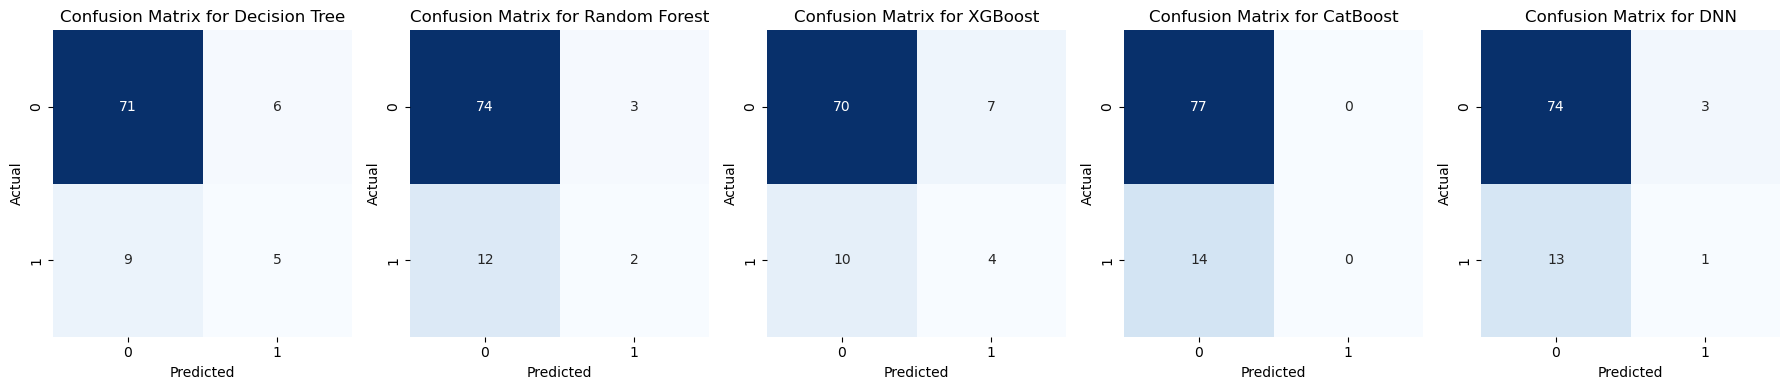

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their names
models = [best_dt_model, best_rf_model, best_xgb_model, best_catboost_model, model]  # Include your DNN model
model_names = ["Decision Tree", "Random Forest", "XGBoost", "CatBoost", "DNN"]

# Create a subplot grid to display confusion matrices for all models in a single row
num_models = len(models)
fig, axes = plt.subplots(1, num_models, figsize=(18, 4))

for model, name, ax in zip(models, model_names, axes):
    if name == "DNN":
        predictions = model.predict(X_test_imputed)
        predictions_binary = (predictions > 0.5).astype(int)  # Convert to binary predictions
    else:
        predictions = model.predict_proba(X_test_imputed)[:, 1]  # Probability of positive class
        predictions_binary = (predictions > 0.5).astype(int)  # Convert to binary predictions

    confusion = confusion_matrix(y_test, predictions_binary)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix for {name}")

plt.tight_layout()
plt.show()


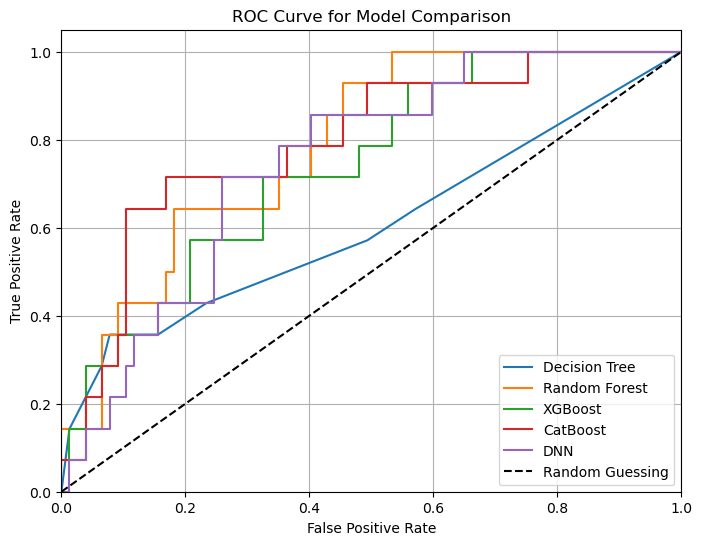

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the models and their names for the legend
models = [best_dt_model, best_rf_model, best_xgb_model, best_catboost_model, model]  # Include your DNN model
model_names = ["Decision Tree", "Random Forest", "XGBoost", "CatBoost", "DNN"]

# Create a figure and axis for the ROC plot
plt.figure(figsize=(8, 6))

# Plot ROC curves for each model
for model, name in zip(models, model_names):
    if name == "DNN":
        y_pred = model.predict(X_test_imputed)  # For DNN, we don't use predict_proba
    else:
        y_pred = model.predict_proba(X_test_imputed)[:, 1]  # Probability of positive class

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name}')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Comparison')
plt.legend(loc='lower right')
plt.grid()

# Show the ROC plot
plt.show()
